### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [1]:
# My GitHub repository.

# 

# Assignment activity 2

### Prepare your workstation

In [799]:
# Import the necessary libraries.
import pandas as pd
import numpy as np


# Import additional libraries.
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Optional - Ignore warnings.
# import warnings
# warnings.filterwarnings('ignore')

In [1514]:
# Read in additional data files.
nhs_pops = pd.read_csv("nhs_populations.csv")
icb_codes = pd.read_csv("icb_codes.csv")

In [274]:
# Prepare palette for visualisations.
my_palette = sns.color_palette(['darkgoldenrod', 'goldenrod', 'palegoldenrod', 'lemonchiffon', 'navajowhite', 'sandybrown',
                                'chocolate'])
my_palette

[(0.7215686274509804, 0.5254901960784314, 0.043137254901960784),
 (0.8549019607843137, 0.6470588235294118, 0.12549019607843137),
 (0.9333333333333333, 0.9098039215686274, 0.6666666666666666),
 (1.0, 0.9803921568627451, 0.803921568627451),
 (1.0, 0.8705882352941177, 0.6784313725490196),
 (0.9568627450980393, 0.6431372549019608, 0.3764705882352941),
 (0.8235294117647058, 0.4117647058823529, 0.11764705882352941)]

# ACTUAL DURATION

In [476]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv("actual_duration.csv")

# View the DataFrame.
print(ad.shape)
print(ad.columns)
print(ad.dtypes)
ad.head()

(137793, 8)
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [1382]:
# Determine whether there are missing values.
ad_missing_values = ad.isnull().any().any()
ad_missing_values

False

## Determine the metadata of the Actual Duration data set.
 
 
### Metadata Relevant to all the datasets:
- there are inconsistencies in the data reflection the NHS's data maturity. 
- the data collected is designed to support individual practices / locations, not for data analysis (eg as we are doing, between and across location.
- the data together covers a 30-month range
- the data csvs have been cleaned. 
#### Location data included: 
- sub icb and icb levels 
 - geographical locations 
 - names and codes
####  Location info limitations
- no info on the following are and how they relate: icbs, sub-icbs, and ons
- not all the practices in England are included in the dataset.

### Relevant to the Acutal Duration dataset specifically:
- "AD" is length in minutes of consultation
- recorded differently depending on the practice's system (metadata details how), which means that most appointments will be recorded as shorter / longer depending on where they are conducted, likely to account to a few minutes' difference.
- NHS is working towards aligning the record keeping practices for better consistency.
- 'Unknown / Data Quality' is both appointments of 0 minutes (?) and more than 60. 

In [468]:
# Determine the descriptive statistics of the data set.
ad_stats = ad.describe()
ad_stats

count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000

# APPOINTMENTS REGIONAL

In [1425]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv("appointments_regional.csv")

# View the DataFrame.
print(ar.shape)
print(ar.columns)
print(ar.dtypes)
ar.head()

(596821, 7)
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [373]:
# Determine whether there are missing values.
ar_missing_values = ar.isnull().any().any()
ar_missing_values

False

## Determine the metadata of the Appointments Regional data set.
  
#### Appointment Status
- The final status of an appointment is recorded here
- Values are: Attended, Did Not Attend (DNA) and Unknown. Unknown is the 3-6% of each months' appointment when the booked appointment did not have its status changed to Attended or DNA.
- DNA appointments were under-reported from June 2018 until and including November 2018.

#### Time between Book and Appointment
- factors that drive this:
    - appointment availability at the practice
    - patient availability
    - urgency
    - GP advice (?)
    - regular / repeat appointments that are booked in advance.

#### Mode
- some issues to be aware of:
    - determined by the setting, so eg some video consults will be logged as face to face. 
    - face to face is normally one-one and for a fixed time. But telephone and home visits are longer time periods and often not booked to individuals (so presumably more than one appointment actually happens, when only one is recorded).
    - Unkown covers all the pracitces using a certain GP system. They cannot provide modes data.


#### Health Care Professional (HCP) Type
- **GP** = GPs (registrars, locums and principal GPs) 
- **Other** = Acupuncturists through to Osteopaths, Nurses, Counsellors, etc.
    - may include some GP appointments because of data issues 
- **Unkown** = data issues

In [1380]:
# Determine the descriptive statistics of the data set.
ar_stats = ar.describe()
ar_stats

count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000

# NATIONAL CATEGORIES

In [749]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel("national_categories.xlsx")

# View the DataFrame.
print(nc.shape)
print(nc.columns)
print(nc.dtypes)
nc.head()

(817394, 8)
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [385]:
# Option to convert the appointment_moth column to datetime - may be more useful in string, so leave as is for now. 
# nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])
# print(nc.dtypes)

In [386]:
# Determine whether there are missing values.
nc_missing_values = nc.isnull().any().any()
nc_missing_values

False

# Determine the metadata of the National Categories data set.
  
#### Context Type
- there are three of these
- at a top level, they indicate if the patient is involved or not in an appointment: 
- Unmapped means no category data was supplied.
- CARE RELATED ENCOUNTERS (CERs) involve patients
- INCONSISTENT MAPPING appointments just don't fit into specific categories of the CERs

  
#### National Categories
- Most are CERs

#### Service Settings
- within which the appointment was delivered. eg GP PRactices, Primary Care Networks, etc.

In [380]:
# Determine the descriptive statistics of the data set.
nc_stats = nc.describe()
nc_stats

count_of_appointments
count          817394.000000
mean              362.183684
std              1084.576600
min                 1.000000
25%                 7.000000
50%                25.000000
75%               128.000000
max             16590.000000

### Explore the data set

**Question 1:** How many locations are there in the data set?


In [483]:
# Determine the number of regions.
regions = ad['region_ons_code'].nunique()
print("There are", regions, "regions in the dataset.")

There are 7 regions in the dataset.


In [485]:
# Determine the number of locations - ICBs.
icb_number = ad['icb_ons_code'].nunique()
print("There are", icb_number, "Integrated Care Boards(ICBs) in the dataset.")

There are 42 Integrated Care Boards(ICBs) in the dataset.


Confirmed on NHS website:
> The Integrated Care Boards (Establishment) Order 2022 legally establishes 42 ICBs with effect from 1 July 2022.
<sub> https://www.england.nhs.uk/publication/integrated-care-boards-in-england/ </sub>


In [484]:
# Determine the number of locations - sub-ICBs.
sub_icb_number = ad['sub_icb_location_name'].nunique()
print("There are", sub_icb_number, "Sub-ICBs in the dataset.")

There are 106 Sub-ICBs in the dataset.


In [493]:
print("There are", regions, "regions,", icb_number, "Integrated Care Boards(ICBs), and", sub_icb_number,\
      "Sub-ICBs in the dataset.")

There are 7 regions, 42 Integrated Care Boards(ICBs), and 106 Sub-ICBs in the dataset.


In [495]:
# Continue the exploratin by determining how many and which sub_ICBs sit within each ICB.
subICBs_ICBs = ad.groupby('icb_ons_code')

for icb, group in subICBs_ICBs:
    unique_sub_icbs = group['sub_icb_location_name'].unique()
    num_unique_sub_icbs = len(unique_sub_icbs)
    print(f"ICB:{icb}")
    for sub_icb in unique_sub_icbs:
        print(f"sub_icb: {sub_icb}")

ICB:E54000008
sub_icb: NHS Cheshire and Merseyside ICB - 01F
sub_icb: NHS Cheshire and Merseyside ICB - 01J
sub_icb: NHS Cheshire and Merseyside ICB - 01T
sub_icb: NHS Cheshire and Merseyside ICB - 01V
sub_icb: NHS Cheshire and Merseyside ICB - 01X
sub_icb: NHS Cheshire and Merseyside ICB - 02E
sub_icb: NHS Cheshire and Merseyside ICB - 12F
sub_icb: NHS Cheshire and Merseyside ICB - 27D
sub_icb: NHS Cheshire and Merseyside ICB - 99A
ICB:E54000010
sub_icb: NHS Staffordshire and Stoke-on-Trent ICB - 04Y
sub_icb: NHS Staffordshire and Stoke-on-Trent ICB - 05D
sub_icb: NHS Staffordshire and Stoke-on-Trent ICB - 05G
sub_icb: NHS Staffordshire and Stoke-on-Trent ICB - 05Q
sub_icb: NHS Staffordshire and Stoke-on-Trent ICB - 05V
sub_icb: NHS Staffordshire and Stoke-on-Trent ICB - 05W
ICB:E54000011
sub_icb: NHS Shropshire Telford and Wrekin ICB - M2L0M
ICB:E54000013
sub_icb: NHS Lincolnshire ICB - 71E
ICB:E54000015
sub_icb: NHS Leicester Leicestershire and Rutland ICB - 03W
sub_icb: NHS Leicest

There's a wide range here from many ICBs who have just 1 sub_ICB, to several who oversee 5 or more. This may be important to consider when exploring the capactiy within networks, and trends between connected ICBs. 

**Question 2:** What are the five locations with the highest number of records?

**Response:** The answer here depends on several factors: 
- ICBs or subICBs? One of the datasets only includes ICB data (and not the more granular subICB data). The sub_ICB data is all contained within the ICB data (in this case, the records), so will proceed with the ICB interpretation of 'location.'
- 'highest number' across all datasets? Or each dataset individually? This will determine our approach. I'm going to explore how many counts there are for each ICB and each subICB in each of the datasets. I did consider combining them for this answer, but realised that in fact it's important NOT to, because each dataset is comprised of its own records, and so the answer needs to reflect the sum of records from across each one. 
- There are also the region codes in the ad data frame, which, too, are locations. 

In [416]:
# Group the ad dataframe by ICB and appointment count. 
ad_ICB_records= ad.groupby(['icb_ons_code'])['count_of_appointments'].sum().reset_index()

# Could sort but may joni with other new dfs, and will just need to sort again then. Wait till then. 
ad_ICB_records.set_index('icb_ons_code', inplace = True)
ad_ICB_records.head()

count_of_appointments
icb_ons_code                       
E54000008                   7344348
E54000010                   2954384
E54000011                   1459819
E54000013                   2457468
E54000015                   3610315

In [454]:
# Group the ar dataframe by ICB and appointment count. 
ar_ICB_records= ar.groupby(['icb_ons_code'])['count_of_appointments'].sum().reset_index()

# Set the code column as the index in preparation for join().
ar_ICB_records.set_index('icb_ons_code', inplace = True)

# Rename the count column.
ar_ICB_records=ar_ICB_records.rename(columns={'count_of_appointments': 'count'})
ar_ICB_records.head()

count
icb_ons_code          
E54000008     33099882
E54000010     13196215
E54000011      6513481
E54000013     10349380
E54000015     15597338

In [423]:
# Group the nc dataframe by ICB and appointment count. 
nc_ICB_records= ar.groupby(['icb_ons_code'])['count_of_appointments'].sum().reset_index()

# Set the code column as the index in preparation for join().
nc_ICB_records.set_index('icb_ons_code', inplace = True)

In [445]:
# Rename the count column.
nc_ICB_records=nc_ICB_records.rename(columns={'count_of_appointments':'count_nc'})

In [453]:
nc_ICB_records.head()

count_nc
icb_ons_code          
E54000008     33099882
E54000010     13196215
E54000011      6513481
E54000013     10349380
E54000015     15597338

In [449]:
# Combine the three dataframes, joining them on the icb_ons_code column that they all share.
ICB_records = ad_ICB_records.join([ar_ICB_records, nc_ICB_records])
ICB_records.head()

count_of_appointments     count  count_nc
icb_ons_code                                           
E54000008                   7344348  33099882  33099882
E54000010                   2954384  13196215  13196215
E54000011                   1459819   6513481   6513481
E54000013                   2457468  10349380  10349380
E54000015                   3610315  15597338  15597338

In [452]:
# Total the columns. 
ICB_records['total_records'] = ICB_records[['count_of_appointments', 'count', 'count_nc']].sum(axis=1)
ICB_records.head()

count_of_appointments     count  count_nc  total_records
icb_ons_code                                                          
E54000008                   7344348  33099882  33099882       73544112
E54000010                   2954384  13196215  13196215       29346814
E54000011                   1459819   6513481   6513481       14486781
E54000013                   2457468  10349380  10349380       23156228
E54000015                   3610315  15597338  15597338       34804991

In [459]:
# Sort the df by the total_records.
ICB_records_sorted = ICB_records.sort_values('total_records', ascending = False).reset_index()

# Determine the top five ICBs in this df. 
ICB_records_top_5 = ICB_records_sorted['icb_ons_code'].head(5).values

# Output the answer.
print("The five ICB locations with the highest number of records are:",ICB_records_top_5)

The five ICB locations with the highest number of records are: ['E54000050' 'E54000054' 'E54000057' 'E54000008' 'E54000027']


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [460]:
# Determine the number of service settings.
# Use the nunique() method to count the unique values in the service_setting column in the nc df.

ss_unique = nc['service_setting'].nunique()
print("There are", ss_unique, 'service settings.')

There are 5 service settings.


In [461]:
# Determine the number of context types.
# Use the nunique() method to count the unique values in the context_type column in the nc df.

context_types_unique = nc['context_type'].nunique()
print("There are", context_types_unique, 'context types.')

There are 3 context types.


In [462]:
# Determine the number of national categories.
# Use the nunique() method to count the unique values in the national_category column in the nc df.

nc_unique = nc['national_category'].nunique()
print("There are", nc_unique, "national categories.")

There are 18 national categories.


In [463]:
# Determine the number of appointment status.
# Use the nunique() method to count the unique values in the appointment_status column in the ad df.

statuses_unique= ar['appointment_status'].nunique()
print("There are", statuses_unique, "statuses.")

There are 3 statuses.


## Additional Exploration into Location - based capacity and delivery

The ICBs are a very significant component in service delivery. The ICBs are new entities that have only been brought into existence very recently. So they represent a massive investment by the NHS in terms of the change they are intended to bring about at a systemic level. As well as scaling services through PCNs, the NHS has decided to set up stronger relationships between health and social services. The ICBs represent the health side of that partnership. 

But the ICBs themselves are all unique. They're regional, so they reflect regional needs of their unique demographics. But they're also run very independently of each other. So it's really appropriate to at least attempt to unpack the differences between the ICBs and how they are delivering services across the network.

To start with, we'll look at the busyness of ICBs. 

###  Are the busiest ICBs the ones in areas with the highest populations? 

The NHS publishes data on its populations. We're going to combine a dataset we have with one of their population datasets from a comparable timeframe - the first one published that reflected the new ICB structures. 

In [1515]:
# Sort the data
nhs_pops_sorted = nhs_pops.sort_values('Projected population 2022/23')
nhs_pops_sorted.head()

ICB22                      Integrated Care Board   \
21   QOC     NHS Shropshire, Telford and Wrekin ICB    
50   QSL                           NHS Somerset ICB    
46   QT6   NHS Cornwall and The Isles Of Scilly ICB    
49   QR1                    NHS Gloucestershire ICB    
18   QJM                       NHS Lincolnshire ICB    

    Projected population 2022/23  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
21                      521391.0         NaN         NaN         NaN   
50                      596836.0         NaN         NaN         NaN   
46                      601786.0         NaN         NaN         NaN   
49                      676860.0         NaN         NaN         NaN   
18                      806534.0         NaN         NaN         NaN   

    Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  
21         NaN         NaN         NaN         NaN          NaN  
50         NaN         NaN         NaN         NaN          NaN  
46         NaN         NaN         NaN         NaN          NaN  
49         NaN         NaN         NaN         NaN          NaN  
18         NaN         NaN         NaN         NaN          NaN

<Axes: xlabel='Projected population 2022/23', ylabel=' Integrated Care Board '>

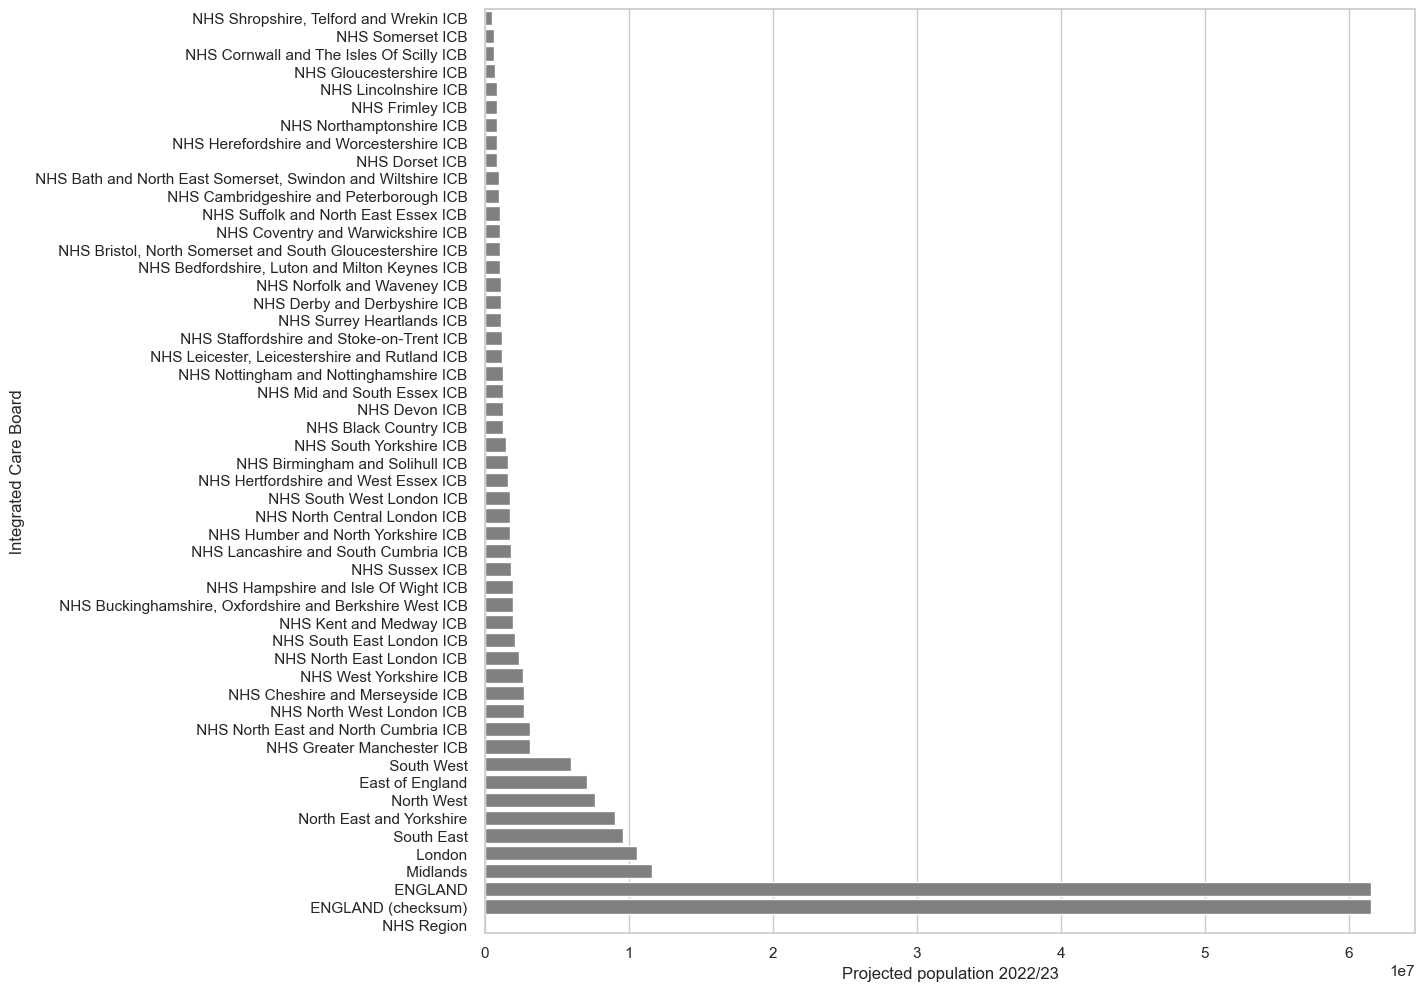

In [1516]:
# Plot the sorted data that shows the surrounding populations of ICB setttings. 
plt.figure(figsize=(12,12))
sns.barplot(x='Projected population 2022/23', y=' Integrated Care Board ', data=nhs_pops_sorted, color = 'gray')

In [1517]:
# View icb_codes (to connect population data in nhs_pops with the rest of the data in various dfs.)
print(icb_codes.shape)
print(icb_codes.columns)
print(icb_codes.dtypes)
icb_codes

(106, 8)
Index(['Sub ICB Location ODS Code ', 'Sub ICB Location Name ',
       'Sub ICB Location Non-Primary Role', 'ICB Code',
       'Integrated Care Board Name ', 'ICB Non-Primary Role', 'Region Code',
       'Region Name'],
      dtype='object')
Sub ICB Location ODS Code            object
Sub ICB Location Name                object
Sub ICB Location Non-Primary Role    object
ICB Code                             object
Integrated Care Board Name           object
ICB Non-Primary Role                 object
Region Code                          object
Region Name                          object
dtype: object


Sub ICB Location ODS Code   \
0                          92G   
1                        M1J4Y   
2                          15E   
3                        D2P2L   
4                          15C   
..                         ...   
101                        02T   
102                        03R   
103                        15F   
104                        36J   
105                      X2C4Y   

                                                Sub ICB Location Name   \
0    NHS BATH AND NORTH EAST SOMERSET, SWINDON AND WILTSHIRE ICB - 92G   
1                NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES ICB - M1J4Y   
2                                NHS BIRMINGHAM AND SOLIHULL ICB - 15E   
3                                        NHS BLACK COUNTRY ICB - D2P2L   
4      NHS BRISTOL, NORTH SOMERSET AND SOUTH GLOUCESTERSHIRE ICB - 15C   
..                                                                 ...   
101                                       NHS WEST YORKSHIRE ICB - 02T   
102                                       NHS WEST YORKSHIRE ICB - 03R   
103                                       NHS WEST YORKSHIRE ICB - 15F   
104                                       NHS WEST YORKSHIRE ICB - 36J   
105                                     NHS WEST YORKSHIRE ICB - X2C4Y   

    Sub ICB Location Non-Primary Role ICB Code  \
0                   SUB ICB LOCATION       QOX   
1                   SUB ICB LOCATION       QHG   
2                   SUB ICB LOCATION       QHL   
3                   SUB ICB LOCATION       QUA   
4                   SUB ICB LOCATION       QUY   
..                                ...      ...   
101                 SUB ICB LOCATION       QWO   
102                 SUB ICB LOCATION       QWO   
103                 SUB ICB LOCATION       QWO   
104                 SUB ICB LOCATION       QWO   
105                 SUB ICB LOCATION       QWO   

                                                       Integrated Care Board Name   \
0    NHS BATH AND NORTH EAST SOMERSET, SWINDON AND WILTSHIRE INTEGRATED CARE BOARD   
1                  NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES INTEGRATED CARE BOARD   
2                                NHS BIRMINGHAM AND SOLIHULL INTEGRATED CARE BOARD   
3                                          NHS BLACK COUNTRY INTEGRATED CARE BOARD   
4      NHS BRISTOL, NORTH SOMERSET AND SOUTH GLOUCESTERSHIRE INTEGRATED CARE BOARD   
..                                                                             ...   
101                                       NHS WEST YORKSHIRE INTEGRATED CARE BOARD   
102                                       NHS WEST YORKSHIRE INTEGRATED CARE BOARD   
103                                       NHS WEST YORKSHIRE INTEGRATED CARE BOARD   
104                                       NHS WEST YORKSHIRE INTEGRATED CARE BOARD   
105                                       NHS WEST YORKSHIRE INTEGRATED CARE BOARD   

       ICB Non-Primary Role Region Code  \
0    INTEGRATED CARE BOARD          Y58   
1    INTEGRATED CARE BOARD          Y61   
2    INTEGRATED CARE BOARD          Y60   
3    INTEGRATED CARE BOARD          Y60   
4    INTEGRATED CARE BOARD          Y58   
..                      ...         ...   
101  INTEGRATED CARE BOARD          Y63   
102  INTEGRATED CARE BOARD          Y63   
103  INTEGRATED CARE BOARD          Y63   
104  INTEGRATED CARE BOARD          Y63   
105  INTEGRATED CARE BOARD          Y63   

                                       Region Name  
0                  SOUTH WEST COMMISSIONING REGION  
1             EAST OF ENGLAND COMMISSIONING REGION  
2                    MIDLANDS COMMISSIONING REGION  
3                    MIDLANDS COMMISSIONING REGION  
4                  SOUTH WEST COMMISSIONING REGION  
..                                             ...  
101  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
102  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
103  NORTH EAST AND YORKSHIRE COMMISSIONING REGION  
104  NORTH EAST AND YORKS

In [1518]:
# Make a new version of icb_codes with just the icb info. 
# Check that all 42 ICBs are accounted for.
unique_icbs = icb_codes['Integrated Care Board Name '].nunique()
unique_icbs

42

In [1520]:
# Print out the names so they can be ammended to same format as other dataframes. 
unique_icbs = icb_codes['Integrated Care Board Name '].unique()
unique_icbs


array(['NHS BATH AND NORTH EAST SOMERSET, SWINDON AND WILTSHIRE INTEGRATED CARE BOARD',
       'NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES INTEGRATED CARE BOARD',
       'NHS BIRMINGHAM AND SOLIHULL INTEGRATED CARE BOARD',
       'NHS BLACK COUNTRY INTEGRATED CARE BOARD',
       'NHS BRISTOL, NORTH SOMERSET AND SOUTH GLOUCESTERSHIRE INTEGRATED CARE BOARD',
       'NHS BUCKINGHAMSHIRE, OXFORDSHIRE AND BERKSHIRE WEST INTEGRATED CARE BOARD',
       'NHS CAMBRIDGESHIRE AND PETERBOROUGH INTEGRATED CARE BOARD',
       'NHS CHESHIRE AND MERSEYSIDE INTEGRATED CARE BOARD',
       'NHS CORNWALL AND THE ISLES OF SCILLY INTEGRATED CARE BOARD',
       'NHS COVENTRY AND WARWICKSHIRE INTEGRATED CARE BOARD',
       'NHS DERBY AND DERBYSHIRE INTEGRATED CARE BOARD',
       'NHS DEVON INTEGRATED CARE BOARD',
       'NHS DORSET INTEGRATED CARE BOARD',
       'NHS FRIMLEY INTEGRATED CARE BOARD',
       'NHS GLOUCESTERSHIRE INTEGRATED CARE BOARD',
       'NHS GREATER MANCHESTER INTEGRATED CARE BOARD',
      

### How many appointments total for each icb location in the date range?

In [1521]:
# Get a list of the unique values in the icb_ons column
icb_ons_code_unique = nc['icb_ons_code'].unique()
print(icb_ons_code_unique)
print("There are", len(icb_ons_code_unique), "unique icb_ons_codes indicating", len(icb_ons_code_unique), "icb locations.")

['E54000050' 'E54000048' 'E54000057' 'E54000008' 'E54000061' 'E54000060'
 'E54000054' 'E54000051' 'E54000015' 'E54000010' 'E54000056' 'E54000025'
 'E54000023' 'E54000026' 'E54000053' 'E54000044' 'E54000042' 'E54000041'
 'E54000043' 'E54000036' 'E54000038' 'E54000039' 'E54000055' 'E54000058'
 'E54000037' 'E54000019' 'E54000022' 'E54000031' 'E54000013' 'E54000030'
 'E54000059' 'E54000032' 'E54000052' 'E54000040' 'E54000028' 'E54000029'
 'E54000018' 'E54000062' 'E54000034' 'E54000024' 'E54000011' 'E54000027']
There are 42 unique icb_ons_codes indicating 42 icb locations.


In [1522]:
# Use the list of unique icb ons codes to sum how many appointments total for each icb ons code in the date range. 
# Trial code for a single icb code to find a code snippet that works. 
E54000050_appointments_total = nc.loc[nc['icb_ons_code']=='E54000050', 'count_of_appointments'].sum()
# Output the result.
print(E54000050_appointments_total)

# Use within a for loop to iterate through all each of the icb locations to create a dictionary. 
# Create the empty dictionary.
appointments_per_icb_location = {}
# Complete the dictionary with values calculated in a for loop using the above code.  
for icb_value in icb_ons_code_unique:
    sum_of_appointments = nc.loc[nc['icb_ons_code']==icb_value,
                                'count_of_appointments'].sum()
    appointments_per_icb_location[icb_value]=sum_of_appointments
# Output the dictionary
print(appointments_per_icb_location)

16882235
{'E54000050': 16882235, 'E54000048': 8757248, 'E54000057': 13857900, 'E54000008': 13250311, 'E54000061': 7549415, 'E54000060': 6263489, 'E54000054': 14358371, 'E54000051': 9125945, 'E54000015': 6242530, 'E54000010': 5325790, 'E54000056': 5116300, 'E54000025': 7059966, 'E54000023': 5335653, 'E54000026': 5630586, 'E54000053': 8929398, 'E54000044': 8924264, 'E54000042': 9210625, 'E54000041': 4340449, 'E54000043': 3663418, 'E54000036': 3697369, 'E54000038': 3079318, 'E54000039': 4899508, 'E54000055': 6383746, 'E54000058': 5795343, 'E54000037': 7447758, 'E54000019': 4700180, 'E54000022': 6074027, 'E54000031': 7155030, 'E54000013': 4253394, 'E54000030': 7850170, 'E54000059': 3922181, 'E54000032': 9286167, 'E54000052': 4898540, 'E54000040': 5242176, 'E54000028': 6747958, 'E54000029': 9588891, 'E54000018': 4863552, 'E54000062': 7033637, 'E54000034': 3754540, 'E54000024': 4838515, 'E54000011': 2568487, 'E54000027': 12142390}


In [1523]:
# Create a new dataframe from the dictionary.
icb_appointments = pd.DataFrame(list(appointments_per_icb_location.items()),
                                columns=['icb_code', 'total_appointments'])

# View the dataframe
icb_appointments.head()

icb_code  total_appointments
0  E54000050            16882235
1  E54000048             8757248
2  E54000057            13857900
3  E54000008            13250311
4  E54000061             7549415

In [1524]:
# Sort the dataframe 
icb_appointments_sorted = icb_appointments.sort_values('total_appointments')
icb_appointments_sorted.head()

icb_code  total_appointments
40  E54000011             2568487
20  E54000038             3079318
18  E54000043             3663418
19  E54000036             3697369
38  E54000034             3754540

<Axes: xlabel='total_appointments', ylabel='icb_code'>

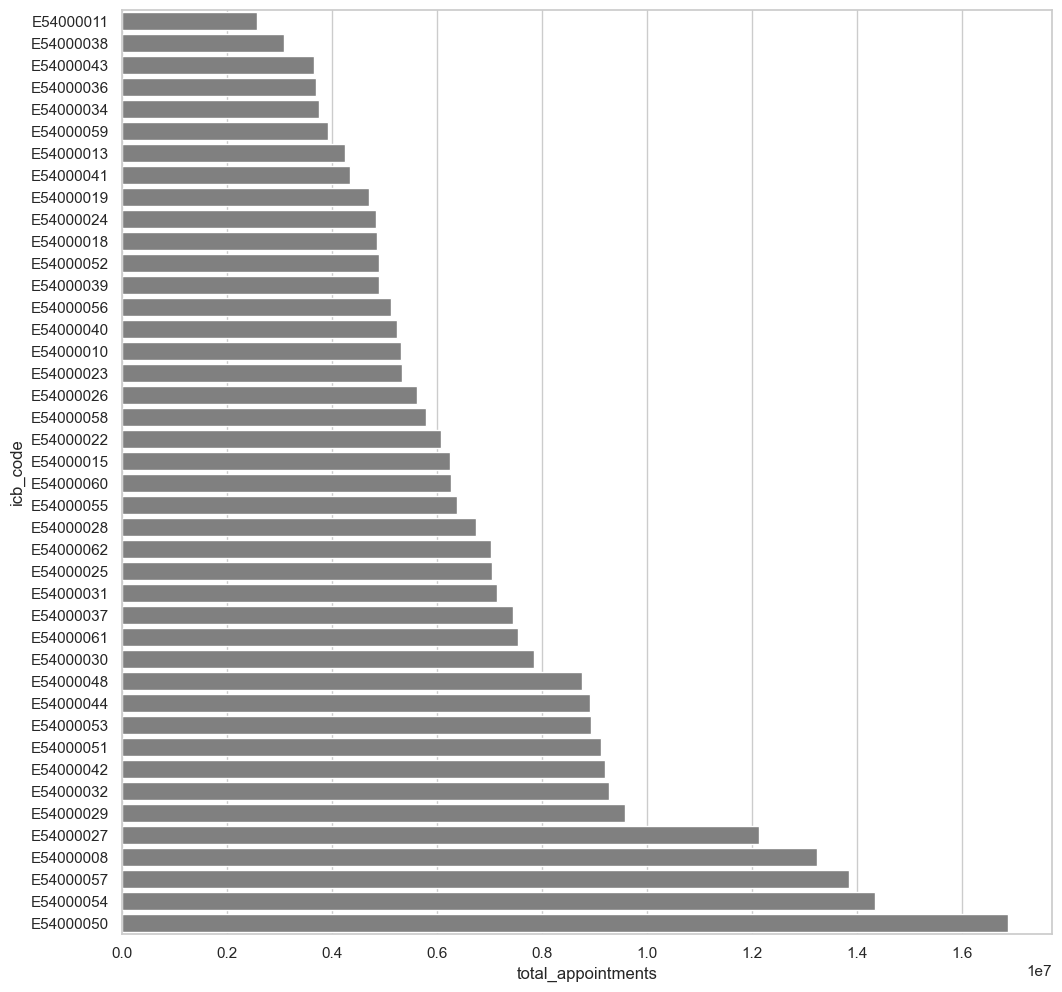

In [1525]:
# Visualise the dataframe, showing how many appointments were there for each icb location.
plt.figure(figsize=(12,12))
sns.barplot(x='total_appointments', y='icb_code', data=icb_appointments_sorted, color = 'gray')
# TODO Replace the y labels with names and change the y label
# TODO replace the x label and add a title
# TODO Remove the hue variance 
# The barplot shows there is a large variance in appointment numbers between the various Integrated Care Boards.

In [1536]:
# Set the ICBs in the same order as in the icb_appointments_sorted df, to better compare busyness per population.
icb_code_values_ordered = icb_appointments_sorted['icb_code']
icb_code_values_ordered.head()

40    E54000011
20    E54000038
18    E54000043
19    E54000036
38    E54000034
Name: icb_code, dtype: object

In [1537]:
# Use that list of ordered valued (ICB busyness) to create a dataframe that will be useful to compare busyness and pop.
#ie  This is the order of the ICBs in the busyness graph
# Reset the index of the list above, into a new df. 
icb_pops_and_busyness = icb_code_values_ordered.reset_index()
icb_pops_and_busyness.head()

index   icb_code
0     40  E54000011
1     20  E54000038
2     18  E54000043
3     19  E54000036
4     38  E54000034

In [1538]:
# remove the column called index from the new ICB codes (pop and busyness) df.
print(icb_pops_and_busyness.index.name)

None


In [1539]:
# drop the colunn called index without dropping the actual index.
icb_pops_and_busyness = icb_pops_and_busyness.drop(columns = 'index')

In [1540]:
# View df
icb_pops_and_busyness.head()

icb_code
0  E54000011
1  E54000038
2  E54000043
3  E54000036
4  E54000034

In [1541]:
# Add the population data as a new column, without disrupting the order of the icb_codes.
icb_pops_and_busyness['icb'] = ['NHS Shropshire, Telford and Wrekin ICB', 'NHS Somerset ICB', 'NHS Gloucestershire ICB',\
                               'NHS Cornwall and the Isles of Scilly ICB','NHS Frimley ICB', 'NHS Northamptonshire ICB',\
                               'NHS Lincolnshire ICB', 'NHS Dorset ICB', 'NHS Herefordshire and Worcestershire ICB',\
                               'NHS Bedfordshire, Luton and Milton Keynes ICB', 'NHS Coventry and Warwickshire ICB',\
                               'NHS Surrey Heartlands ICB', 'NHS Bristol, North Somerset and South Gloucestershire ICB',\
                               'NHS Cambridgeshire and Peterborough ICB',\
                               'NHS Bath and North East Somerset, Swindon and Wiltshire ICB',\
                               'NHS Staffordshire and Stoke-on-Trent ICB', 'NHS Suffolk and North East Essex ICB',\
                               'NHS Mid and South Essex ICB', 'NHS Derby and Derbyshire ICB',\
                               'NHS Norfolk and Waveney ICB', 'NHS Leicester, Leicestershire and Rutland ICB',\
                               'NHS Nottingham and Nottinghamshire ICB', 'NHS Birmingham and Solihull ICB',\
                               'NHS North Central London ICB', 'NHS Black Country ICB', 'NHS Hertfordshire and West Essex ICB',\
                               'NHS South West London ICB', 'NHS Devon ICB', 'NHS South Yorkshire ICB',\
                               'NHS South East London ICB', 'NHS Lancashire and South Cumbria ICB',\
                               'NHS Buckinghamshire, Oxfordshire and Berkshire West ICB', 'NHS Sussex ICB',\
                               'NHS Humber and North Yorkshire ICB', 'NHS Hampshire and Isle of Wight ICB',\
                               'NHS Kent and Medway ICB', 'NHS North East London ICB', 'NHS North West London ICB',\
                               'NHS Cheshire and Merseyside ICB', 'NHS Greater Manchester ICB', 'NHS West Yorkshire ICB',
                               'NHS North East and North Cumbria ICB']

In [1542]:
icb_pops_and_busyness.head()

icb_code                                       icb
0  E54000011    NHS Shropshire, Telford and Wrekin ICB
1  E54000038                          NHS Somerset ICB
2  E54000043                   NHS Gloucestershire ICB
3  E54000036  NHS Cornwall and the Isles of Scilly ICB
4  E54000034                           NHS Frimley ICB

In [1543]:
# Add a column in the nhs_pops df with the icb names, with 'icb' as its name, by copying the existing column with those values. 
nhs_pops['icb'] = nhs_pops[' Integrated Care Board '].copy()
nhs_pops.head()

ICB22                  Integrated Care Board   Projected population 2022/23  \
0   NaN                                     NaN                           NaN   
1   NaN                                ENGLAND                     61498822.0   
2   Y63               North East and Yorkshire                            NaN   
3   QOQ     NHS Humber and North Yorkshire ICB                      1771076.0   
4   QHM   NHS North East and North Cumbria ICB                      3139823.0   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 9  Unnamed: 10                                     icb  
0         NaN          NaN                                     NaN  
1         NaN          NaN                                ENGLAND   
2         NaN          NaN               North East and Yorkshire   
3         NaN          NaN     NHS Humber and North Yorkshire ICB   
4         NaN          NaN   NHS North East and North Cumbria ICB

In [1545]:
icb_pops_code_dict = {'NHS Humber and North Yorkshire ICB': 1771076.0, 'NHS North East and North Cumbria ICB': 3139823.0,\
 'NHS South Yorkshire ICB': 1483968.0, 'NHS West Yorkshire ICB': 2617433.0, 'NHS Cheshire and Merseyside ICB': 2714167.0,\
 'NHS Greater Manchester ICB': 3146943.0, 'NHS Lancashire and South Cumbria ICB': 1810011.0,\
 'NHS Birmingham and Solihull ICB': 1577949.0, 'NHS Black Country ICB': 1277444.0,\
 'NHS Coventry and Warwickshire ICB': 1052979.0, 'NHS Derby and Derbyshire ICB': 1111009.0,\
 'NHS Herefordshire and Worcestershire ICB': 818249.0, 'NHS Leicester, Leicestershire and Rutland ICB': 1185265.0,\
 'NHS Lincolnshire ICB': 806534.0, 'NHS Northamptonshire ICB': 814554.0, 'NHS Nottingham and Nottinghamshire ICB': 1240698.0,\
 'NHS Shropshire, Telford and Wrekin ICB': 521391.0, 'NHS Staffordshire and Stoke-on-Trent ICB': 1172053.0,\
 'NHS Bedfordshire, Luton and Milton Keynes ICB': 1070212.0, 'NHS Cambridgeshire and Peterborough ICB': 1008472.0,
 'NHS Hertfordshire and West Essex ICB': 1612064.0, 'NHS Mid and South Essex ICB': 1256523.0,\
 'NHS Norfolk and Waveney ICB': 1086462.0, 'NHS Suffolk and North East Essex ICB': 1048423.0,\
 'NHS North Central London ICB': 1734061.0, 'NHS North East London ICB': 2342205.0, 'NHS North West London ICB': 2725166.0,\
 'NHS South East London ICB': 2051571.0, 'NHS South West London ICB': 1726507.0,\
 'NHS Buckinghamshire, Oxfordshire and Berkshire West ICB': 1935027.0, 'NHS Frimley ICB': 808083.0,\
 'NHS Hampshire and Isle of Wight ICB': 1916638.0, 'NHS Kent and Medway ICB': 1966153.0, 'NHS Surrey Heartlands ICB': 1122802.0,\
 'NHS Sussex ICB': 1820464.0, 'NHS Bath and North East Somerset, Swindon and Wiltshire ICB': 980516.0,\
 'NHS Bristol, North Somerset and South Gloucestershire ICB': 1057832.0,'NHS Cornwall and the Isles of Scilly ICB':601786.0,\
 'NHS Devon ICB': 1273431.0, 'NHS Dorset ICB': 819184.0, 'NHS Gloucestershire ICB': 676860.0, 'NHS Somerset ICB': 596836.0,\
 'North East and Yorkshire': 9012300.0, 'North West': 7671121.0, 'Midlands': 11578126.0, 'East of England': 7082155.0,\
 'London': 10579509.0, 'South East': 9569166.0, 'South West': 6006444.0}

In [1546]:
# Map the dictionary onto the df using the icb column, to add the population data. 

icb_pops_and_busyness['population'] = icb_pops_and_busyness['icb'].map(icb_pops_code_dict)
icb_pops_and_busyness

icb_code                                                          icb  \
0   E54000011                       NHS Shropshire, Telford and Wrekin ICB   
1   E54000038                                             NHS Somerset ICB   
2   E54000043                                      NHS Gloucestershire ICB   
3   E54000036                     NHS Cornwall and the Isles of Scilly ICB   
4   E54000034                                              NHS Frimley ICB   
5   E54000059                                     NHS Northamptonshire ICB   
6   E54000013                                         NHS Lincolnshire ICB   
7   E54000041                                               NHS Dorset ICB   
8   E54000019                     NHS Herefordshire and Worcestershire ICB   
9   E54000024                NHS Bedfordshire, Luton and Milton Keynes ICB   
10  E54000018                            NHS Coventry and Warwickshire ICB   
11  E54000052                                    NHS Surrey Heartlands ICB   
12  E54000039    NHS Bristol, North Somerset and South Gloucestershire ICB   
13  E54000056                      NHS Cambridgeshire and Peterborough ICB   
14  E54000040  NHS Bath and North East Somerset, Swindon and Wiltshire ICB   
15  E54000010                     NHS Staffordshire and Stoke-on-Trent ICB   
16  E54000023                         NHS Suffolk and North East Essex ICB   
17  E54000026                                  NHS Mid and South Essex ICB   
18  E54000058                                 NHS Derby and Derbyshire ICB   
19  E54000022                                  NHS Norfolk and Waveney ICB   
20  E54000015                NHS Leicester, Leicestershire and Rutland ICB   
21  E54000060                       NHS Nottingham and Nottinghamshire ICB   
22  E54000055                              NHS Birmingham and Solihull ICB   
23  E54000028                                 NHS North Central London ICB   
24  E54000062                                        NHS Black Country ICB   
25  E54000025                         NHS Hertfordshire and West Essex ICB   
26  E54000031                                    NHS South West London ICB   
27  E54000037                                                NHS Devon ICB   
28  E54000061                                      NHS South Yorkshire ICB   
29  E54000030                                    NHS South East London ICB   
30  E54000048                         NHS Lancashire and South Cumbria ICB   
31  E54000044      NHS Buckinghamshire, Oxfordshire and Berkshire West ICB   
32  E54000053                                               NHS Sussex ICB   
33  E54000051                           NHS Humber and North Yorkshire ICB   
34  E54000042                          NHS Hampshire and Isle of Wight ICB   
35  E54000032                                      NHS Kent and Medway ICB   
36  E54000029                                    NHS North East London ICB   
37  E54000027                                    NHS North West London ICB   
38  E54000008                              NHS Cheshire and Merseyside ICB   
39  E54000057                                   NHS Greater Manchester ICB   
40  E54000054                                       NHS West Yorkshire ICB   
41  E54000050                         NHS North East and North Cumbria ICB   

    population  
0     521391.0  
1     596836.0  
2     676860.0  
3     601786.0  
4     808083.0  
5     814554.0  
6     806534.0  
7     819184.0  
8     818249.0  
9    1070212.0  
10   1052979.0  
11   1122802.0  
12   1057832.0  
13   1008472.0  
14    980516.0  
15   1172053.0  
16   1048423.0  
17   1256523.0  
18   1111009.0  
19   1086462.0  
20   1185265.0  
21   1240698.0  
22   1577949.0  
23   1734061.0  
24   1277444.0  
25   1612064.0  
26   1726507.0  
27   1273431.0  
28   1483968.0  
29   2051571.0  
30   1810011.0  
31   1935027.0  
32   1820464.0  
33   1771076.0  
34   1916638.0  
35   1966153.0  
36   2342205.0  
37  

In [1547]:
# The dictionary keys have extra spaces between the quotation mark and the string letters. Copy and paste and remove. 
{'NHS Humber and North Yorkshire ICB': 1771076.0, 'NHS North East and North Cumbria ICB': 3139823.0,\
 'NHS South Yorkshire ICB': 1483968.0, 'NHS West Yorkshire ICB': 2617433.0, 'NHS Cheshire and Merseyside ICB': 2714167.0,\
 'NHS Greater Manchester ICB': 3146943.0, 'NHS Lancashire and South Cumbria ICB': 1810011.0,\
 'NHS Birmingham and Solihull ICB': 1577949.0, 'NHS Black Country ICB': 1277444.0,\
 'NHS Coventry and Warwickshire ICB': 1052979.0, 'NHS Derby and Derbyshire ICB': 1111009.0,\
 'NHS Herefordshire and Worcestershire ICB': 818249.0, 'NHS Leicester, Leicestershire and Rutland ICB': 1185265.0,\
 'NHS Lincolnshire ICB': 806534.0, 'NHS Northamptonshire ICB': 814554.0, 'NHS Nottingham and Nottinghamshire ICB': 1240698.0,\
 'NHS Shropshire, Telford and Wrekin ICB': 521391.0, 'NHS Staffordshire and Stoke-on-Trent ICB': 1172053.0,\
 'NHS Bedfordshire, Luton and Milton Keynes ICB': 1070212.0, 'NHS Cambridgeshire and Peterborough ICB': 1008472.0,
 'NHS Hertfordshire and West Essex ICB': 1612064.0, 'NHS Mid and South Essex ICB': 1256523.0,\
 'NHS Norfolk and Waveney ICB': 1086462.0, 'NHS Suffolk and North East Essex ICB': 1048423.0,\
 'NHS North Central London ICB': 1734061.0, 'NHS North East London ICB': 2342205.0, 'NHS North West London ICB': 2725166.0,\
 'NHS South East London ICB': 2051571.0, 'NHS South West London ICB': 1726507.0,\
 'NHS Buckinghamshire, Oxfordshire and Berkshire West ICB': 1935027.0, 'NHS Frimley ICB': 808083.0,\
 'NHS Hampshire and Isle Of Wight ICB':1916638.0, 'NHS Kent and Medway ICB': 1966153.0, 'NHS Surrey Heartlands ICB': 1122802.0,\
 'NHS Sussex ICB ': 1820464.0, 'NHS Bath and North East Somerset, Swindon and Wiltshire ICB': 980516.0,\
 'NHS Bristol, North Somerset and South Gloucestershire ICB ': 1057832.0,' NHS Cornwall and The Isles Of Scilly ICB':601786.0,\
 'NHS Devon ICB': 1273431.0, 'NHS Dorset ICB': 819184.0, 'NHS Gloucestershire ICB': 676860.0, 'NHS Somerset ICB': 596836.0,\
 'North East and Yorkshire': 9012300.0, 'North West': 7671121.0, 'Midlands': 11578126.0, 'East of England': 7082155.0,\
 'London': 10579509.0, 'South East': 9569166.0, 'South West': 6006444.0}

{'NHS Humber and North Yorkshire ICB': 1771076.0,
 'NHS North East and North Cumbria ICB': 3139823.0,
 'NHS South Yorkshire ICB': 1483968.0,
 'NHS West Yorkshire ICB': 2617433.0,
 'NHS Cheshire and Merseyside ICB': 2714167.0,
 'NHS Greater Manchester ICB': 3146943.0,
 'NHS Lancashire and South Cumbria ICB': 1810011.0,
 'NHS Birmingham and Solihull ICB': 1577949.0,
 'NHS Black Country ICB': 1277444.0,
 'NHS Coventry and Warwickshire ICB': 1052979.0,
 'NHS Derby and Derbyshire ICB': 1111009.0,
 'NHS Herefordshire and Worcestershire ICB': 818249.0,
 'NHS Leicester, Leicestershire and Rutland ICB': 1185265.0,
 'NHS Lincolnshire ICB': 806534.0,
 'NHS Northamptonshire ICB': 814554.0,
 'NHS Nottingham and Nottinghamshire ICB': 1240698.0,
 'NHS Shropshire, Telford and Wrekin ICB': 521391.0,
 'NHS Staffordshire and Stoke-on-Trent ICB': 1172053.0,
 'NHS Bedfordshire, Luton and Milton Keynes ICB': 1070212.0,
 'NHS Cambridgeshire and Peterborough ICB': 1008472.0,
 'NHS Hertfordshire and West Essex

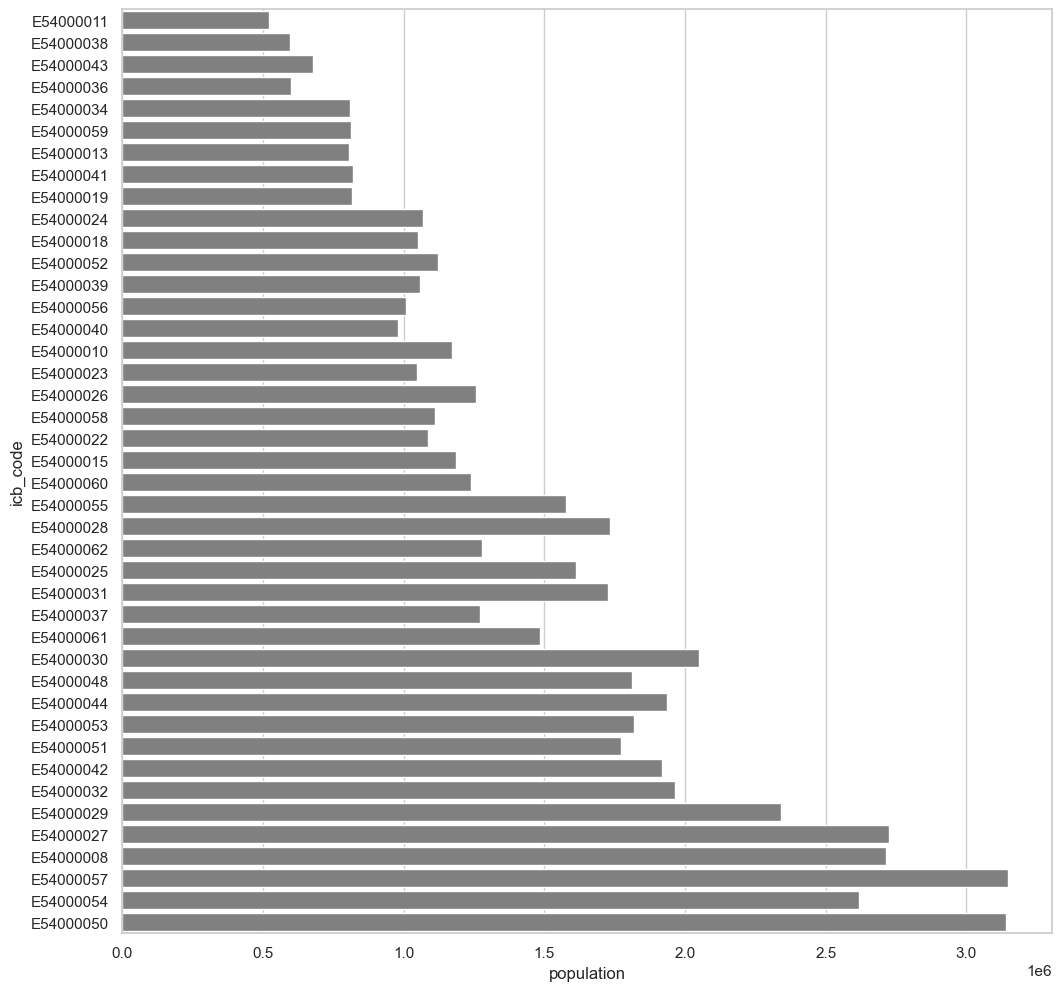

In [1548]:
# Now graph the pop data in grey horizonal barplot to compare properly with the busyness data.
plt.figure(figsize=(12,12))
sns.barplot(x='population', y='icb_code', data=icb_pops_and_busyness, color = 'gray')
plt.show()


I don't have the technical know how to compare this alongside the busyness dataframe. But even here it's clear to see that busyness doesn't align with populations. Here we are looking at the population. It's important therefore that the NHS considers busyness over population when thinking about current funding. So we will turn back now to looking at the trends in terms of when things get busy for the NHS services.  

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [464]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [521]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [478]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
# View the DateFrame.
ad['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [481]:
# Change the date format of nc['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])
# View the DateFrame.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [501]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
ad_date_min = ad['appointment_date'].min()
ad_date_max = ad['appointment_date'].max()
print("The minimum date in the ad dataset is", ad_date_min, "and the maximum date is", ad_date_max)

The minimum date in the ad dataset is 2021-12-01 00:00:00 and the maximum date is 2022-06-30 00:00:00


In [507]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
nc_date_min = nc['appointment_date'].min()
nc_date_max = nc['appointment_date'].max()
print("The minimum date in the nc dataset is", nc_date_min, "and the maximum date is", nc_date_max)

The minimum date in the nc dataset is 2021-08-01 00:00:00 and the maximum date is 2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [ ]:
nc_Question2 = nc.group_by([''])

ad_ICBs = ad.groupby(['icb_ons_code', 'appointment_date', 'actual_duration'])['count_of_appointments'].sum().reset_index()
ad_ICBs.head()

In [534]:
# For each of these service settings, determine the number of records available for the period and the location. 

# Filter the ad data frame for rows containing a value like 'NHS North West London.'
nc_Q2 = nc[nc['sub_icb_location_name'].str.contains('NHS North West London')].copy().reset_index()
nc_Q2.head()

In [536]:
# Group the new df to aggregate the appointment counts for service seting and month.
nc_Q2_grouped = nc_Q2.groupby([ 'service_setting', 'appointment_month'])['count_of_appointments'].sum().reset_index()
nc_Q2_grouped.head()

In [539]:
# Using the months column, output a list of the months. This has the beenfit of being in the correct format etc. 
nc_months = nc_Q2['appointment_month'].unique()

array(['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'],
      dtype=object)

In [540]:
# Construct a list made up of the desired months, with copy and paste. 
nc_months_Q2=['2022-01','2022-02', '2022-03', '2022-04', '2022-05']

In [551]:
# Filter the dataframe to extract the rows whose 'appointment_month' values match those in the list. 
nc_Q2_grouped_filtered = nc_Q2_grouped[nc_Q2_grouped['appointment_month'].isin(nc_months_Q2)].copy().reset_index()
nc_Q2_grouped_filtered.head()

index            service_setting appointment_month  count_of_appointments
0      5  Extended Access Provision           2022-01                  19062
1      6  Extended Access Provision           2022-02                  18283
2      7  Extended Access Provision           2022-03                  22209
3      8  Extended Access Provision           2022-04                  18173
4      9  Extended Access Provision           2022-05                  19682

In [550]:
# Aggregate to the total sum of appointments for each service setting.
Q2=nc_Q2_grouped_filtered.groupby(['service_setting'])['count_of_appointments'].sum()
Q2

service_setting
Extended Access Provision      97409
General Practice             4760966
Other                         151616
Primary Care Network          108901
Unmapped                      387939
Name: count_of_appointments, dtype: int64

Sorting is unnecesary here. The most popular service setting in NHS North West London between 1 January and 1 June 2022, was the General Practice service setting, with more appointments than all the other service settings combined. Even if the question meant 1 June inclusive, we cabn be very confident that the answer would be the same. 

## **Question 3:** Which month had the highest number of appointments?

### **Answer:**  November 2021. 

See analysis below.

'Appointments'  in this question and 'records' in the next, each require a distinct approach but it makes sense to prepare the dataframes during the Q3 process, so they can readily be joined in the next question. That is, I'm wrangling them anyway - more efficient to do it once and well, with a contextual sense of the workflow.

In [564]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.

# Aggregate each relevant df to the appointments per month. 
# Aggregate ar to the appointments per month.
ar_Q4 = ar.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()

# View the relevant column in the new df to double check its datatyped, and to check the df was created properly. 
ar_Q4['appointment_month'].head()

0    2020-01
1    2020-02
2    2020-03
3    2020-04
4    2020-05
Name: appointment_month, dtype: object

In [580]:
# Aggregate ad to the appointments per month

# Copy the ad df.
ad_Q4 = ad

# Create a new column in the new dataframe, with just the year and month as a string.  
ad_Q4['appointment_month'] = ad_Q4['appointment_date'].dt.strftime('%Y-%m')
ad_Q4['appointment_month'].head()

0    2021-12
1    2021-12
2    2021-12
3    2021-12
4    2021-12
Name: appointment_month, dtype: object

In [591]:
# Aggregate ad to the appointments per month.
ad_Q4 = ad.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()

In [579]:
# Aggregate nc to the appointments per month

# Copy the nc df.
nc_Q4 = nc.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()
nc_Q4.head()

appointment_month  count_of_appointments
0           2021-08               23852171
1           2021-09               28522501
2           2021-10               30303834
3           2021-11               30405070
4           2021-12               25140776

The new dfs are sorted and outputted altogether in sequence, below, to make comparison easier and more accurate. 

In [637]:
# Sort the ar_Q4 df by number of appointments, descending. 

ar_Q4_sorted = ar_Q4.sort_values('count_of_appointments', ascending = False)
ar_Q4_sorted.head()

appointment_month  count_of_appointments
22           2021-11               30405070
21           2021-10               30303834
26           2022-03               29595038
20           2021-09               28522501
9            2020-10               28301932

In [594]:
# Sort the ad_Q4 df by number of appointments, descending. 

ad_Q4_sorted = ad_Q4.sort_values('count_of_appointments', ascending = False)
ad_Q4_sorted.head()

appointment_month  count_of_appointments
3           2022-03               27170002
5           2022-05               25343941
6           2022-06               23715317
1           2022-01               23597196
2           2022-02               23351939

In [593]:
# Sort the nc_Q4 df by number of appointments, descending. 

nc_Q4_sorted = nc_Q4.sort_values('count_of_appointments', ascending = False)
nc_Q4_sorted.head()

appointment_month  count_of_appointments
3           2021-11               30405070
2           2021-10               30303834
7           2022-03               29595038
1           2021-09               28522501
9           2022-05               27495508

In [ ]:
# Save the three new dfs into one list.
Q3_dfs = [ad_Q4, ar_Q4, nc_Q4]

In [665]:
# Join the three new mothly appointments dataframes, without adding the appointment values per month.

# Concatenate the dfs.
merged_df = pd.concat(Q4_dfs, axis = 0, ignore_index=True)

# Drop duplicate ROWS only (if there are duplicates in the month column these will need to be wrangeld on a case-by-case basis).
merged_df = merged_df.drop_duplicates()

# Sort by count of_appointments, ascending
merged_df_count = merged_df.sort_values('count_of_appointments', ascending = False)
merged_df_count.head()

appointment_month  count_of_appointments month_datetime
40           2021-11               30405070            NaT
29           2021-11               30405070     2021-11-01
28           2021-10               30303834     2021-10-01
39           2021-10               30303834            NaT
33           2022-03               29595038     2022-03-01

In [666]:
# Change the appointment_month column to datetime to enable sorting by date. 
merged_df['appointment_month'] = pd.to_datetime(merged_df['appointment_month'])
merged_df['appointment_month'].head()
merged_df_date = merged_df.sort_values('appointment_month', ascending = True)
merged_df_date.head()

appointment_month  count_of_appointments month_datetime
7         2020-01-01               27199296     2020-01-01
8         2020-02-01               24104621     2020-02-01
9         2020-03-01               24053468     2020-03-01
10        2020-04-01               16007881     2020-04-01
11        2020-05-01               16417212     2020-05-01

**Response:** At first glance, November 2011 appears to be the month with the most appointments. There are still some months duplicated at this stage of wrangling, but there is only one row for November 11, so we may feel there is no need to explore further at this stage. 

However, given that there are duplicates for some months, it has to be acknowledged that the answer is not yet certain. 

There are three datasets contributing to this aggregating process. They overlap, but only in some date ranges. If the November 2021 entry was from the first dataset, and did not overlap at all with the last, then there could be more confidence about the validity of the claim that November 2021 had the most appointments. But when the concatenated and grouped dataset is sorted by date (and not just appointment count), we can see that the relevant Novemebr 2021 row abuts (and therefore will overlap with) the conflicting dataset. To put it simply: one of them is wrong. Furthermore, where there are discrepancies in appointment counts per month, these are a little over 200 000, so they are not insignicicant and indeed the November 2021 appointment_count is well within 200 000 of its nearest 'rival' for the busiest month (which is the previous month, October 2021). 

So: how to approach this conundrum. We need to consider which datasets overlap, and when. We know this from our earlier explorations into the date ranges (min and max). The metadata will also help. For example we knwo from the metadata that there are several inconsistencies in data collection. Also, there is the attendance status data, which could possibly account for these discrepancies on its own, i.e. if one dataset counts appoints made, and another counts appointments attended. 

In [643]:
# TODO fix the df and variable names that are mislabelled 'Q4' in Q3, without affecting the code that follows. 

# Determine the date range for the ar dataset.

# Create a copy of the ar_Q4 data frame. 
ar_Q4_dates = ar_Q4

# Create a new column in the new dataframe with the month data in datetime.
ar_Q4_dates['month_datetime'] = pd.to_datetime(ar_Q4_dates['appointment_month'])

# Determine the minimum and maximum dates in the ar dr, using this proxy.
ar_Q4_dates_min = ar_Q4_dates['month_datetime'].min()
ar_Q4_dates_max = ar_Q4_dates['month_datetime'].max()
print("The minimum date in the ar dataset is", ar_Q4_dates_min, "and the maximum date is", ar_Q4_dates_max)
print("The minimum date in the ad dataset is", ad_date_min, "and the maximum date is", ad_date_max)
print("The minimum date in the nc dataset is", nc_date_min, "and the maximum date is", nc_date_max)

The minimum date in the ar dataset is 2020-01-01 00:00:00 and the maximum date is 2022-06-01 00:00:00
The minimum date in the ad dataset is 2021-12-01 00:00:00 and the maximum date is 2022-06-30 00:00:00
The minimum date in the nc dataset is 2021-08-01 00:00:00 and the maximum date is 2022-06-30 00:00:00


It's important to note, as we can from the output directly above, that the November 2021 data is held in two databases. This highights and overrules my earlier mistaken assumption that the November 2021 data was only held in one dataset. Of course the mistake was made because I examined the concatenated monthly appointments data frame after grouping and the deleting of dupicates. Next time I would check for duplicates first, as the presence of a duplicate, indicating that the count of appointments vaule across two datasets is the same, strongly indicates that that value is correct. 

In the interests of data validation though, we do want to know what the cause of the discrepancy is, as it may have implications for the rest of our analysis. The hypothesis that the discrepancy is due to attendance status dynamics, still stands, but there other possibilities, including that data collection was at fault, as is indicated by the meta data. 

To test the attendance hypothesis, we can look closely at the total and the attended values from the November 2021 appointment count of the ar df. This comparison may reveal values which are familiar from our analysis above. If so, it will make our task easier. 

In [659]:
ar_all_Q3 = ar.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()
ar_all_Q3.head()

appointment_month appointment_status  count_of_appointments
0           2020-01           Attended               24538291
1           2020-01                DNA                1298269
2           2020-01            Unknown                1362736
3           2020-02           Attended               21640067
4           2020-02                DNA                1215154

In [663]:
ar_total_Q3 = ar_all_Q3.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()
ar_total_Q3.head()

appointment_month  count_of_appointments
0           2020-01               27199296
1           2020-02               24104621
2           2020-03               24053468
3           2020-04               16007881
4           2020-05               16417212

In [662]:
ar_attended_Q3 = ar_all_Q3[ar_all_Q3['appointment_status']=='Attended']
ar_attended_Q3.head()

appointment_month appointment_status  count_of_appointments
0            2020-01           Attended               24538291
3            2020-02           Attended               21640067
6            2020-03           Attended               20718865
9            2020-04           Attended               13982824
12           2020-05           Attended               14962850

Comparing the values in these datasets has been highly elucidating. The insight into the data is as follows: 
- ad (as the name ie 'actual duration' may suggest) records attended appointment data.
- ar records both (attended, DNA, Unknown and, by implication, the totals)
- nc records only the total - ie the appointments made.

There are implications for the present question, and for the entire approach to the data exploration and analysis henceforth. For the moment, what this means for the current question is that we can answer the question in terms of the attended appointments, with regard to the whole timeframe encompassed by the datasets.This is because together the ar and ad datasets cover the entire range. We can answer regarding the total appointments with confidence also, but this time using the ar and the nc data sets. 

We will return to the data with what we know now, but we will keep the exploration towards answering this question, in place, because it's important to show that mistakes and inconsistencies, when encountered, are not ignored, and indeed the process followed is thorough enough to reveal those. 



In [676]:
# Join the ad dataset and the ar dataset's attended values. Answer for attended appointments.

# Drop the appointment_status column from the ar_attended data frame.
ar_attended_Q3 = ar_attended_Q3.drop('appointment_status', axis = 1)

# Listify the two dfs
attended_appointments = [ad_Q4, ar_attended_Q3]

# Concatenate the two dfs. 
attended_appointments_concat = pd.concat(attended_appointments, axis = 0, ignore_index=True)

# Sort the appointment_count data, descending. 
attended_appointments_sorted = attended_appointments_concat.sort_values('count_of_appointments',\
                                                                        ascending = False).reset_index()
attended_appointments_sorted.head()

# Could remove duplicates but that is unnecessary here.

index appointment_month  count_of_appointments
0     29           2021-11               27667665
1     28           2021-10               27170506
2      3           2022-03               27170002
3     33           2022-03               27170002
4     27           2021-09               25757066

**Attended Appointments**

The appointment with the most ***attended*** appointments is November 2021.

In [678]:
# Join the nc and the ar's total values. Answer for booked appointments. 



# Listify the two dfs
booked_appointments = [nc_Q4, ar_total_Q3]

# Concatenate the two dfs. 
booked_appointments_concat = pd.concat(booked_appointments, axis = 0, ignore_index=True)

# Sort the appointment_count data, descending. 
booked_appointments_sorted = booked_appointments_concat.sort_values('count_of_appointments',\
                                                                        ascending = False).reset_index()
booked_appointments_sorted.head()

# Could remove duplicates but that is unnecessary here.



index appointment_month  count_of_appointments
0      3           2021-11               30405070
1     33           2021-11               30405070
2      2           2021-10               30303834
3     32           2021-10               30303834
4     37           2022-03               29595038

**Booked Appointments**

The appointment with the most ***booked*** appointments is also November 2021.

**Question 4:** What was the total number of records per month?

In [664]:
# Group the new df by appointment_month and sum the count of records for each month.
monthly_records = merged_df.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()
monthly_records = monthly_records.rename(columns={'appointment_month': 'month', 'count_of_appointments': 'records'})
monthly_records.head()

month   records
0 2020-01-01  27199296
1 2020-02-01  24104621
2 2020-03-01  24053468
3 2020-04-01  16007881
4 2020-05-01  16417212

The number of records per month can be seen in the data frame above, which is ordered by date. The 'records' values represent the sum of all records across the relevant datasets. An appointment that features across all three dataframes will be counted three times, as that ammounts to three records, but an appointment that onle features in one or two (because of the timeframe discrepancies of the datasets) will only be counted once or twice, respectively.

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [680]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [685]:
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month ad_month nc_month  
0           2021-08  2021-08  2021-08  
1           2021-08  2021-08  2021-08  
2           2021-08  2021-08  2021-08  
3           2021-08  2021-08  2021-08  
4           2021-08  2021-08  2021-08

In [684]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'].head()

# outputting the first five rows of the column shows that is already in string format (ie object).

0    2021-08
1    2021-08
2    2021-08
3    2021-08
4    2021-08
Name: appointment_month, dtype: object

In [688]:
# Aggregate on monthly level and determine the sum of records per month.
nc_months_records = nc.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()

# View output.
nc_months_records.head()

appointment_month  count_of_appointments
0           2021-08               23852171
1           2021-09               28522501
2           2021-10               30303834
3           2021-11               30405070
4           2021-12               25140776

**Service settings:**

In [739]:
# Plot the appointments over the available date range, and review the service settings for months.

# Prepare the data. 
nc_months_service_settings = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

nc_months_service_settings.head()

appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843

In [ ]:
# Plot the total appointments over the date range. 
# Create a lineplot.

<Axes: xlabel='appointment_month', ylabel='count_of_appointments'>

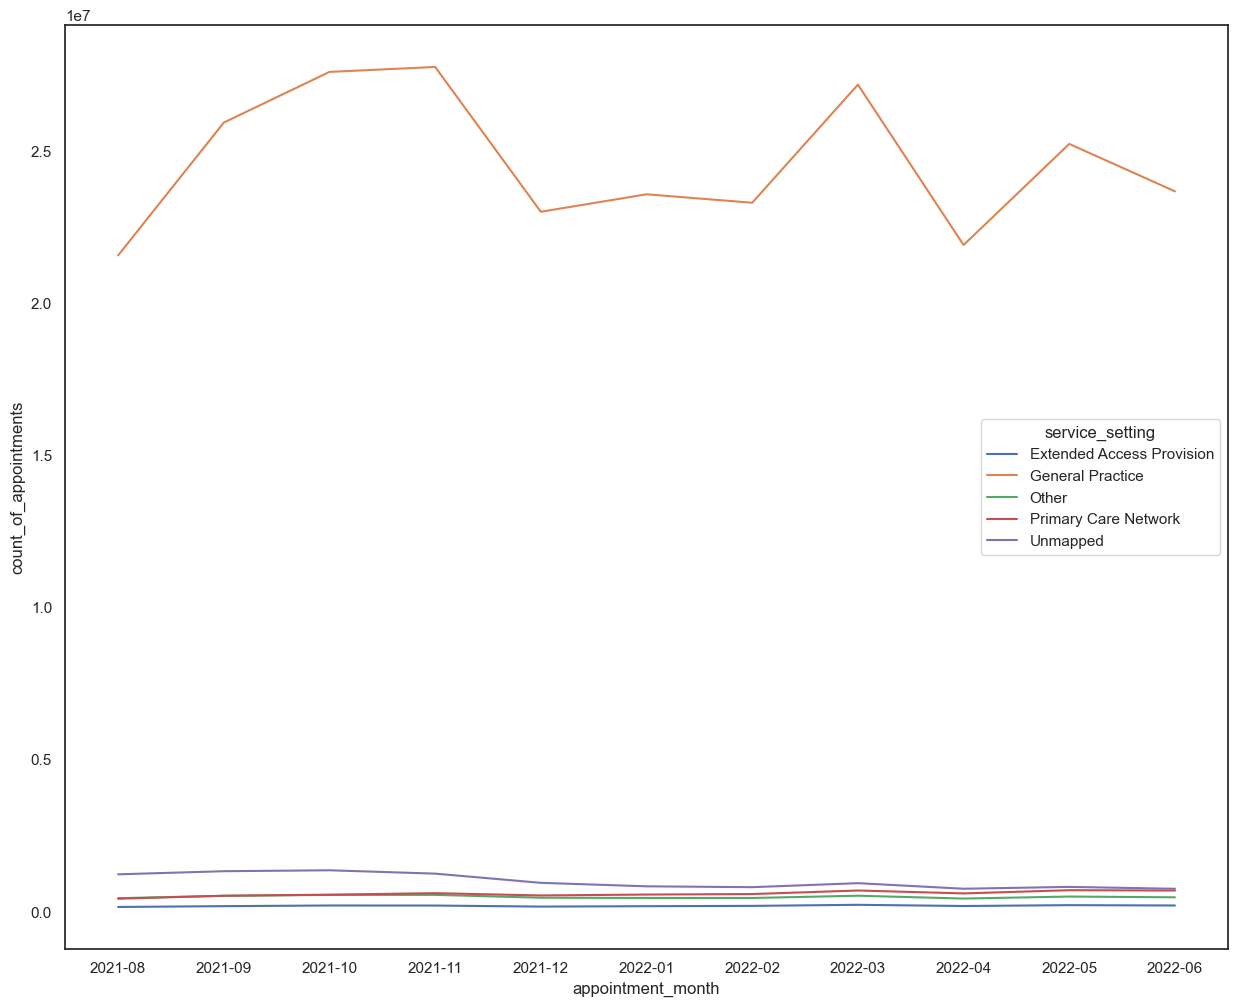

In [694]:
# Review the service settings for months.

# Create a line plot. 
sns.lineplot(y ='count_of_appointments', x = 'appointment_month', hue = 'service_setting', data = nc_months_service_settings)
plt.legend

GP service settings fluctuate massively, at almost 10 million: between just over 20 million and just under 30 million. That must be really hard to staff for - and yet may well also reflect availability of staff. It would be really useful to be able to predict the rates, and maybe smooth them out, or where that isn't possible, use available doctors as effectively and in as well-being-enhancing a way as possible! 

Separate the service settings into 1/GP and 2/other. There may not be much improvment in the GP visualisation but it may enahnce the clarity of the other service settings data, especially if plotted vertically on a tall line plot.   

In [699]:
# Filter out the GP data from the df. 
no_GPS_nc_months_service_settings = nc_months_service_settings[nc_months_service_settings\
                                                               ['service_setting'] !='General Practice']

<function matplotlib.pyplot.legend(*args, **kwargs)>

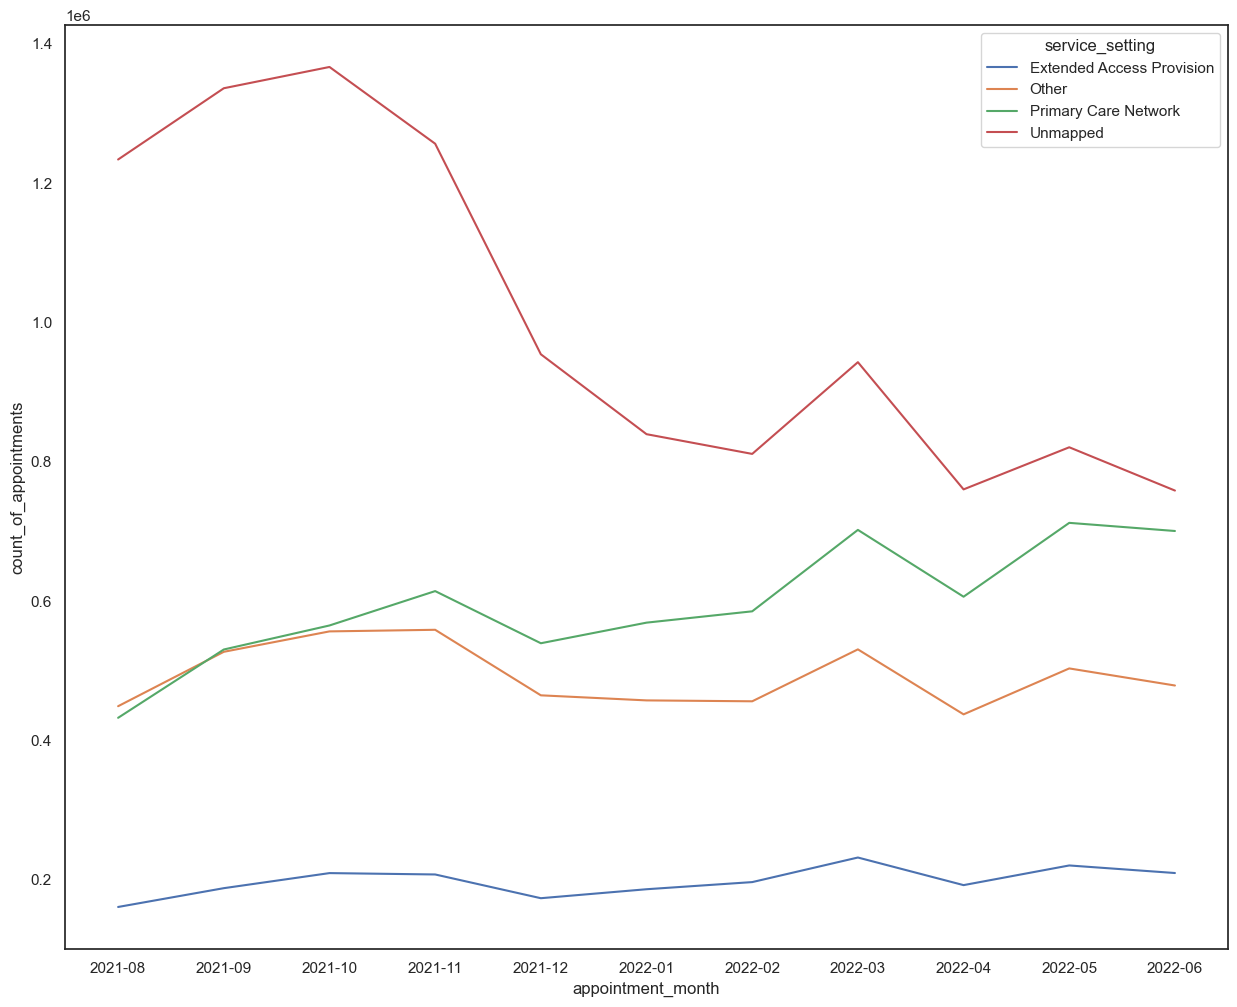

In [700]:
# Create a line plot showing only the non GP service settings. 
sns.lineplot(y ='count_of_appointments', x = 'appointment_month',\
             hue = 'service_setting', data = no_GPS_nc_months_service_settings)

plt.legend

Much more fluctuation here than was evident before filtering out the GP data. This also helps to reframe the data in terms of its overall importance - we are looking here at monthly appointment counts between just under 2million, and just under 14 million. Those numbers are not insignificant for any of the stakeholders, but they could have appeared so in the previous visualisation.  

The very reason that the NHS has recently undergone a large structural shift regading its Integrated Care Partnerships, which the ICBs and in the subICB sit under is because of the importance of wrap around care, ie all health and social service staff working together for bettr health outcomes. Therefore even though GPs are the major players in this data, it is important not to undervalue the other staff and other settings when considering a strategy that is in line with the direction the NHS is going in. Further along we may be able to identify some relationships between General Practice and other settings. To do that, with this nc dataset, one approach we can follow is to scale the General Practice data to see how its trends inter-relate with the other service settings. 

The drop in unmapped data represents better data collection strategies, but it also represents an accomplishment in terms of adapting data collection processes to what the health processionals are actually doing, and that is a real win as not only does it reflect the NHS's growing data maturity, but also that systemically, what staff are diong, is being valued.


In [701]:
# Filter out the GP AND the Unmapped data from the df. 
non_GP_service_settings = no_GPS_nc_months_service_settings[no_GPS_nc_months_service_settings\
                                                               ['service_setting'] !='Unmapped']

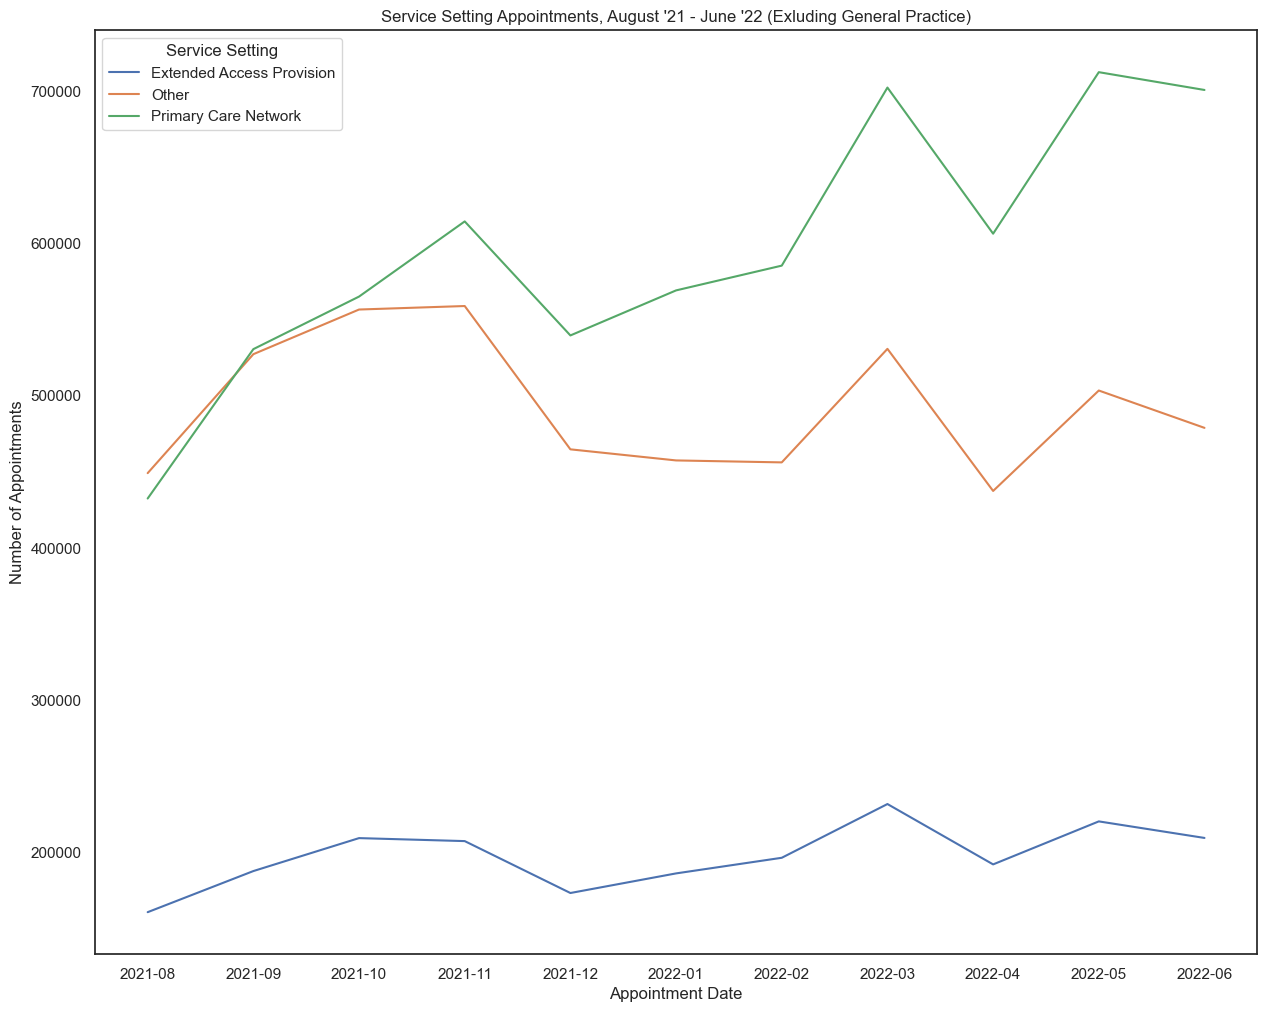

In [796]:
# Create a line plot without the General Practice and Unmapped service settings. 
sns.lineplot(y ='count_of_appointments', x = 'appointment_month',\
             hue = 'service_setting', data = non_GP_service_settings)
title = "Service Setting"

plt.title ("Service Setting Appointments, August '21 - June '22 (Exluding General Practice)")
plt.xlabel('Appointment Date')
plt.ylabel('Number of Appointments')
plt.legend(title = "Service Setting")

As hoped, we can clearly see in the graph above the trends within the non - General Practice service settings. 
- The number of Primary Care Network(PCN) appointments has nearly doubled in the timeframe. This reflects the push to amalgamate the GPS into scaled service settings. 
On PCNs:

> They are new, and they are significant: "A key part of the NHS long-term plan, primary care networks (PCNs) will bring general practices together to work at scale."

> "As of the latest PCN sign-up in May 2020, all except a handful of GP practices in England have come together in around 1,250 geographical networks covering populations of approximately 30–50,000 patients."
- But the 'Other' service settings are tied almost exactly to the PCN dips and troughs, and in sychnronicity. Even the Extended Access Provision setting rises and falls at the same time, it's just that the numbers are not as high. 
- It's imperative now to put the scaled General Practice data back into this plot, to see if it has the same dynamics. 

In [719]:
# Scale the General Practice Data so that its range is approximately 400 000 - 800 000.

# Extract the GP data
general_practices = nc_months_service_settings[nc_months_service_settings\
                                                               ['service_setting'] =='General Practice']
# Get the min and max.
general_practices.describe()

count_of_appointments
count           1.100000e+01
mean            2.461924e+07
std             2.244996e+06
min             2.157585e+07
25%             2.315738e+07
50%             2.368037e+07
75%             2.656409e+07
max             2.776789e+07

In [740]:
# Make a copy
scaled_settings = nc_months_service_settings

In [741]:
# Scale the General Practice values only. 

# The code here has a # to stop it being run again 
# scaled_settings.loc[scaled_settings['service_setting'] =='General Practice',\
#                                              'count_of_appointments'] /=50
scaled_settings.head()

appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision              160927.00
1           2021-08           General Practice              431517.04
2           2021-08                      Other              449101.00
3           2021-08       Primary Care Network              432448.00
4           2021-08                   Unmapped             1233843.00

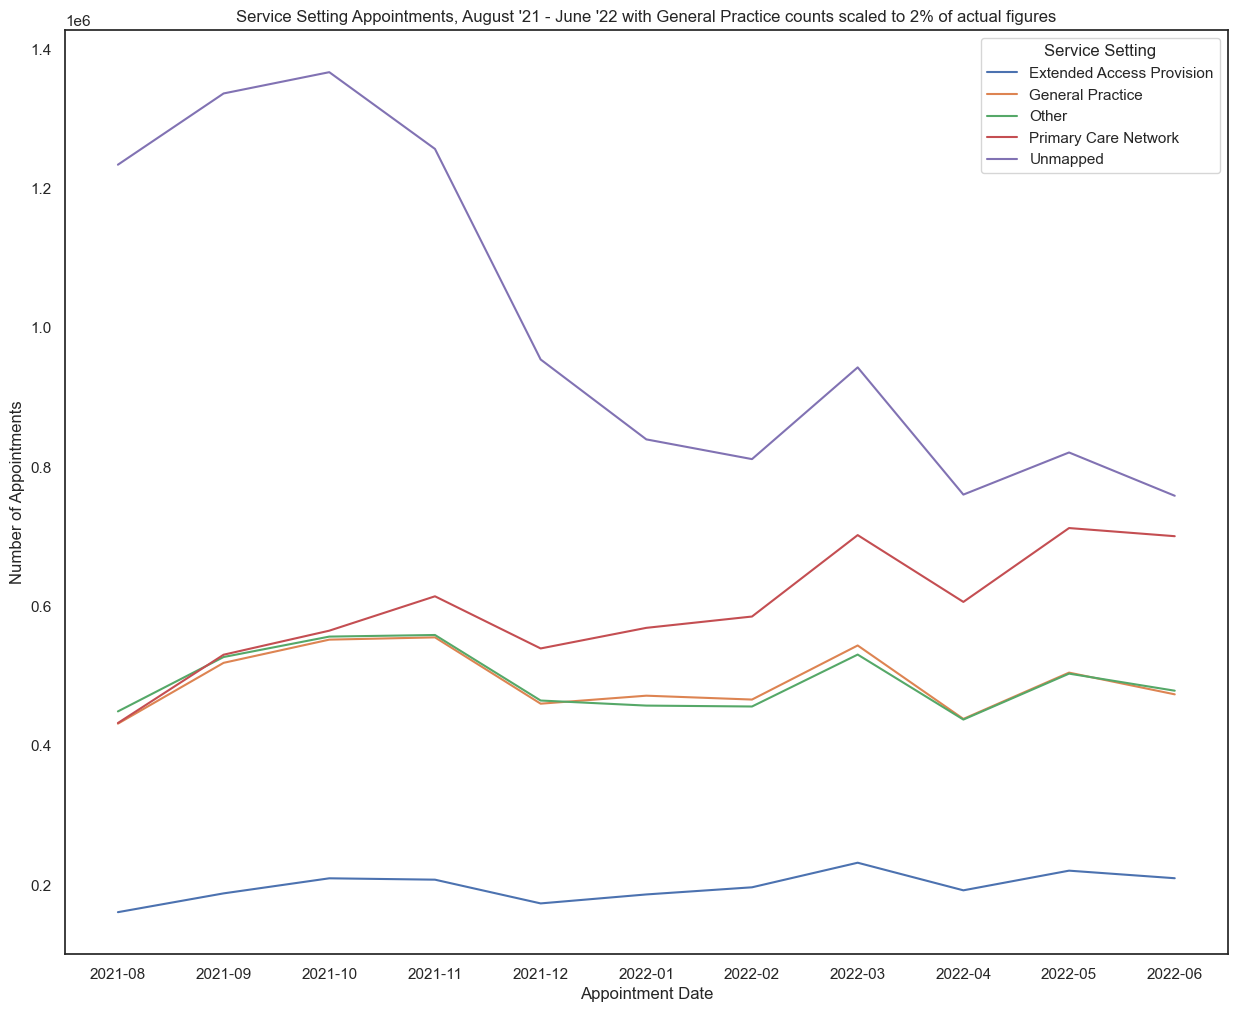

In [795]:
# Remove the 'Unmapped' data? 
# Graph the data.
# Create a line plot without the General Practice and Unmapped service settings. 
sns.lineplot(y ='count_of_appointments', x = 'appointment_month',\
             hue = 'service_setting', data = scaled_settings)

plt.title ("Service Setting Appointments, August '21 - June '22 with General Practice counts scaled to 2% of actual figures")
plt.xlabel('Appointment Date')
plt.ylabel('Number of Appointments')
plt.legend(title = "Service Setting")

Monthly View:

Peaks in appointment counts are usually shortlived, and after a month or thereabouts, they return to the trends they were on beforehand. For example: 
There was are several rises and falls in count that affect all of these service settings, roughly synchronously:
- 2021: a small drop in appointment counts after November for all, followed by a plateau in GP and Other settings, and a gradual rise in the EAP and PCN settings. 
- 2022: a cnsiderable peak in appointments across settings, in March, followed by a drop immediately afterwards, with another peak and fall cycle in May and June.

Seasonal View: 
- All of the service settings experienced an extended, 3-month long rise in appointment numbers, with a round shaped (ie gradual and sustained) rise and fall dynamic. This occured in 2021 over September, October and November, which coincides with Spring. Because the EAP data appears relatively to be consitently within its range, and less responsive to trends than the other service settings are, it could well be the case that the unmapped data, which is falling as appointment data is better recorded (mapped), represents counts that rightfully, mostly, belong in the GP, Primary Network and Other settings. If that's the case (and it is very likely), then the seasonal rise and fall in data identified above, would have bene more pronounced.

**Context types:**

### Create a separate data set that can be used in future weeks. 

The use of the dataset will depend on the benefit it offers, and the problems it avoids, for the stakeholders. Who are the stakeholders? Primarily, patients and their communities, and the NHS, who are dealing with issues like employment and retention of staff, and in terms of this assignment, trying to ascertain the adequacy of staff capacity in the network. 

This dataset's appointments are booked appointments, and do not reflect attendance rates. 


In [792]:
contexts = nc.groupby(['context_type', 'appointment_month'])['count_of_appointments'].sum().reset_index()
contexts.head()

context_type appointment_month  count_of_appointments
0  Care Related Encounter           2021-08               20255235
1  Care Related Encounter           2021-09               24404251
2  Care Related Encounter           2021-10               26125201
3  Care Related Encounter           2021-11               26282778
4  Care Related Encounter           2021-12               21798612

<function matplotlib.pyplot.legend(*args, **kwargs)>

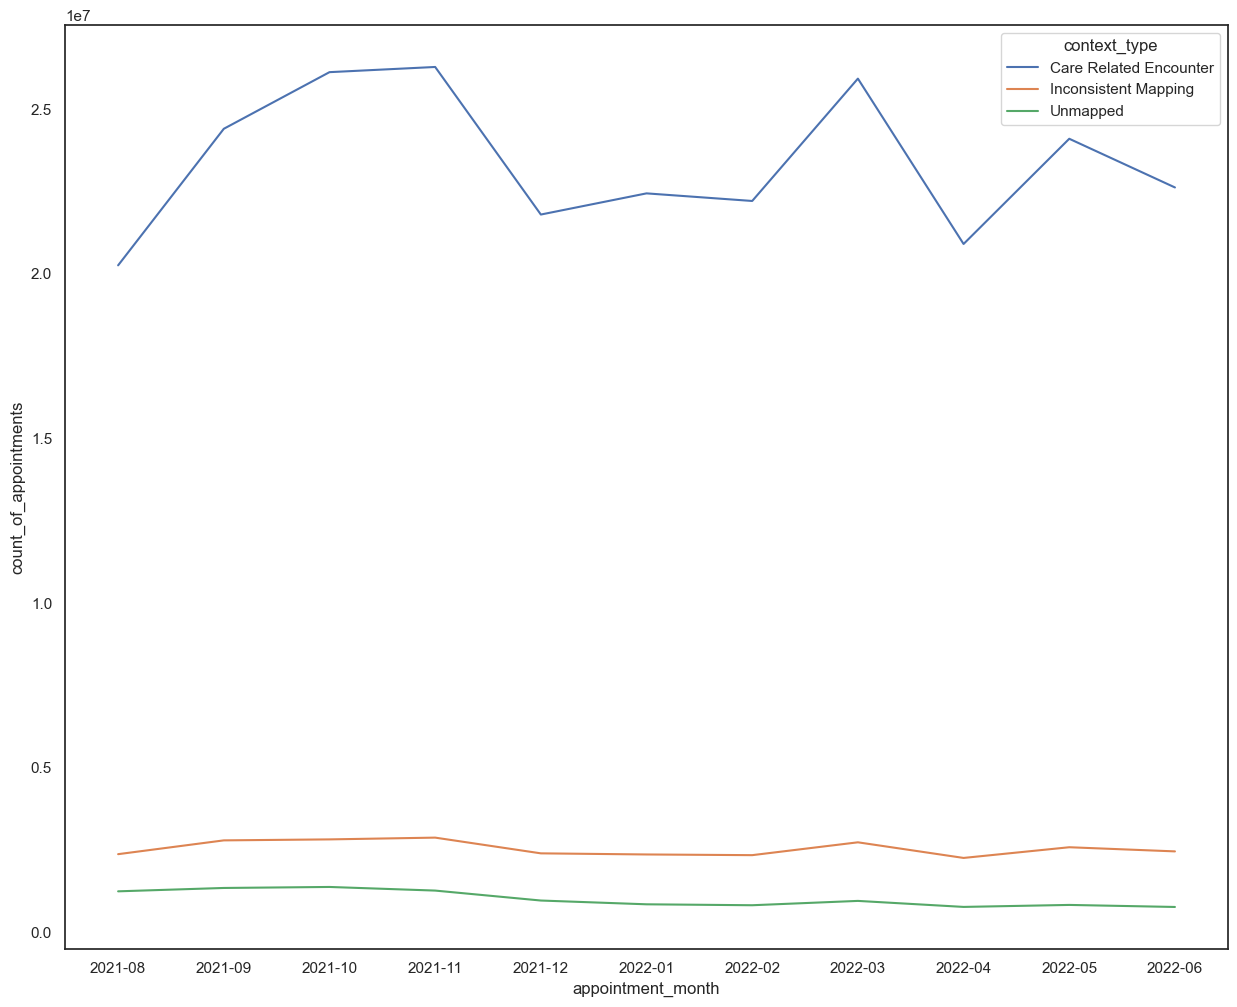

In [753]:
# Create a line plot. 
sns.lineplot(y ='count_of_appointments', x = 'appointment_month', hue = 'context_type', data = contexts)
plt.legend

In [793]:
# Scale the Care Related Encounter (CRE) data. 


# Make a copy of the df
scaled_contexts = contexts

# Scale the CRE data
scaled_contexts.loc[scaled_contexts['context_type'] =='Care Related Encounter', 'count_of_appointments'] /=8.5
scaled_contexts.loc[scaled_contexts['context_type'] =='Unmapped', 'count_of_appointments'] *=2

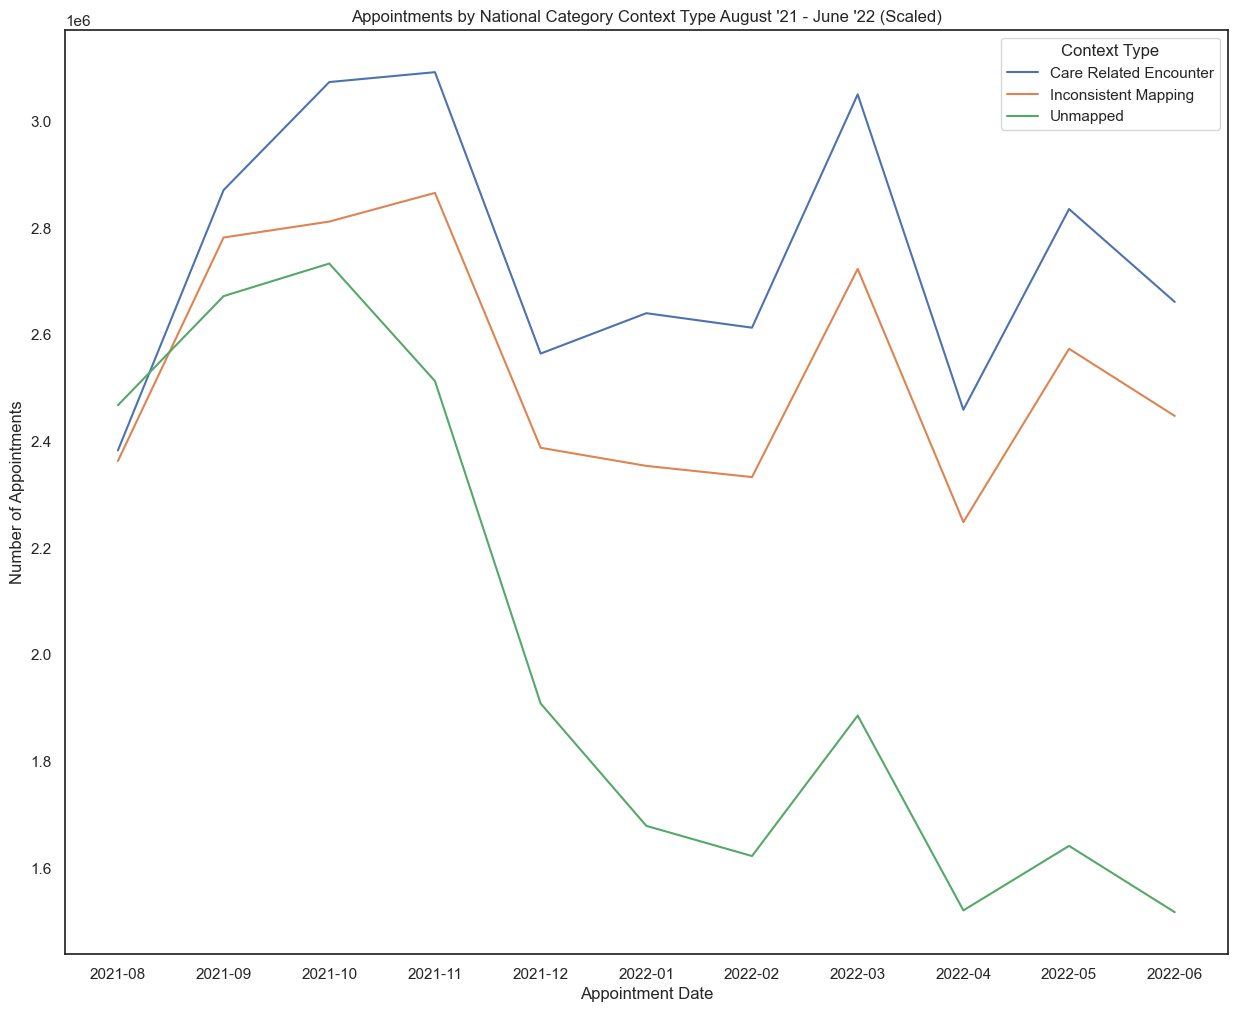

In [797]:
# Create a line plot. 
sns.lineplot(y ='count_of_appointments', x = 'appointment_month', hue = 'context_type', data = scaled_contexts)
plt.legend

plt.title ("Appointments by National Category Context Type August '21 - June '22 (Scaled)")
plt.xlabel('Appointment Date')
plt.ylabel('Number of Appointments')
plt.legend(title = "Context Type")

In [802]:
# Check the results with the application of a z-scaler tool to the dataset.
scaler = StandardScaler()
contexts['count_of_appointments_scaled'] = scaler.fit_transform(contexts[['count_of_appointments']])
contexts.head()

context_type appointment_month  count_of_appointments  \
0  Care Related Encounter           2021-08           2.382969e+06   
1  Care Related Encounter           2021-09           2.871088e+06   
2  Care Related Encounter           2021-10           3.073553e+06   
3  Care Related Encounter           2021-11           3.092092e+06   
4  Care Related Encounter           2021-12           2.564543e+06   

   count_of_appointments_scaled  
0                     -0.112434  
1                      0.979511  
2                      1.432434  
3                      1.473905  
4                      0.293754

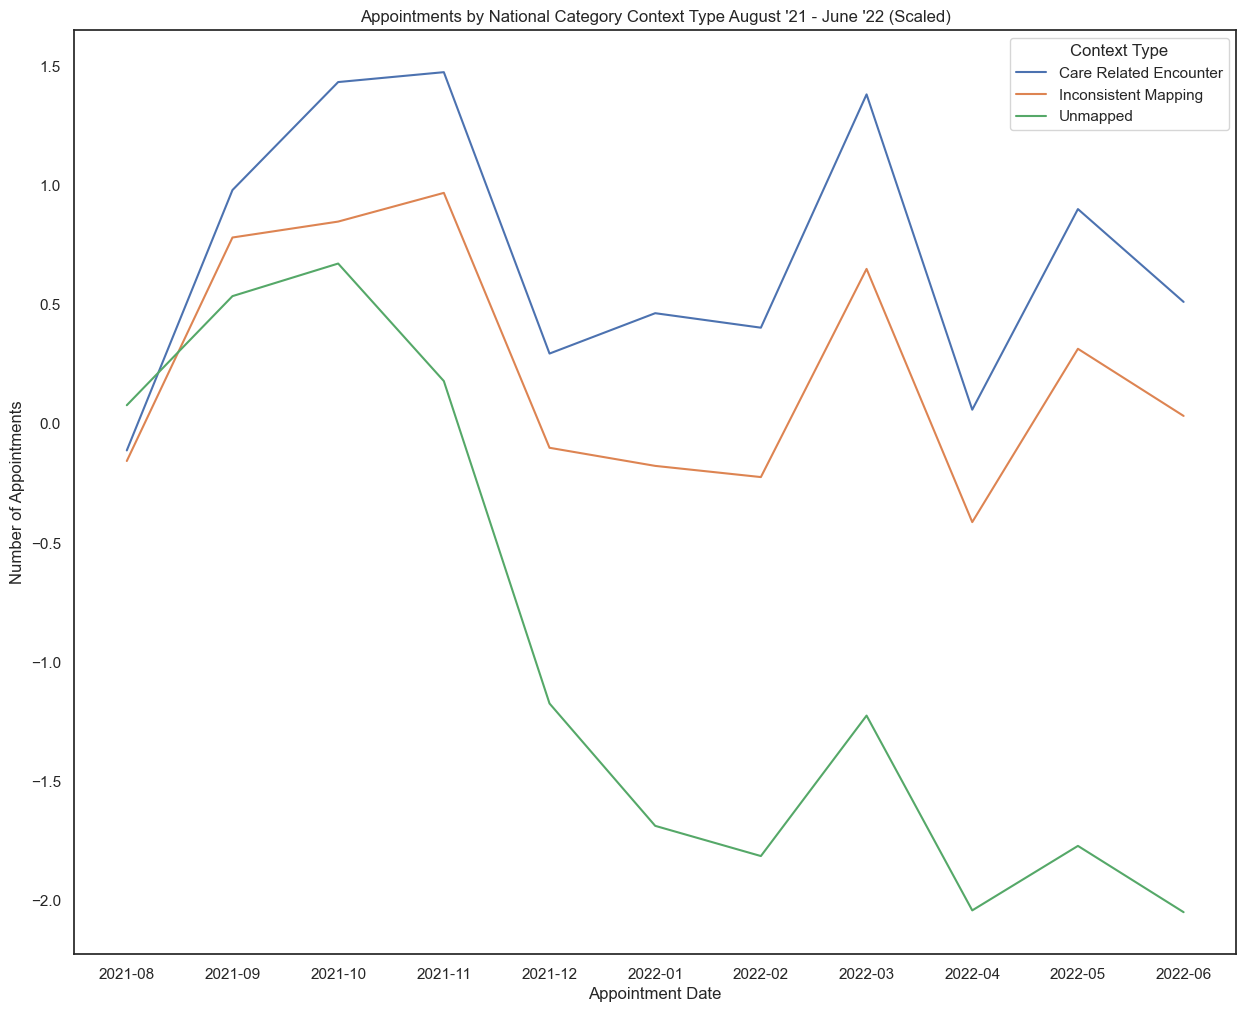

In [803]:
# Present the data in a lineplot.
sns.lineplot(y ='count_of_appointments_scaled', x = 'appointment_month', hue = 'context_type', data = contexts)
plt.legend

plt.title ("Appointments by National Category Context Type August '21 - June '22 (Scaled)")
plt.xlabel('Appointment Date')
plt.ylabel('Number of Appointments')
plt.legend(title = "Context Type")

> Reflection: It's reassuring to see that the scaling tool produced a dataset that is almost identical in shape, and in its effect re: scaling, to the scaling I performed using common sense. I am going to leave both of ther visualisations here because I think it's important in the context of learning, to be able to show what happen in the scaling process, and that by doing it myself I was clearly able to choose and taylor an approach that worked in terms of showing the shapes of the context type data sets, in relation to each other, two ways, after choosing a purpose for the scaling process.

**Monthly View:**

Most of the peaks don't last more than a month, but there really is a consistent month up, month down cyle here: One month there is a peak, and the next there is a fall, alternately. It's more pronounced some months, and more subtle at other times. 

Seasonal View:
There are three consecutive months where the appointment counts are unusually high: A sharp rise in appointment numbers in September, a continued rise at reduced rate into October, and then either a further rise in Novermber (as seen in the Care Related Encounters and Inconsistent Mapping contexts) or the beginning of a decrease that nevertheless is higher than higher than normal.

Spring sees another seasonal trend - this time a sharp rise in March, falls again in April to something like where it was before, and then rises again in May (though not as steeply as the March peak) beforefalling back again to the normal-like count in June, which is when Summer officially begins. 

These two seasons - Spring and Autumn - are when the weather begins to turn - people ar adjusting to being outside more, and being inside more (with the subsequent increased exposure to infectious germs), respectively. Of course there are many othr factors. 

**National categories:**

In [805]:
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [810]:
# Create a separate data set that can be used in future weeks. 
nc_months_Obj1=nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# View output.
nc_months_Obj1.head()

appointment_month  \
0           2021-08   
1           2021-08   
2           2021-08   
3           2021-08   
4           2021-08   

                                                     national_category  \
0  Care Home Needs Assessment & Personalised Care and Support Planning   
1                                                      Care Home Visit   
2                                                      Clinical Triage   
3                                           General Consultation Acute   
4                                         General Consultation Routine   

   count_of_appointments  
0                  29676  
1                  47583  
2                3704207  
3                4280920  
4                7756045

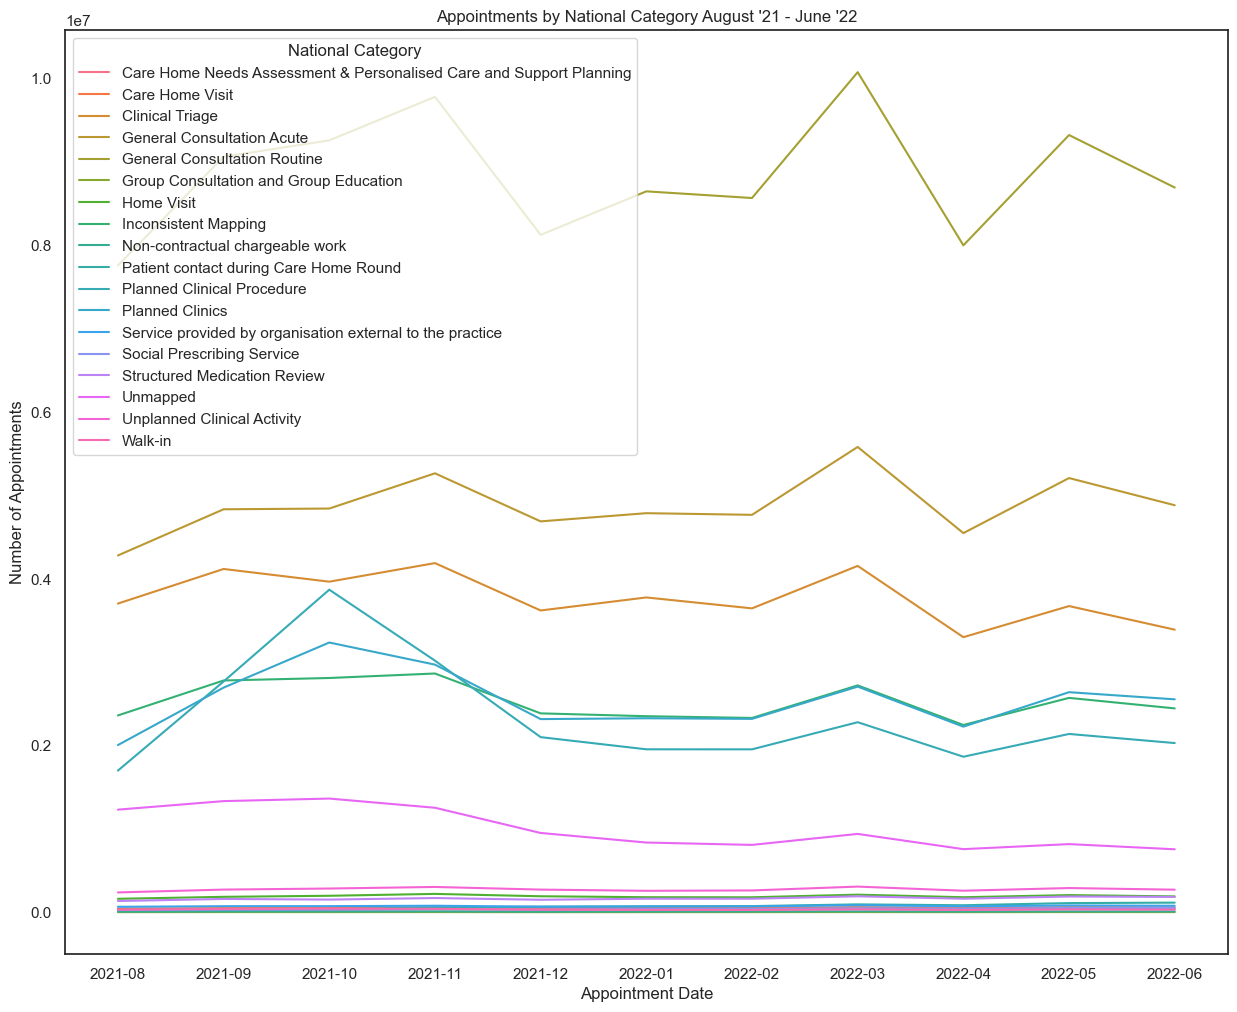

In [811]:
# Timeplot the dataset before scaling. 

# Present the data in a lineplot.
sns.lineplot(y ='count_of_appointments', x = 'appointment_month', hue = 'national_category', data = nc_months_Obj1)
plt.legend

plt.title ("Appointments by National Category August '21 - June '22")
plt.xlabel('Appointment Date')
plt.ylabel('Number of Appointments')
plt.legend(title = "National Category")

In [817]:
# Scale the data. 

# Copy the df.
categories_scaled = nc_months_Obj1

# Scale the appointment_count data in the new df. 
categories_scaled['count_of_appointments_scaled'] = scaler.fit_transform(categories_scaled[['count_of_appointments']])
categories_scaled

appointment_month  \
0             2021-08   
1             2021-08   
2             2021-08   
3             2021-08   
4             2021-08   
..                ...   
193           2022-06   
194           2022-06   
195           2022-06   
196           2022-06   
197           2022-06   

                                                       national_category  \
0    Care Home Needs Assessment & Personalised Care and Support Planning   
1                                                        Care Home Visit   
2                                                        Clinical Triage   
3                                             General Consultation Acute   
4                                           General Consultation Routine   
..                                                                   ...   
193                                           Social Prescribing Service   
194                                         Structured Medication Review   
195                                                             Unmapped   
196                                          Unplanned Clinical Activity   
197                                                              Walk-in   

     count_of_appointments  count_of_appointments_scaled  
0                    29676                     -0.631707  
1                    47583                     -0.623988  
2                  3704207                      0.952197  
3                  4280920                      1.200789  
4                  7756045                      2.698740  
..                     ...                           ...  
193                  55066                     -0.620763  
194                 187800                     -0.563548  
195                 758640                     -0.317488  
196                 274491                     -0.526180  
197                  35935                     -0.629009  

[198 rows x 4 columns]

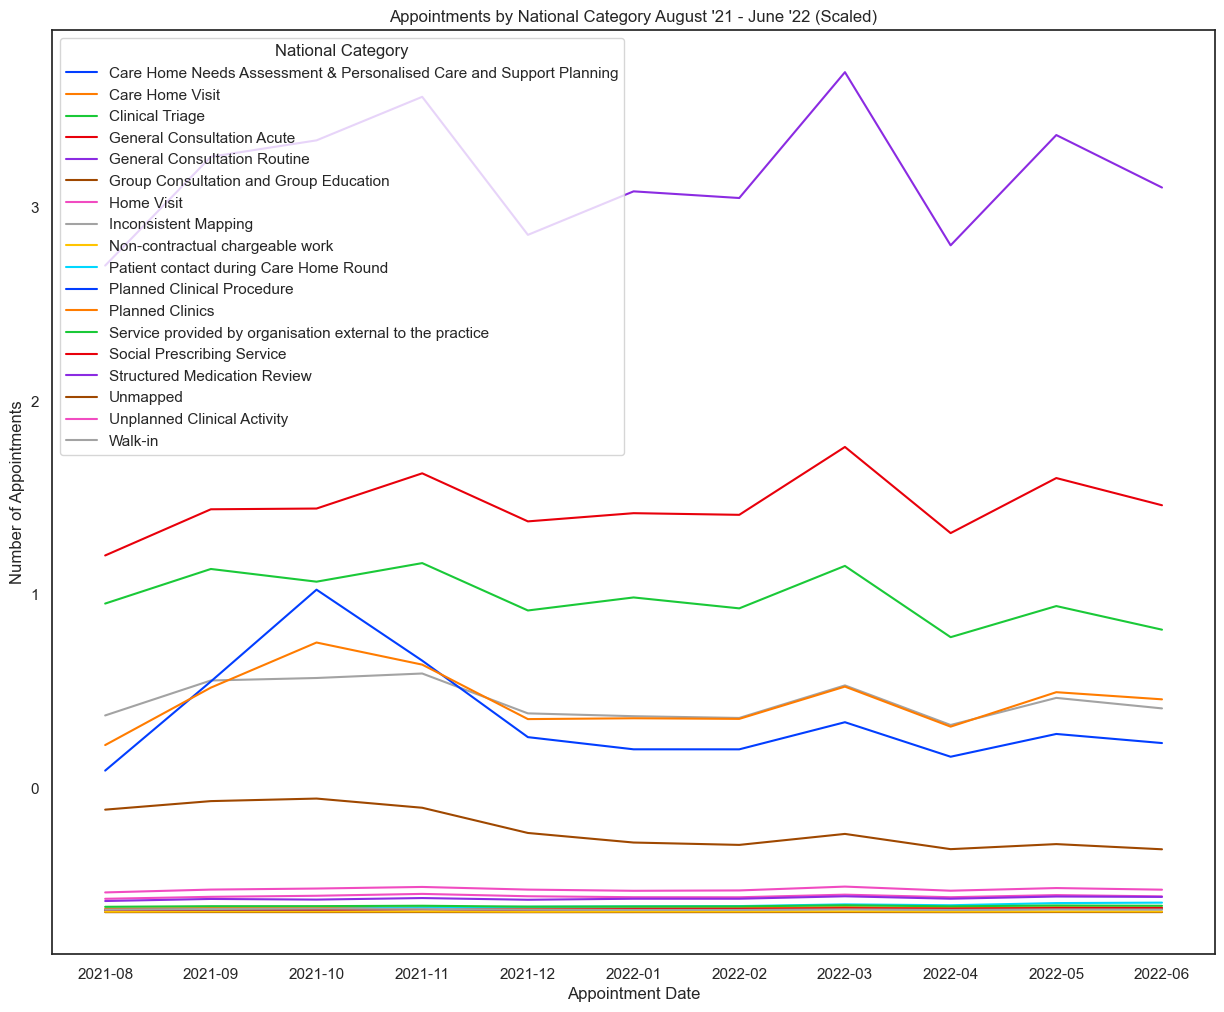

In [819]:
# Timeplot the scaled nc categories data.

# Present the data in a lineplot.
sns.lineplot(y ='count_of_appointments_scaled', x = 'appointment_month', hue = 'national_category',\
             palette = 'bright', data = categories_scaled)
plt.legend

plt.title ("Appointments by National Category August '21 - June '22 (Scaled)")
plt.xlabel('Appointment Date')
plt.ylabel('Number of Appointments')
plt.legend(title = "National Category")

This is a really differnt outcome from the scaling process, compared to the previous examples in this section of the assignment: It looks like the scaling hasn't worked, but in fact there are several national categories whose just farily flat, as well as being relatively low numbers. Nevertheless even those catgories do show some dynamics in trend with the rest. 

It's good to keep inmind that the nc dataframe from which this graph is sourced, only records booked appointments, and doesn't reflect whether or not people actually attended them. The implications there are subtle, but certainly some the appointments above will not have been attended. We can look further into those patterns at another time. But for now it makes sense at least to consider what happens in those very busy times, to patients' ability to book to see a doctor they need it. 


**Monthly View**

There are the same seesaw-like months patterns evident across the other datasets, which is very unsurprising. The biggest of these month to month up/down trends is in March, where most of the categories and certainly the larger ones, peak and then fall again. Other peaks, roughly in order of the number of the caegories which follow the trend, and how big the peak is, are: May, September and November. One curious version of this dynamic is that in October, two categories buck resist the accompanying October fall, and instead continue to peak in more of a sustained seasonal trend. 

**Seasonal View**

Planned Clinical Procedures and Planned Clinics are the most clearly seasonal of all the categories. Over the Autumn months (September, October and November) they rise, rise again, then dall but only back to September level, before returning to the shorter months cycles evident across the dataset.  It is sobering to consider that during times of peak business, these extended, rounded, upward curves  may represent delays in peoples being abel to see a doctor, rather than booking and seeing them immediately. The more people are sick at one time, the more likely it is that they will be unable to see a doctor straight away, so that instead of creating a spike in the data, they stay sicker longer, and wait longer to see a doctor. The lines here don't just represent appointments, they also represent sickness. Furthermore, the longer people are sicker, the more likely they are to need to return to work while still unwell, and otherwise just to be infecting others more. So there is a compounding effect in the seasonal data we are looking at here and staffing this is going to be a challenge. 

What is particularly noteable about this seasonal trend, is that while the Planned Clinical Procedured and Planned clinics rise, they almost appear to be taking appointments from the Social Prescribing Service category and the Service Provided by Organisation External to the Practice category. In fact this makes sense. If the network has the capacity to shift doctors between categoires, then maybe they are temporarily stepping out of one context and into another to help their colleagues with seasonal fluctuations in sickness. Perhaps these two peaking categories at this time represent doctors stepping out of less pressing areas of need to assist with infectious disease control, from colds and flus to covid. 

To get a better sense of how true this is, let's take a look an aggregated timeplot of the appointments from the national categories dataset, to check out the shape of the timeplotted appointment data across all national categories. 

In [828]:
# Create a grouped df to show all the apointments from the nc 
nc_all_appointments_monthly = nc.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()
nc_all_appointments_monthly.head()

appointment_month  count_of_appointments
0           2021-08               23852171
1           2021-09               28522501
2           2021-10               30303834
3           2021-11               30405070
4           2021-12               25140776

Text(0, 0.5, 'Number of Appointments')

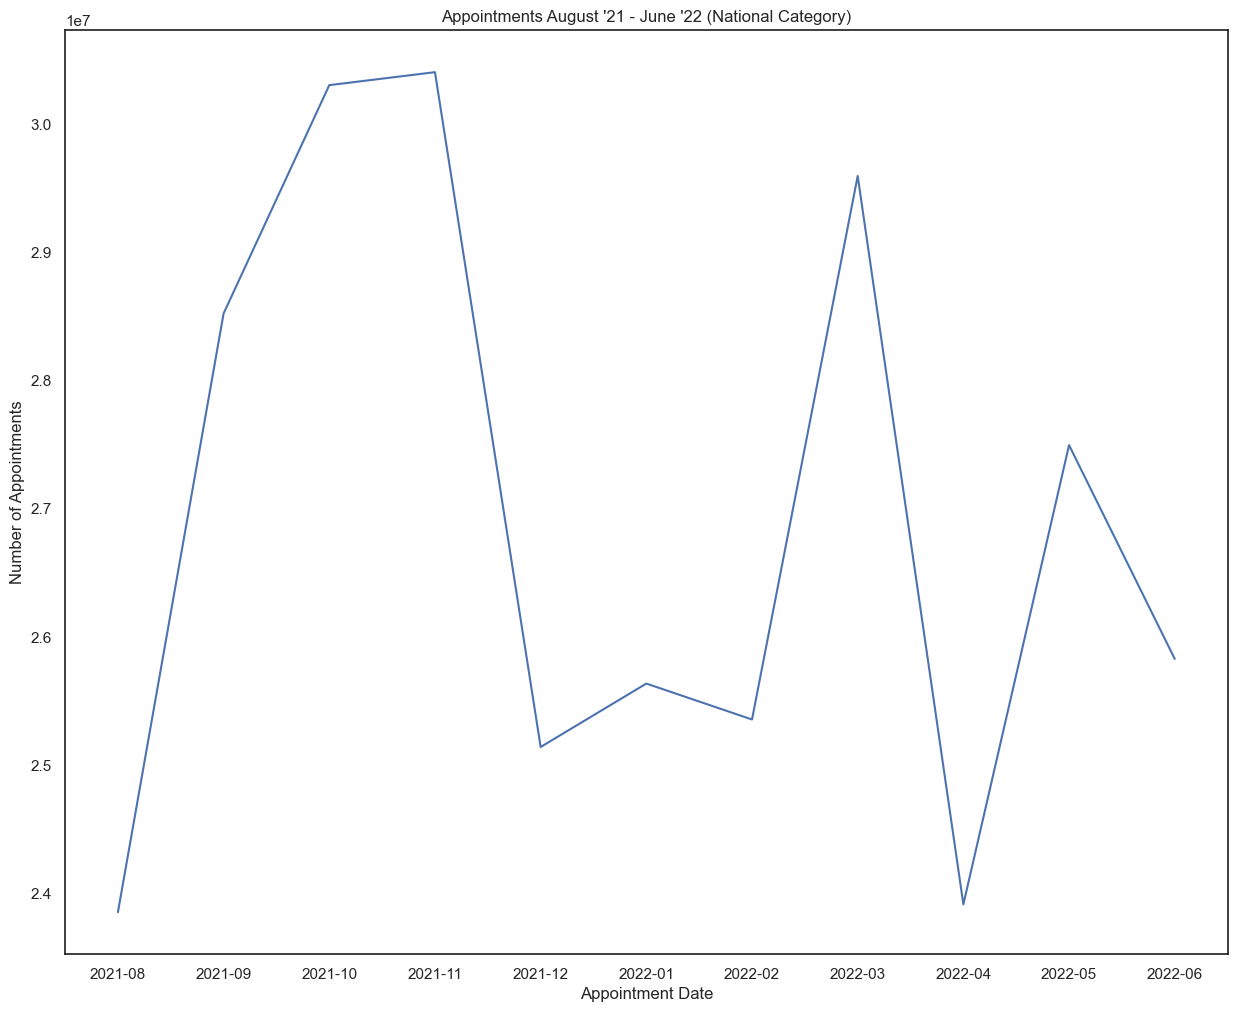

In [829]:
# Timeplot the aggregated nc data

# Present the data in a lineplot.
sns.lineplot(y ='count_of_appointments', x = 'appointment_month', data = nc_all_appointments_monthly)
plt.legend

plt.title ("Appointments August '21 - June '22 (National Category)")
plt.xlabel('Appointment Date')
plt.ylabel('Number of Appointments')

And here we see, that when the appointments are aggregated, there is a massive seaonal rise from September through to November, coinciding with Autumn. This is a time when people are starting to come inside again, with more touching of the same surfaces as each other, sharing germs. There's definitely another peak in march coinciding with the beginning of Spring, with another again at the end of that season, in May. Some viruses flourish with the rise in temperature, just as others flourish when the temperatur drops. Respiratory illnesses common to both Autumn and Spring, are of course a dangerous mix when compounded with that other respiratory illness, Covid 19.

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**I dispute these dates, and will use the Meteorolical Office's advice instead.** 

The UK governmental Meteorolical Office (Met Office) states on its website: 
>Summer
Summer is the season with the hottest temperatures and sunniest days. You may think it is also the driest season, and sometimes it is, but rainfall varies a lot in the summer months and can be when the UK sees a lot of flooding. **It starts in June in the UK and finishes at the end of August.**

>Autumn
**Autumn starts in September and finishes in November,** during which time the temperatures get cooler, the days get shorter and quite often the weather gets stormier.

>Winter
**Winter runs from December to February;** these are the coldest months of the year with the shortest days. There can be quite a big split in winter weather in the UK; most winters see the storminess of autumn continue with lots of wet and windy weather, in fact the UK often sees some of its strongest winds of the year during winter. Other winters are much colder and calmer with lots of fog, frost and even snow. Some winters have a mix of the two, particularly depending on where you live. People living in the south of the UK or nearer the coasts will likely have less cold winters than those in the north of the UK and away from the coasts.

>Spring
**Spring begins in March and ends in May** and can be one of the most easy to notice as it changes from winter - the days get longer and warmer. The weather in spring is often quite calm and dry, though there can be big differences in temperature between day and night as the ground hasn't had a chance to store up any heat from the Sun yet.    
    

https://www.metoffice.gov.uk/weather/learn-about/met-office-for-schools/other-content/other-resources/our-seasons

In [956]:
# Make a template dataframe that season's data can be drawn from.
season_settings = nc.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()
season_settings.head()

appointment_date            service_setting  count_of_appointments
0       2021-08-01  Extended Access Provision                    438
1       2021-08-01           General Practice                   3411
2       2021-08-01                      Other                    401
3       2021-08-01       Primary Care Network                    323
4       2021-08-01                   Unmapped                   1054

**Summer (August 2021):**

In [957]:
# Copy the August and June rows from the season_settings df into a new df. 
summer_settings = season_settings[(season_settings['appointment_date'].dt.month==6)|\
                                  (season_settings['appointment_date'].dt.month==8)]
summer_settings

appointment_date            service_setting  count_of_appointments
0          2021-08-01  Extended Access Provision                    438
1          2021-08-01           General Practice                   3411
2          2021-08-01                      Other                    401
3          2021-08-01       Primary Care Network                    323
4          2021-08-01                   Unmapped                   1054
...               ...                        ...                    ...
1665       2022-06-30  Extended Access Provision                   9163
1666       2022-06-30           General Practice                1124374
1667       2022-06-30                      Other                  23115
1668       2022-06-30       Primary Care Network                  34774
1669       2022-06-30                   Unmapped                  35320

[305 rows x 3 columns]

In [ ]:
# Pivot the summer dat, as this will be even more useful in future weeks. 
# TODO

In [958]:
# Extract the August data from the season_settings df. 
august_settings = season_settings[(season_settings['appointment_date'].dt.month==8)]
august_settings

appointment_date            service_setting  count_of_appointments
0         2021-08-01  Extended Access Provision                    438
1         2021-08-01           General Practice                   3411
2         2021-08-01                      Other                    401
3         2021-08-01       Primary Care Network                    323
4         2021-08-01                   Unmapped                   1054
..               ...                        ...                    ...
150       2021-08-31  Extended Access Provision                   8281
151       2021-08-31           General Practice                1125584
152       2021-08-31                      Other                  23181
153       2021-08-31       Primary Care Network                  21789
154       2021-08-31                   Unmapped                  62380

[155 rows x 3 columns]

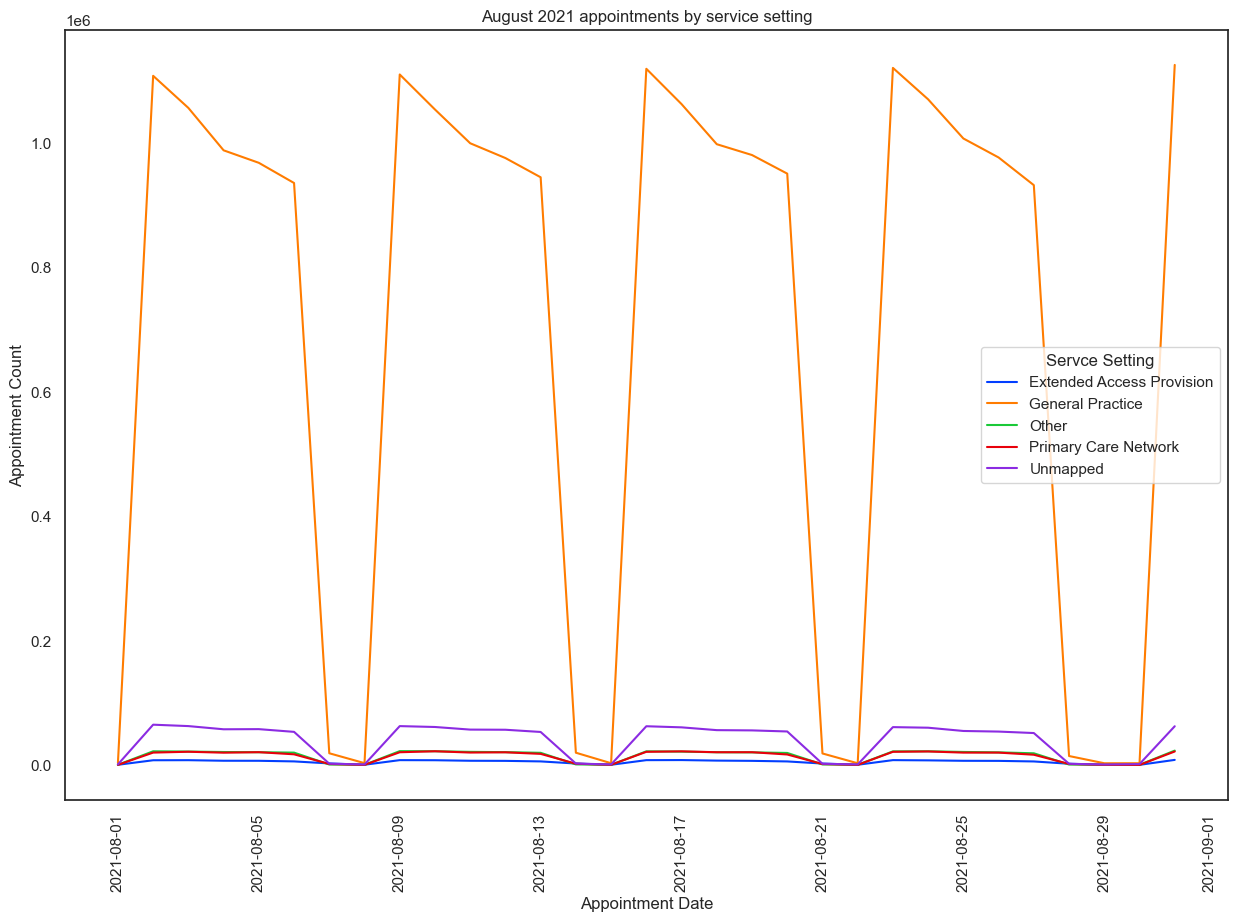

In [881]:
# Visualise the August data in a line plot. 
fig,ax = plt.subplots(figsize =(15,10))
sns.lineplot(y ='count_of_appointments', x = 'appointment_date', hue = 'service_setting',\
             palette = 'bright', data = august_settings)
plt.title ("August 2021 appointments by service setting")
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Count')
plt.xticks(rotation=90)
plt.legend(title = "Servce Setting")

The weekend cycles here are clearly articulated within weekly troughs at weekends. There are some relatively small numners of General Practice appointments happening on Saturday but seemingly none in the Primary Care Network, which is interesting when one of the benefits of scaling up the GP deliveries, could be to offer options that individual practices can't. Then again, maybe this shows that the opposite is the case - that GP practices have more agency and flexibilty. And / or maybe it also shows that in August 2021 the PCNs were still relatively young and hadn't drawn as many GPs in yet. 

Mondays are the busiest weekday, presumably because of the numebr of people who have a/bookd on Friday (who can't book the nest day (assuming ther are limits on Saturday services) and b/people who have booked on Sat or Sunday and c/people who have gotten sicker over the weekend because they haven't been able to see a doctor. Appointment numbers do not decline at a consistnt rate over the week, though: they decline quite sharply through to midweek, from which point they decline at a lower rate. These patterns are consistent across the month. 

The scale of the General Practice data is limiting here because the purpose of this exercise is to look at the data in more detail for this month. Let's scale the dataset and then regraph it. 

In [906]:
# Scale the dataset. 
august_settings['count_of_appointments_scaled'] = scaler.fit_transform(august_settings[['count_of_appointments']])
august_settings.head()

appointment_date            service_setting  count_of_appointments  \
0       2021-08-01  Extended Access Provision                    438   
1       2021-08-01           General Practice                   3411   
2       2021-08-01                      Other                    401   
3       2021-08-01       Primary Care Network                    323   
4       2021-08-01                   Unmapped                   1054   

   count_of_appointments_scaled  
0                     -0.444242  
1                     -0.435635  
2                     -0.444349  
3                     -0.444575  
4                     -0.442459

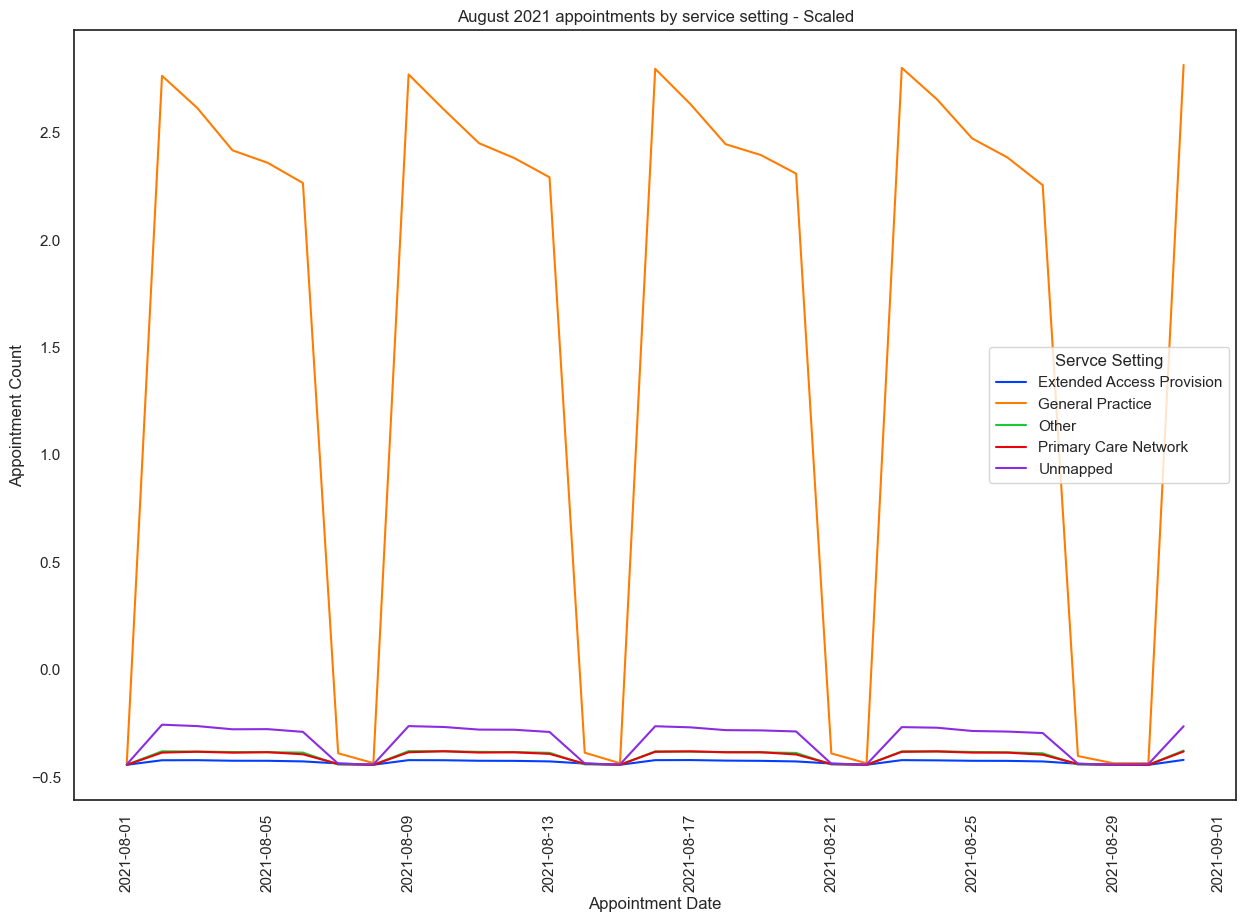

In [883]:
# Visualise the scaled Augustdata. 

# Visualise the August data in a line plot. 
fig,ax = plt.subplots(figsize =(15,10))
sns.lineplot(y ='count_of_appointments_scaled', x = 'appointment_date', hue = 'service_setting',\
             palette = 'bright', data = august_settings)
plt.title ("August 2021 appointments by service setting - Scaled")
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Count')
plt.xticks(rotation=90)
plt.legend(title = "Servce Setting")

No improvement re: detail in the visualisation, but it's good to have followed this process as it reassured the stakeholders (the analysis team in this case) that there isn't more to be discovered by this extra wrangling. 

**Autumn (October 2021):**

In [959]:
# Create a data frame for the Autumn season. 
october_settings = season_settings[(season_settings['appointment_date'].dt.month==10)]
october_settings.head()

appointment_date            service_setting  count_of_appointments
305       2021-10-01  Extended Access Provision                   7107
306       2021-10-01           General Practice                1130646
307       2021-10-01                      Other                  22639
308       2021-10-01       Primary Care Network                  22974
309       2021-10-01                   Unmapped                  56201

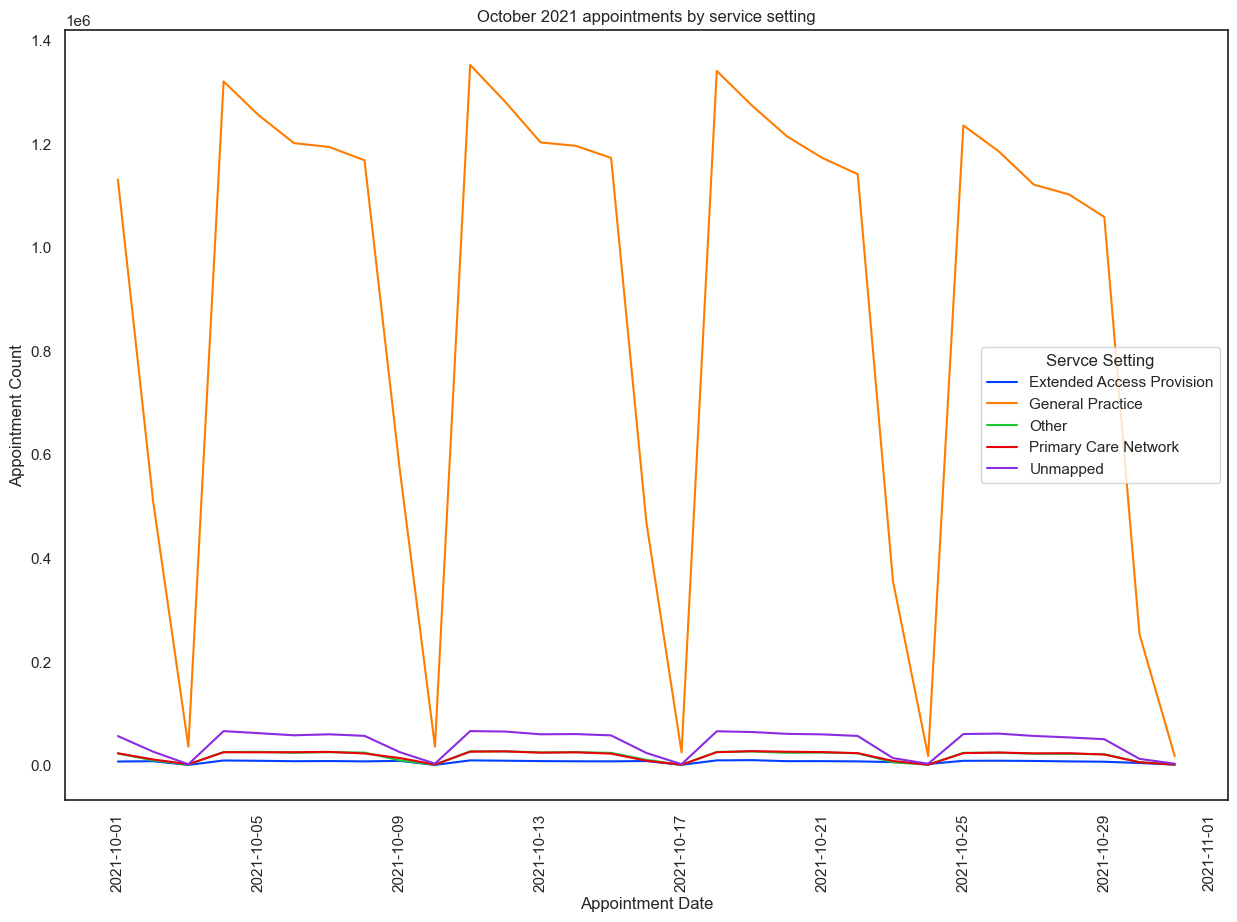

In [888]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
fig,ax = plt.subplots(figsize =(15,10))
sns.lineplot(y ='count_of_appointments', x = 'appointment_date', hue = 'service_setting',\
             palette = 'bright', data = october_settings)
plt.title ("October 2021 appointments by service setting")
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Count')
plt.xticks(rotation=90)
plt.legend(title = "Servce Setting")

The flare in the downward leg at the end of the General Practice week, shows there more Saturday appointments there than in the previous dataset. There is a lot more variety than in the Summer month case study above, in the declining counts from Monay through to Friday, each week, than there is in the Summer example also. 

The General Practice settings never quite reach zero this time. Perhaps they are opening on Sundays now to try to meet the increased need. This need is seen in the increased appointment counts here compared to the summer months, with GP settings appointments for the whole network generally reaching above 1.3 million appointments a day in this period, as opposed to the approcimately 1.1 million peaks of the Monday counts in Summer (above). 

The exception here is the last Monday of the month, which is closer to 1.2 million, and indicated the levelling down then, well into the secnd half of the Autumn season, when counts begin to decline again after the change-of-season illnesses have passed. 

**Winter (January 2022):**

In [989]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
january_settings = season_settings[(season_settings['appointment_date'].dt.month==1)]
january_settings.head()

appointment_date            service_setting  count_of_appointments
765       2022-01-01  Extended Access Provision                    246
766       2022-01-01           General Practice                   3578
767       2022-01-01                      Other                    280
768       2022-01-01       Primary Care Network                    215
769       2022-01-01                   Unmapped                    572

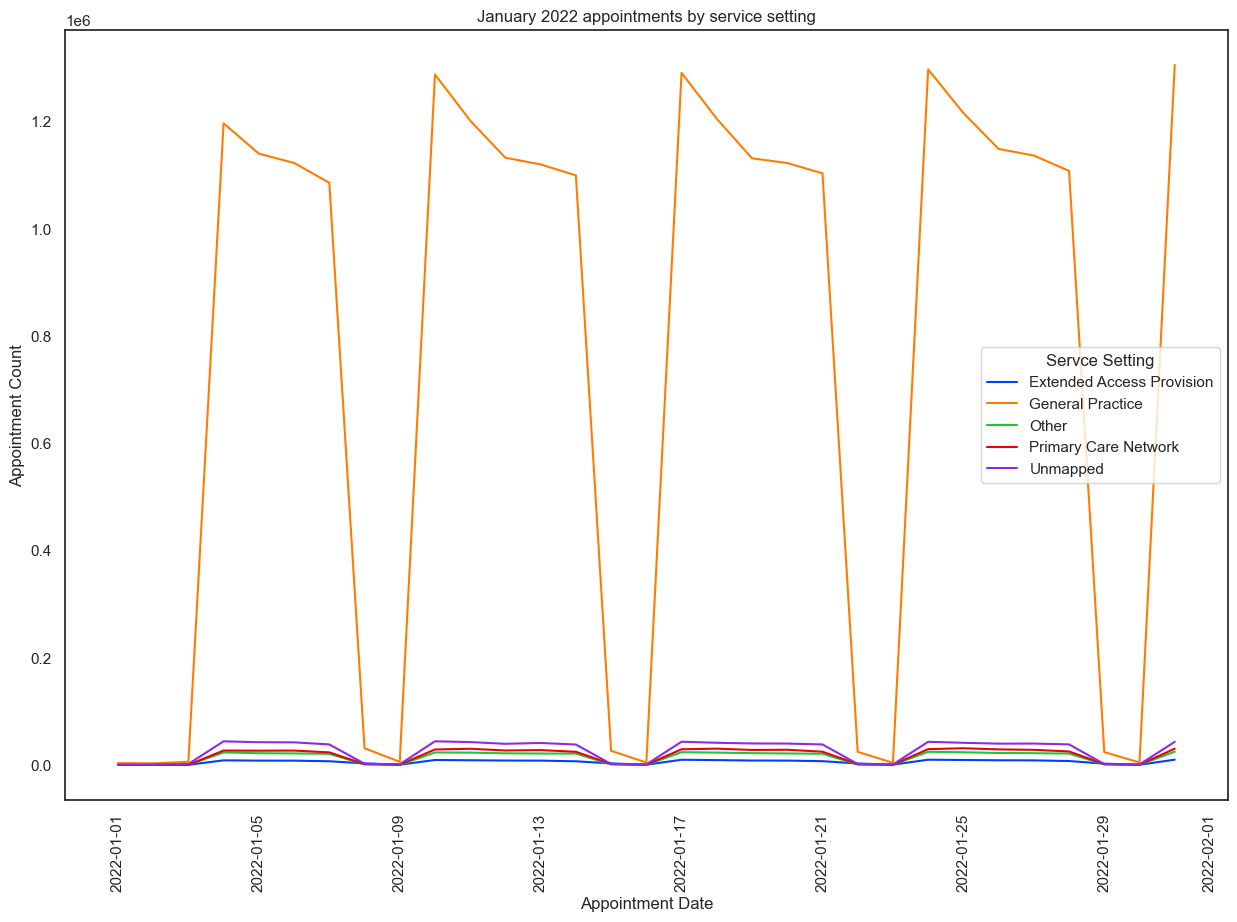

In [894]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
fig,ax = plt.subplots(figsize =(15,10))
sns.lineplot(y ='count_of_appointments', x = 'appointment_date', hue = 'service_setting',\
             palette = 'bright', data =january_settings)
plt.title ("January 2022 appointments by service setting")
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Count')
plt.xticks(rotation=90)
plt.legend(title = "Servce Setting")

The GP counts are still very high and rising again over the course of the month. More people have been inside for longer, sharing bugs on contaminated surfaces, and there are more sneezes and sniffles on the tube, etc. The more granular rate of decline that is the Monday-Friday cycle has a relatively pronounced division into Mon- Wed and Wed - Friday. Generally this, as in all the months we are seing it is due to a backlog of appointments to get to, which have accumulated by Monday, and have been worked through by Wednesday. Again, we see limited Saturday appointments, and a return to closure on Sundays. We can't see how these are being offered, in this data, but we can come back to this later, when we look at appointment modes. The assumption would be that these and all weeekend appointments are happening remotely, but we can check that assumption further into our exploration and analysis. 

**Spring (April 2022):**

In [1028]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
april_settings = season_settings[(season_settings['appointment_date'].dt.month==4)]
april_settings.head()

appointment_date            service_setting  count_of_appointments
1215       2022-04-01  Extended Access Provision                   8011
1216       2022-04-01           General Practice                1085037
1217       2022-04-01                      Other                  21077
1218       2022-04-01       Primary Care Network                  26493
1219       2022-04-01                   Unmapped                  36836

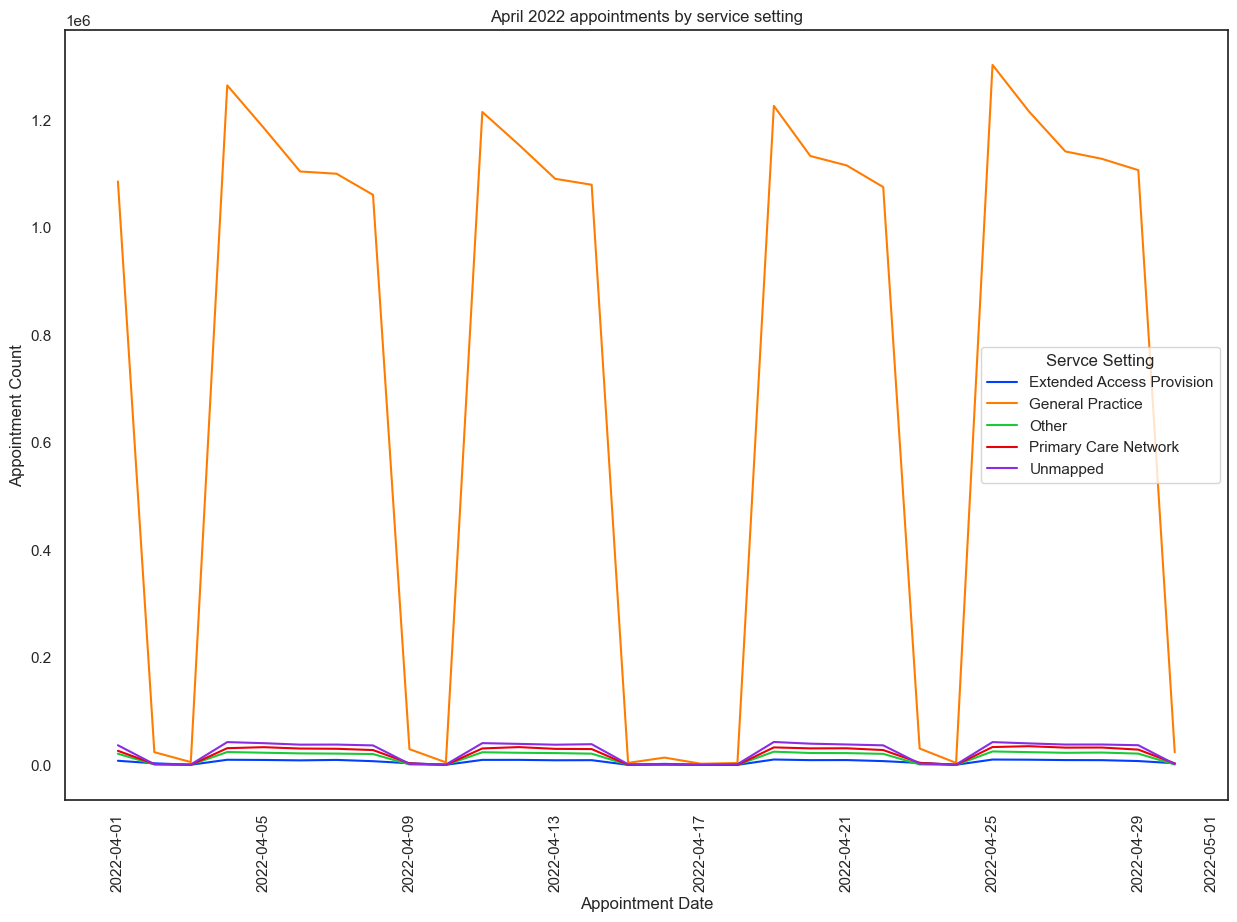

In [896]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
fig,ax = plt.subplots(figsize =(15,10))
sns.lineplot(y ='count_of_appointments', x = 'appointment_date', hue = 'service_setting',\
             palette = 'bright', data = april_settings)
plt.title ("April 2022 appointments by service setting")
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Count')
plt.xticks(rotation=90)
plt.legend(title = "Servce Setting")

Here there are two weekly datashapes are really unusual. We see on case of a long weekeng over Easter, with Friday 15 and Monday 18 both being public holidays. Perhaps strangely the Monday peak after this long weekend is not particularly pronounced, suggesting that perhaps the weekend of closed pubs, restaurants, libraries, and reduced public transport, as well as time away from work, has resulted in fewer bugs spreading, not to mention that people are likely, generally, getting more rest. 

It would be good at this point to be able to compare the trends for each season's month, in one plot. Of course the scale of the GP aapointments may obscure the detail of the settings with smaller counts but it is the GP data that we most interested in at this stage, while these represent so many of the appointments across the network.

As the PCN counts increase over time (with more GP practices joining these), the PCN graph will become more significant. Will looking at PCN graphs relative to GP graphs help prepare the NHS for resourcing the network in the future? 

In [1090]:
january_settings_copy = january_settings
april_settings_copy = april_settings
august_settings_copy = august_settings
october_settings_copy = october_settings

In [1091]:
# Create a new df which from the GP rows of each month's df.

#Vivaldify the four dfs.
four_seasons = [january_settings_copy, april_settings_copy, august_settings_copy, october_settings_copy]

# Create an empty df.
gps_seasons_df = pd.DataFrame()

# Loop through each df in the list.
for df in four_seasons:
    gp_rows = df[df['service_setting']=='General Practice']
    # Append the GP rows to the new dataframe 
    gps_seasons_df = gps_seasons_df.append(gp_rows)
gps_seasons_df = gps_seasons_df.reset_index(drop = True)

In [1092]:
# View the df.
gps_seasons_df

level_0  index appointment_date   service_setting  count_of_appointments  \
0        1.0    766       2022-01-01  General Practice                   3578   
1        6.0    771       2022-01-02  General Practice                   3118   
2       11.0    776       2022-01-03  General Practice                   6079   
3       16.0    781       2022-01-04  General Practice                1196264   
4       21.0    786       2022-01-05  General Practice                1139640   
..       ...    ...              ...               ...                    ...   
118      NaN    436       2021-10-27  General Practice                1120900   
119      NaN    441       2021-10-28  General Practice                1101970   
120      NaN    446       2021-10-29  General Practice                1058523   
121      NaN    451       2021-10-30  General Practice                 252806   
122      NaN    456       2021-10-31  General Practice                  17449   

    day_of_week month_name  
0      Saturday    January  
1        Sunday    January  
2        Monday    January  
3       Tuesday    January  
4     Wednesday    January  
..          ...        ...  
118   Wednesday    October  
119    Thursday    October  
120      Friday    October  
121    Saturday    October  
122      Sunday    October  

[123 rows x 7 columns]

In [1093]:
# Make a new column which is just the day of the month. 
gps_seasons_df['day_of_month'] = gps_seasons_df['appointment_date'].dt.day

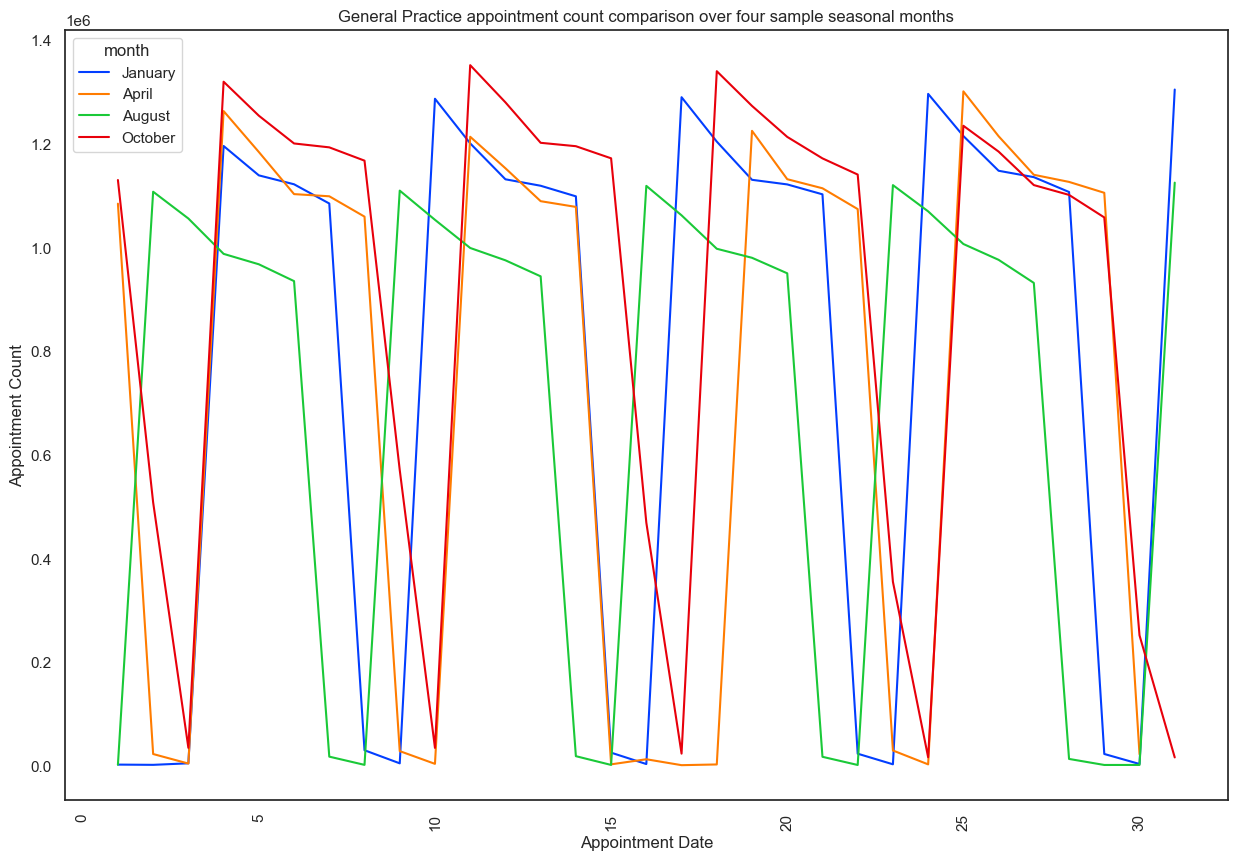

In [1094]:
# Show the Gen Practice data in a timeplot.
# Create a lineplot.
fig,ax = plt.subplots(figsize =(15,10))
sns.lineplot(y ='count_of_appointments', x = 'day_of_month', hue = 'month_name',\
             palette = 'bright', data = gps_seasons_df)
plt.title ("General Practice appointment count comparison over four sample seasonal months")
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Count')
plt.xticks(rotation=90)
plt.legend(title = "month")

We can clearly see now the seasonal variations in the General Practice appointments. Let's take a look at the PCN data. Keeping in mind that some of the shifts are related to transition into the PCNs.

In [1102]:
# Create a new df which from the EAP rows of each month's df.

# Create an empty df.
EAP_seasons_df = pd.DataFrame()

# Loop through each df in the list.
for df in four_seasons:
    EAP_rows = df[df['service_setting']=='Extended Access Provision']
    # Append the EAP rows to the new dataframe 
    EAP_seasons_df = EAP_seasons_df.append(EAP_rows)
EAP_seasons_df = EAP_seasons_df.reset_index(drop = True)

In [1103]:
EAP_seasons_df['day_of_month'] = EAP_seasons_df['appointment_date'].dt.day

In [1104]:
EAP_seasons_df

level_0  index appointment_date            service_setting  \
0        0.0    765       2022-01-01  Extended Access Provision   
1        5.0    770       2022-01-02  Extended Access Provision   
2       10.0    775       2022-01-03  Extended Access Provision   
3       15.0    780       2022-01-04  Extended Access Provision   
4       20.0    785       2022-01-05  Extended Access Provision   
..       ...    ...              ...                        ...   
118      NaN    435       2021-10-27  Extended Access Provision   
119      NaN    440       2021-10-28  Extended Access Provision   
120      NaN    445       2021-10-29  Extended Access Provision   
121      NaN    450       2021-10-30  Extended Access Provision   
122      NaN    455       2021-10-31  Extended Access Provision   

     count_of_appointments day_of_week month_name  day_of_month  
0                      246    Saturday    January             1  
1                      403      Sunday    January             2  
2                      397      Monday    January             3  
3                     8769     Tuesday    January             4  
4                     8222   Wednesday    January             5  
..                     ...         ...        ...           ...  
118                   8198   Wednesday    October            27  
119                   7327    Thursday    October            28  
120                   6694      Friday    October            29  
121                   4236    Saturday    October            30  
122                   1113      Sunday    October            31  

[123 rows x 8 columns]

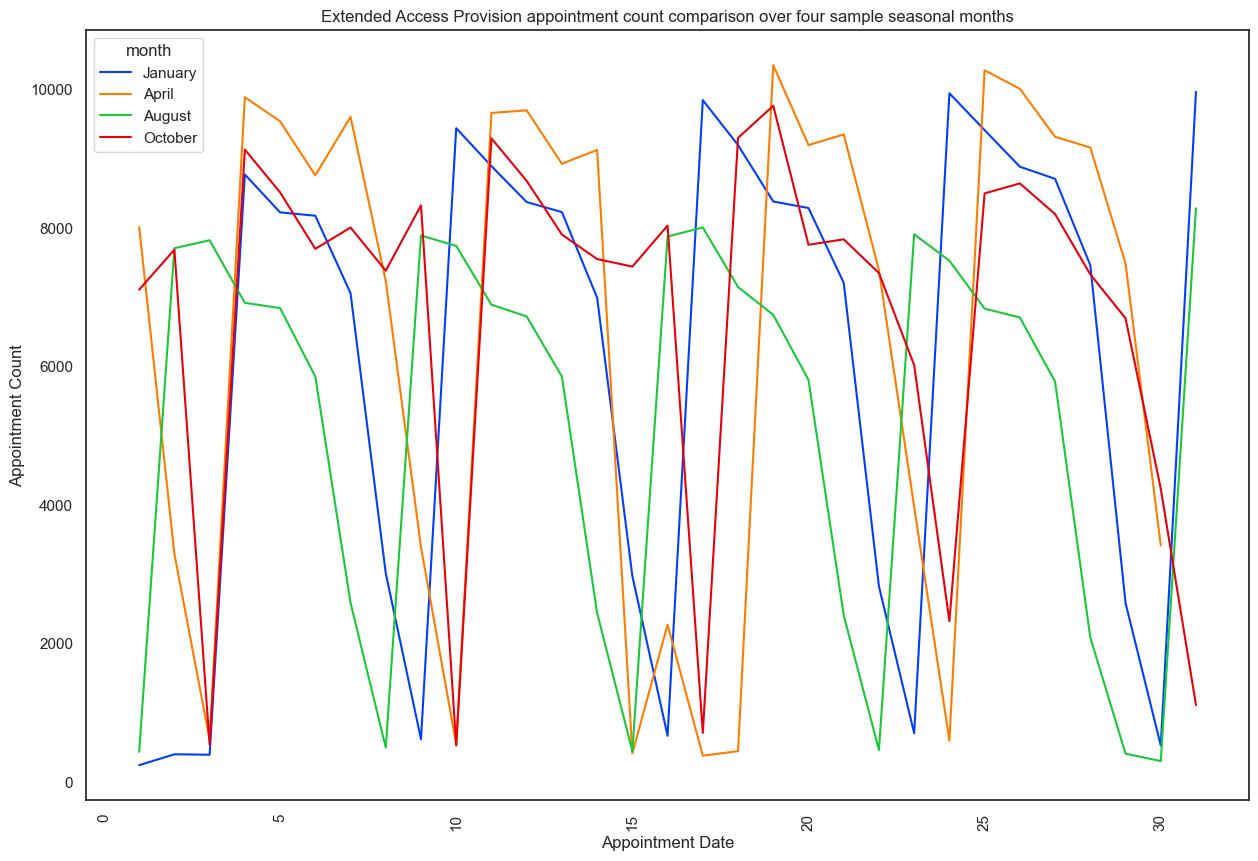

In [1105]:
# Show the EAP data in a timeplot
# Create a lineplot.
fig,ax = plt.subplots(figsize =(15,10))
sns.lineplot(y ='count_of_appointments', x = 'day_of_month', hue = 'month_name',\
             palette = 'bright', data = EAP_seasons_df)
plt.title ("Extended Access Provision appointment count comparison over four sample seasonal months")
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Count')
plt.xticks(rotation=90)
plt.legend(title = "month")

There is much less predictability in the shape of the weekday counts. The count numbers are smaller here, which may account for this. What is predictable is that the Mondays are the busiest days. In In January (Winter) and August (Summer), the counts tail down towards the weekend. But in our sickest seasons, represented by April (Spring) and October (Autumn) there can often be another albeit smaller peak at the end of the week.  

In [1107]:
# Create a new df which from the PCN rows of each month's df.

# Create an empty df.
PCN_seasons_df = pd.DataFrame()

# Loop through each df in the list.
for df in four_seasons:
    PCN_rows = df[df['service_setting']=='Primary Care Network']
    # Append the PCN rows to the new dataframe 
    PCN_seasons_df = PCN_seasons_df.append(PCN_rows)
PCN_seasons_df = PCN_seasons_df.reset_index(drop = True)

In [1110]:
PCN_seasons_df['day_of_month'] = PCN_seasons_df['appointment_date'].dt.day

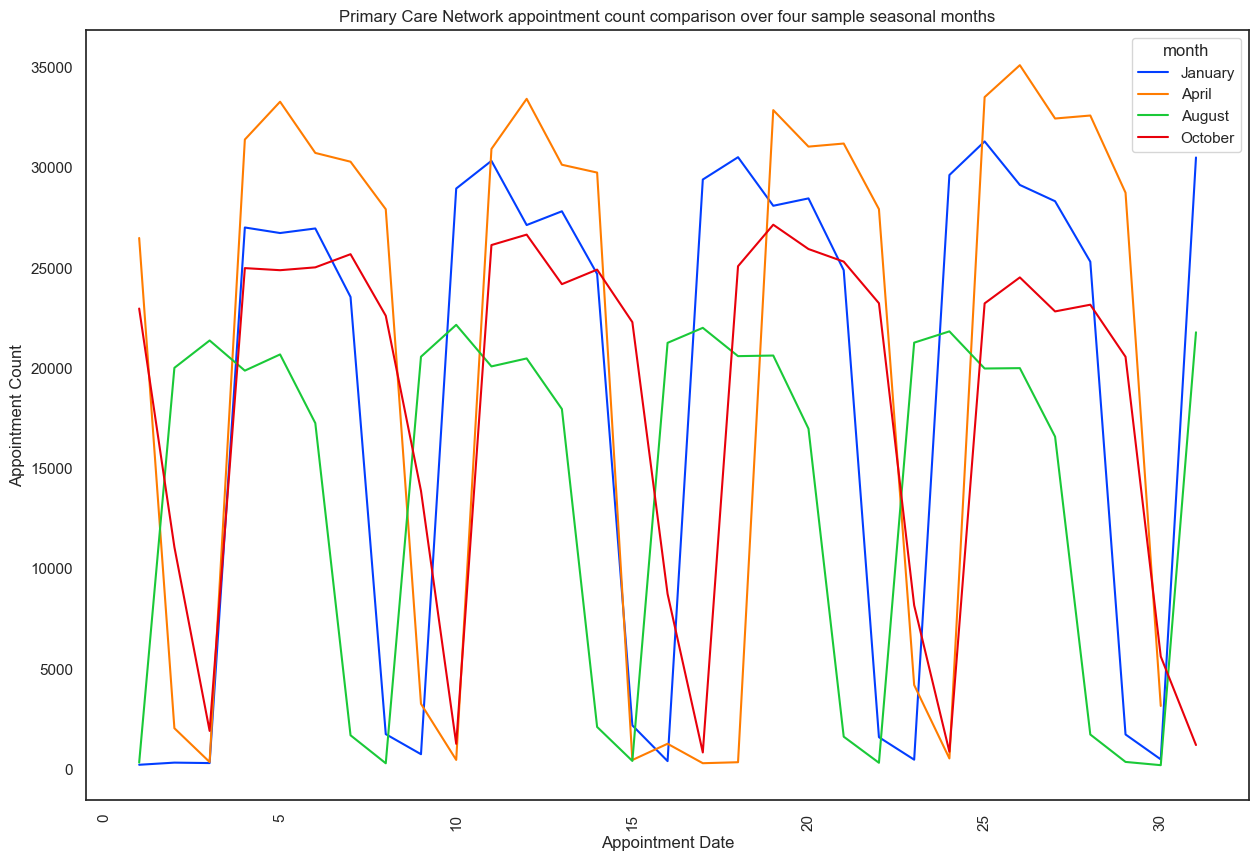

In [1111]:
# Show the PCN data in a timeplot
# Create a lineplot.
fig,ax = plt.subplots(figsize =(15,10))
sns.lineplot(y ='count_of_appointments', x = 'day_of_month', hue = 'month_name',\
             palette = 'bright', data = PCN_seasons_df)
plt.title ("Primary Care Network appointment count comparison over four sample seasonal months")
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Count')
plt.xticks(rotation=90)
plt.legend(title = "month")

Keeping in mind that the PCN data represents a group that is in transition. Also because of that these are much smaller counts so the reliability of them as indicators of larger population patterns (extrapolating into the future when the PCNs are more numerous and possibly bigger), is doubly caution-laden. However, we can see here that the Monday peaks are not as exaggerated as in other settings, and in fact it's generally the Tuesdays and to a lesser degree the Thursdays that have the peeks. Wednesdays and Fridays always show a dip in appointment counts compared to the previous days.

If the peaks are less extreme on Mondays and this continues as the PCNs establish, that may have desirable outcomes in terms of managinf staffing, and keeping people well. 

The April data has an anomy because of Easter long weekend. 

In [1112]:
# Create a new df which from the Other rows of each month's df.

# Create an empty df.
Other_seasons_df = pd.DataFrame()

# Loop through each df in the list.
for df in four_seasons:
    Other_rows = df[df['service_setting']=='Other']
    # Append the Other rows to the new dataframe 
    Other_seasons_df = Other_seasons_df.append(Other_rows)
Other_seasons_df = Other_seasons_df.reset_index(drop = True)

In [1113]:
Other_seasons_df['day_of_month'] = Other_seasons_df['appointment_date'].dt.day

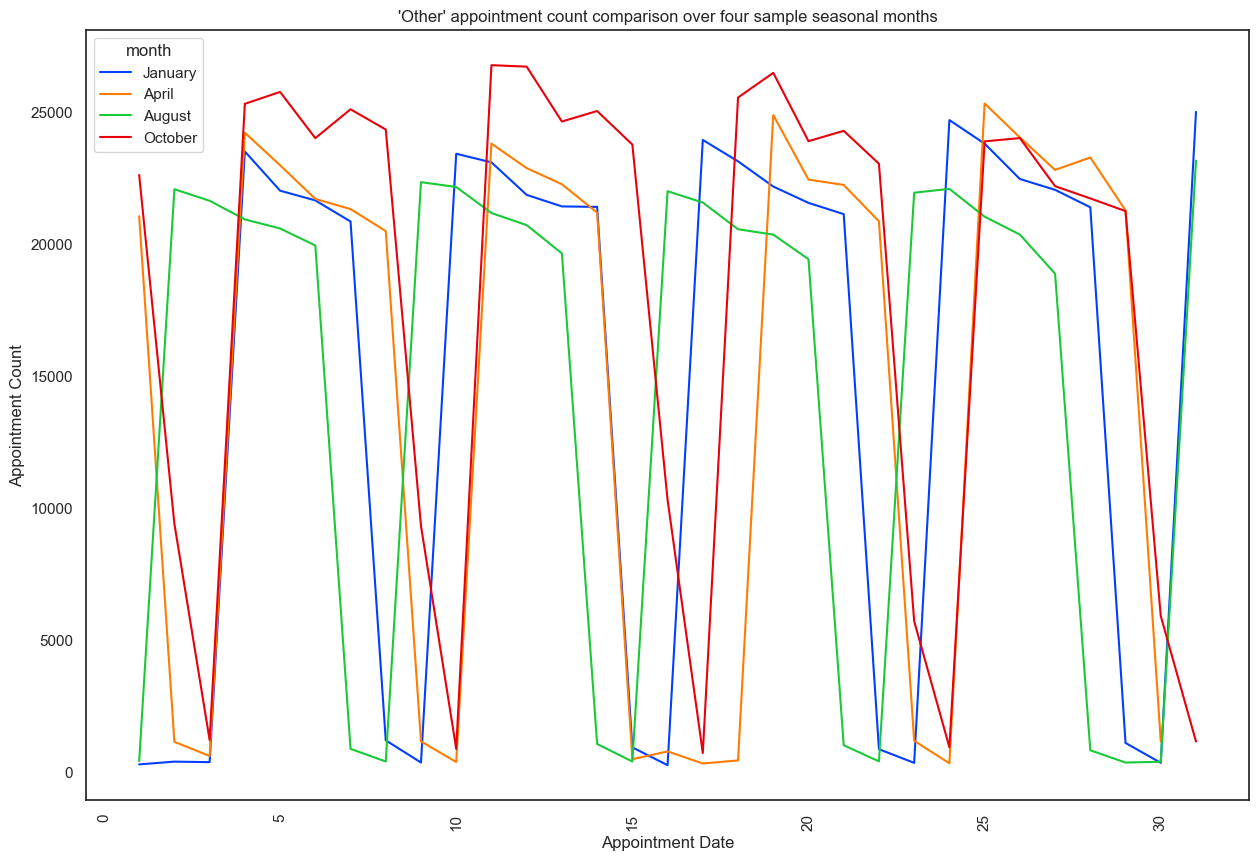

In [1114]:
# Show the PCN data in a timeplot
# Create a lineplot.
fig,ax = plt.subplots(figsize =(15,10))
sns.lineplot(y ='count_of_appointments', x = 'day_of_month', hue = 'month_name',\
             palette = 'bright', data = Other_seasons_df)
plt.title ("'Other' appointment count comparison over four sample seasonal months")
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Count')
plt.xticks(rotation=90)
plt.legend(title = "month")

There is less seasonal variation in appointment counts for the 'Other' settings compared to others.

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [381]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [382]:
# Load the data set.
twitter = pd.read_csv("tweets.csv")

# View the DataFrame.
print(twitter.shape)
print(twitter.columns)
print(twitter.dtypes)
twitter.head()

(1174, 10)
Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object


tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

In [ ]:
# Explore the metadata.


In [1144]:
# Explore the data set.
twitter.describe()

tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000

The retweets, with higher mean, and max, are going to be the best way to indicate to the NHS what people's concerns are. This is not to say that favourited tweets aren't important. But as well as being a much less lively subset, my guess (to be tested with exploration below) is that that subset sometimes represents sentiment towards the person tweeting, more than the content of the tweet itself.

In [ ]:
# Explore the data set.
# Sort by retweet counts and favourites.

In [1136]:
# Group by hashtags and retweets counts.
twitter_tags_retweeted = twitter.groupby(['tweet_entities_hashtags'])['tweet_retweet_count'].sum().reset_index()
twitter_tags_retweeted

tweet_entities_hashtags  \
0                                                                                                                                                            #340B, #healthcare   
1                                                                                                              #ACA, #Economics, #HealthCare, #SharedFacts, #CollectiveBehavior   
2                                                                                                                                                             #ACA, #healthcare   
3                                                                                                                                              #ACO, #FutureofWork, #healthcare   
4                                                                                                                                                #AFFCF, #scholars, #healthcare   
..                                                                                                                                                                          ...   
705  #workerscomp, #workerscompensation, #insurance, #commercialinsurance, #workerscomp411, #wedneday, #broker, #homehealth, #homecare, #healthcare, #hospice, #business, #osha   
706                                                                                                                                #workforce, #healthcareindustry, #healthcare   
707                                                                                                                       #workforce, #workforcehealth, #healthcare, #hospitals   
708                                                                                                                                                          #worldpharmacyweek   
709                                                                                                                                                                     #Örebro   

     tweet_retweet_count  
0                      7  
1                      0  
2                      0  
3                      0  
4                      0  
..                   ...  
705                    0  
706                    0  
707                    0  
708                    1  
709                    6  

[710 rows x 2 columns]

I chose this approach because the hashtags are what the NHS wants to know about.

In [1156]:
# List the unique hashtag column entries that have higher retweet counts.
top_hashtags = twitter_tags_retweeted.loc[twitter_tags_retweeted['tweet_retweet_count']>20]
hashtags = top_hashtags['tweet_entities_hashtags'].unique()           

# Output the list.
hashtags                                           

array(['#AI', '#AI, #Robotics, #Healthcare, #PwC, #4IR, #IoT',
       '#AI, #healthcare, #Python, #Nodejs, #MachineLearning, #100daysofmlcode, #HTML5, #RStats',
       '#Antiracist, #Healthcare',
       '#Applications, #AI, #healthcare, #digitalhealth, #Healthtech, #Health, #DataScience, #Bigdata',
       '#GlobalAussieAwards', '#HealthCare', '#Healthcare',
       '#Healthcare, #DigitalTransformation, #digitalhealth, #AI, #Python',
       '#HospitalsTalkToLovedOnes, #education', '#NEW',
       '#NEW, #coronavirusvaccines',
       '#Robotic, #MI, #Robotics, #Tech, #Technology, #Healthcare',
       '#Security, #healthcare, #centralized',
       '#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical',
       '#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed',
       '#WomenInMedicine, #Healthcare',
       '#WomenInMedicine, #SheLeadsHealthcare',
       '#comedy, #adulting, #healthcare', '#data, #healthcare',
       '#healthcare', '#he

I chose this approach because not all of the hashtags are medical or health related. So I wanted to have a longer list than I will end up with eventually. So I have room to weed some out. It's interesting though to see what other popular tweets there are in the list. Of the items that are being retweeted at similar rates to health-related tweets, are technology related hashtags such as data, nd robotic. Furthermore, this approach also captures that there are specific aspects of bodily health that are more commonly tweeted about: respiratory and pulmonary care, for example. Another reason is that we may choose to tease out some of these dense hashtag tweets into their hashtag components and recount eg '#healthcare, #health' may not stay as one individual tweet entity, but may be counted as 'health' and 'healthcare' separately. Then there is the fact that there are many different versions here which are essentially the same hashtag, eg HealthCare and Healthcare. And finally, there isn't a lot of difference between the number of retweeted hashtags that are retweeted 10 or 20 times. Sometimes it is important to see how the hashtags are grouped, but added up, these reasons are ample to justify the approach of filtering more hashtags than we will originally end up with. 

**Would it be useful to only look at retweeted and favourite tweet messages? Explain your answer.**

Retweets. Favourited tweets may rise higher in an algorythm, in terms of what people are more likely to see on their feed, than a tweet that isn't favourited. However, retweeting is a process that captures the popularity of a tweet, and spreads it. Much a like a virus in Autumn or Spring. The memetic dynamic of sharing and resharing charts more aptly the conversational-like nature of retweeting, as opposed to simly favouriting. Tied to this, because of the viral-like sharing, retweeting is also more dynamic in terms of the maximum number of the exponential rate at which retweeting occurs - the more it happens, the more it happens. 

I was going to look at converting the hashtags to lower case next, but I don't think that's an effecive use of time. Can filter out repeats (or re-aggrate them) later in the process if necessary. And can use 'islike' if necessary.

Please note that although here I've spoken about the hashtags, we are referring throughout to the texts. 

In [1146]:
# Group by hashtags and favourites counts.
twitter_tags_favourites = twitter.groupby(['tweet_entities_hashtags'])['tweet_favorite_count'].sum().reset_index()
favorites = twitter_tags_favourites

tweet_entities_hashtags  \
0                                                                                                                                                            #340B, #healthcare   
1                                                                                                              #ACA, #Economics, #HealthCare, #SharedFacts, #CollectiveBehavior   
2                                                                                                                                                             #ACA, #healthcare   
3                                                                                                                                              #ACO, #FutureofWork, #healthcare   
4                                                                                                                                                #AFFCF, #scholars, #healthcare   
..                                                                                                                                                                          ...   
705  #workerscomp, #workerscompensation, #insurance, #commercialinsurance, #workerscomp411, #wedneday, #broker, #homehealth, #homecare, #healthcare, #hospice, #business, #osha   
706                                                                                                                                #workforce, #healthcareindustry, #healthcare   
707                                                                                                                       #workforce, #workforcehealth, #healthcare, #hospitals   
708                                                                                                                                                          #worldpharmacyweek   
709                                                                                                                                                                     #Örebro   

     tweet_favorite_count  
0                       0  
1                       1  
2                       0  
3                       0  
4                       0  
..                    ...  
705                     0  
706                     0  
707                     0  
708                     0  
709                     0  

[710 rows x 2 columns]

In [1155]:
# List the unique hashtag column entries that have high favourite counts. 
favorite_hashtags = twitter_tags_favourites.loc[twitter_tags_favourites['tweet_favorite_count'] >5]
favourites = favorite_hashtags['tweet_entities_hashtags'].unique()           

# Output the list.
favourites         

array(['#ConV2X, #blockchain, #DLT, #healthcare, #innovation',
       '#HealthCare', '#Healthcare',
       '#PanchoMedranoLegislativeSummit, #MentalHealth, #Healthcare, #TAMACC, #txlege',
       '#ProtectWomen, #healthcare, #immigrants, #Maine, #resist, #mepolitics, #MEGov, #VoteBlue2022',
       '#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid',
       '#WomenInMedicine, #Healthcare, #WIMMonth, #MedTwitter',
       '#WomenInMedicine, #SheLeadsHealthcare, #InvestInHer, #InvestInHer, #healthcare, #leadership, #racialequity, #genderequity, #MedTwitter, #HeForShe',
       '#comedy, #adulting, #healthcare', '#healthcare',
       '#healthcare, #cdnpoli',
       '#heartfailure, #Barostim, #OutsmartTheHeart, #cardiology, #healthcare, #medtech, #innovation',
       '#medtech, #healthcare, #MedtechVision22'], dtype=object)

This is interesting. This list feels different. It has components that speak to equity and inclusion, which is a really important consideration for the NHS, according to their own ICB websites, and according to external groups like the British Medical Council, who state that workplace environments are an issue and that improving them is a key to retaining staff. I've been happily proven wrnog in my hypothesis about favourited v retweeted hashtags / tweets. 

There is an important field of data sceince called sentiment analysis. It could be argued that this list of text reflects more of a sentiment analysis approach to the dataset. This might be important at a time when, as IPSOS says, the public sentiment to the NHS is at a long term low. People are loyal to the NHS, and to staff, but the long wait times mean epoepl have longer to feel uncared for, and to tweet about it (and talk about it, and grumble about it). Once people have seen a doctor they are, according to IPSOS, generally very happy with the service. 

Perhaps patients could be encouraged to tweet when leaving the doctors, with signs and posters and reminders visible on their way out / in the doctors' rooms. 

I guess that means that overall I want to present both counts to the NHS with a some contextual unpacking of the nuances, to help them interpret what the data offers from each. IF the team decides to just one approach of the two, then as a junior data analyst I'm happy to defer to them. 

In [1159]:
twitter.head()

tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

### Retweets

I'm not sure what this exercise is asking me to do. To help clarify the expectatin, I have looked at the end product that is the goal (ie visualising a barplot of the 10 most popular retweets (or favourites as the case may be). AndI have looked at the request mde by the NHS, which is to look at the top trending hashtags on twitter (re healthcare in the uk). It's more nuanced than it appears at first. Here's whay: 
- the workflow below is quite a specifc  way to achieve the goal, but even then there are steps which are open to interpretation: display the first thirty records (full text) or the first 30 records (hashtags).
- yes the NHS has asked for hashtags, but the hashtags are tweeted, retweeted and favourtied in a context. That context includes: the full text, and how the hashtags are used in combination with others. For example #Healthcare #Broken is a a very different message, from #Healthcare#Heroes, but they both contain # Healthcare. 
- the NHS is especially interested in resourcing the network properly, as is evident in the context of all their quetions.
A nuanced appraoch makes better sense - let's count the top 30 hashtags as we've been asked to, and plot them. Let's also consider the different ways that those hashtags and their tweets are configured. 

In [1187]:
# Create a new DataFrame containing only the text.
texts_retweeted = twitter.groupby(['tweet_full_text'])['tweet_retweet_count'].sum().reset_index()
texts_retweeted = texts_retweeted.sort_values('tweet_retweet_count', ascending = False).reset_index()
# View the DataFrame.
texts_retweeted

index  \
0      695   
1      721   
2      525   
3      671   
4      458   
..     ...   
956    216   
957    217   
958    218   
959    219   
960      0   

                                                                                                                                                                                             tweet_full_text  \
0                                                               RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…   
1                                                               RT @ricochet_en: Health care in Canada is collapsing. “We’re beyond the worst-case scenario.” Now, provincial governments are pushing priva…   
2                                                           RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…   
3                                                               RT @healthcare_NFT_: Really excited to be working with @TheGivingBlock on what is proving to be a historic campaign. #HealthCare Heroes are…   
4                                                             RT @CURE_Ecosystem: EXCLUSIVE footage. Just for our supporters. Who wants a first look at the Car? 👀 VROOM. NASCAR.. here we come!!\n\n#RACE4…   
..                                                                                                                                                                                                       ...   
956  Enrolling in #Medicaid and CHIP may be easier with new rules proposed by the Biden administration. The proposed rules will ensure that everyone will have access to #healthcare 🏥 by removing obstac...   
957  Ensuring women have access to comprehensive repro #healthcare allows them to control their lives. We applaud congressional healthcare leaders for pushing for equitable access to #birthcontrol thro...   
958  Esvyda boost the remote care landscape by increasing clinical providers’ efficiency and revenue rates; and help patients to overcome technological barriers and achieve better health outcomes. #Hea...   
959  Excelent day at #APSF2022 Stoelting Conference. \nDiscussions on structure, patient selection, patient risk, patient education, teamwork and wellbeing. #APSF #PatientCare #healthcare https://t.co/...   
960        "Did you run after it?" "Are you one of the innocents or did you run after it?" https://t.co/EdDO782Y96\n#HIV #AIDS #Cancer #Stigma #Healthcare #Pharmaceutical #Politics https://t.co/0xADeVcy9g   

     tweet_retweet_count  
0                   3117  
1                    801  
2                    600  
3                    365  
4                    315  
..                   ...  
956                    0  
957                    0  
958                    0  
959                    0  
960                    0  

[961 rows x 3 columns]

In [1321]:
texts_retweeted.describe()

index  tweet_retweet_count
count  961.000000           961.000000
mean   480.000000            10.542144
std    277.561104           109.364331
min      0.000000             0.000000
25%    240.000000             0.000000
50%    480.000000             0.000000
75%    720.000000             1.000000
max    960.000000          3117.000000

In [1198]:
# Loop through the messages, and create a dictionary of values containing the # symbol, as keys, and their retweet 
#    count as the value. 
hashtag_tweets = {value: texts_retweeted.loc[texts_retweeted['tweet_full_text'] == value,\
                                             'tweet_retweet_count'].iloc[0] for value in texts_retweeted\
                                            ['tweet_full_text'] if '#' in str(value)}

In [1200]:
# Convert the dictionary to a list of tuples to display the first 30 records.
top_30 = list(hashtag_tweets.items())[:30]
top_30 

[('RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…',
  600),
 ('RT @healthcare_NFT_: Really excited to be working with @TheGivingBlock on what is proving to be a historic campaign. #HealthCare Heroes are…',
  365),
 ('RT @CURE_Ecosystem: EXCLUSIVE footage. Just for our supporters. Who wants a first look at the Car? 👀 VROOM. NASCAR.. here we come!!\n\n#RACE4…',
  315),
 ('RT @JeffWaltersSask: A good read on what nurses are going through as our HC system in #saskatchewan crumbles. Time for the @PremierScottMoe…',
  257),
 ('RT @SoniaFurstenau: Germany has one of the top ranked #healthcare systems in the world, while Canada’s is teetering. We both dedicate simil…',
  255),
 ('RT @healthcare_NFT_: The #HealthCare Heroes journey continues. Join the Discord to learn more! \n\nhttps://t.co/j5TPbll30o https://t.co/Zl9OV…',
  252),
 ("RT @AWSCloudIndia: How is #data revolutionizing #healthcare? 💊 🚑 

In [1314]:
# Convert the tuple into a dataframe
popular_retweets = pd.DataFrame(top_30, columns = ['text', 'number'])
# Change the column names.
popular_retweets = popular_retweets.rename(columns = {'text':'Tweet','number':'Retweets'})

In [1296]:
# Fix the count datatype.
# View the datatypes
print(popular_retweets.dtypes)

# I'm not concerned about the dtype of the count column,

text      object
number     int64
dtype: object


In [1356]:
# Display records where the count is larger than 10.
retweets_counts_over_ten = popular_retweets[popular_retweets['Retweets']>10]
retweets_counts_over_ten

Tweet  \
0           RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…   
1               RT @healthcare_NFT_: Really excited to be working with @TheGivingBlock on what is proving to be a historic campaign. #HealthCare Heroes are…   
2             RT @CURE_Ecosystem: EXCLUSIVE footage. Just for our supporters. Who wants a first look at the Car? 👀 VROOM. NASCAR.. here we come!!\n\n#RACE4…   
3               RT @JeffWaltersSask: A good read on what nurses are going through as our HC system in #saskatchewan crumbles. Time for the @PremierScottMoe…   
4               RT @SoniaFurstenau: Germany has one of the top ranked #healthcare systems in the world, while Canada’s is teetering. We both dedicate simil…   
5             RT @healthcare_NFT_: The #HealthCare Heroes journey continues. Join the Discord to learn more! \n\nhttps://t.co/j5TPbll30o https://t.co/Zl9OV…   
6              RT @AWSCloudIndia: How is #data revolutionizing #healthcare? 💊 🚑 🏥 \n\nHear the prognosis from @DubeyPradeepK, Director of @intel's Parallel…   
7              RT @Ronald_vanLoon: A global team of scientists have developed an #AI system to detect 17 diseases from exhaled breath with 86% accuracy\nby…   
8            RT @Ronald_vanLoon: Rehabilitation #Robotic Glove for Patients with Paralysis\nby @FrRonconi\n\n#MI #Robotics #Tech #Technology #Healthcare #H…   
9             RT @imedverse: I.V Drug Calculations Cheat Sheet\n\n@Pharma_Connect @imedverse #TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicar…   
10            RT @Khulood_Almani: 🪑This #wearable Chair from Could be a Solution to many People’s Back Pain Due to Long Time Standing\n\n#wearable #healthc…   
11            RT @imedverse: Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalP…   
12           RT @Khulood_Almani: #Healthcare #DigitalTransformation Starts with This 6⃣Step Process\n\nv/@uptophealth\n#digitalhealth #AI #Python #DataScie…   
13              RT @KatharineSmart: We need more people on our teams to allow #healthcare to reach all Canadians and to allow #doctors to do what they do b…   
14          RT @pratititech: #AI tools in #healthcare!\n\nInfographic by @ingliguori\n\n#Python #Nodejs #MachineLearning #100daysofmlcode #HTML5 #RStats #S…   
15            RT @imedverse: Features of Lung Diseases\n\n#pulmonary #pulmtwitter #pulmonology #pulmonary #respiratory #internalmedicine #TipsForNewDocs #M…   
16          RT @philoasantemd: September is #WomenInMedicine Month! Thrilled to join @JulieSilverMD  #SheLeadsHealthcare @ELAMProgram &amp; @AMWADoctors  t…   
17            RT @imedverse: Crohn's Disease\n\n@ManualOMedicine @imedverse #internalmedicine #TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medica…   
18              RT @inery_naveen: #Security breaches will continue plaguing the #healthcare sector, esp. with the #centralized systems that we trust patien…   
19            RT @SoniaFurstenau: Germany’s Pop. is 75M, Canada's is 38M.\n \nGermany has one #healthcare administrator for every 15,545 citizens. Canada h…   
20  RT @1DavidClarke: 55% are willing to engage with #AI and #Robotics for thier #Healthcare needs &gt;&gt; #PwC via @MikeQuindazzi &gt;&gt; #4IR #IoT #Art…   
21            RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
22              RT @ArcusLGBT: As the U.S. government seeks public input on a proposed #healthcare regulation, learn how this policy change can help ensure…   
23               RT @healthythinker: Big @Walmart  + @UnitedHealthGrp  news: a 10 yr collaboration to deliver #healthcare at scale to folks closer to home,…   
24          RT @FHS_FacAffairs: Moving Towards #Antiracist #Healthcare: Ethics &amp; Diversity Grand Rounds from @HamHealthSci featuring Dr. Kassia Joh

In [1354]:
# Remove the 'cure' row ie Nascar
# retweets_counts_over_ten =retweets_counts_over_ten.drop(2)

In [1355]:
retweets_counts_over_ten
#TODO rename this df

Tweet  \
0   RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…   
1       RT @healthcare_NFT_: Really excited to be working with @TheGivingBlock on what is proving to be a historic campaign. #HealthCare Heroes are…   
3       RT @JeffWaltersSask: A good read on what nurses are going through as our HC system in #saskatchewan crumbles. Time for the @PremierScottMoe…   
4       RT @SoniaFurstenau: Germany has one of the top ranked #healthcare systems in the world, while Canada’s is teetering. We both dedicate simil…   
5     RT @healthcare_NFT_: The #HealthCare Heroes journey continues. Join the Discord to learn more! \n\nhttps://t.co/j5TPbll30o https://t.co/Zl9OV…   
6      RT @AWSCloudIndia: How is #data revolutionizing #healthcare? 💊 🚑 🏥 \n\nHear the prognosis from @DubeyPradeepK, Director of @intel's Parallel…   
7      RT @Ronald_vanLoon: A global team of scientists have developed an #AI system to detect 17 diseases from exhaled breath with 86% accuracy\nby…   
8    RT @Ronald_vanLoon: Rehabilitation #Robotic Glove for Patients with Paralysis\nby @FrRonconi\n\n#MI #Robotics #Tech #Technology #Healthcare #H…   
9     RT @imedverse: I.V Drug Calculations Cheat Sheet\n\n@Pharma_Connect @imedverse #TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicar…   
10    RT @Khulood_Almani: 🪑This #wearable Chair from Could be a Solution to many People’s Back Pain Due to Long Time Standing\n\n#wearable #healthc…   
11    RT @imedverse: Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalP…   
12   RT @Khulood_Almani: #Healthcare #DigitalTransformation Starts with This 6⃣Step Process\n\nv/@uptophealth\n#digitalhealth #AI #Python #DataScie…   
13      RT @KatharineSmart: We need more people on our teams to allow #healthcare to reach all Canadians and to allow #doctors to do what they do b…   
14  RT @pratititech: #AI tools in #healthcare!\n\nInfographic by @ingliguori\n\n#Python #Nodejs #MachineLearning #100daysofmlcode #HTML5 #RStats #S…   
15    RT @imedverse: Features of Lung Diseases\n\n#pulmonary #pulmtwitter #pulmonology #pulmonary #respiratory #internalmedicine #TipsForNewDocs #M…   
16  RT @philoasantemd: September is #WomenInMedicine Month! Thrilled to join @JulieSilverMD  #SheLeadsHealthcare @ELAMProgram &amp; @AMWADoctors  t…   
17    RT @imedverse: Crohn's Disease\n\n@ManualOMedicine @imedverse #internalmedicine #TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medica…   
18      RT @inery_naveen: #Security breaches will continue plaguing the #healthcare sector, esp. with the #centralized systems that we trust patien…   
19    RT @SoniaFurstenau: Germany’s Pop. is 75M, Canada's is 38M.\n \nGermany has one #healthcare administrator for every 15,545 citizens. Canada h…   

    Retweets  
0        600  
1        365  
3        257  
4        255  
5        252  
6        228  
7        212  
8        176  
9        169  
10       156  
11       120  
12       107  
13        82  
14        81  
15        79  
16        64  
17        58  
18        54  
19        53

In [1348]:
# Perform descriptive statistics on the df of tweets with retweets over 75. 
retweets_counts_over_ten.describe()


Retweets
count   16.000000
mean   215.875000
std    133.559412
min     79.000000
25%    116.750000
50%    194.000000
75%    255.500000
max    600.000000

This shows us there are twenty tweets retweeted over 50 times, with the min retweet value at 50 and a max at a whopping 600. Our minimum is 50. This is a much more reasonable dataset to present.

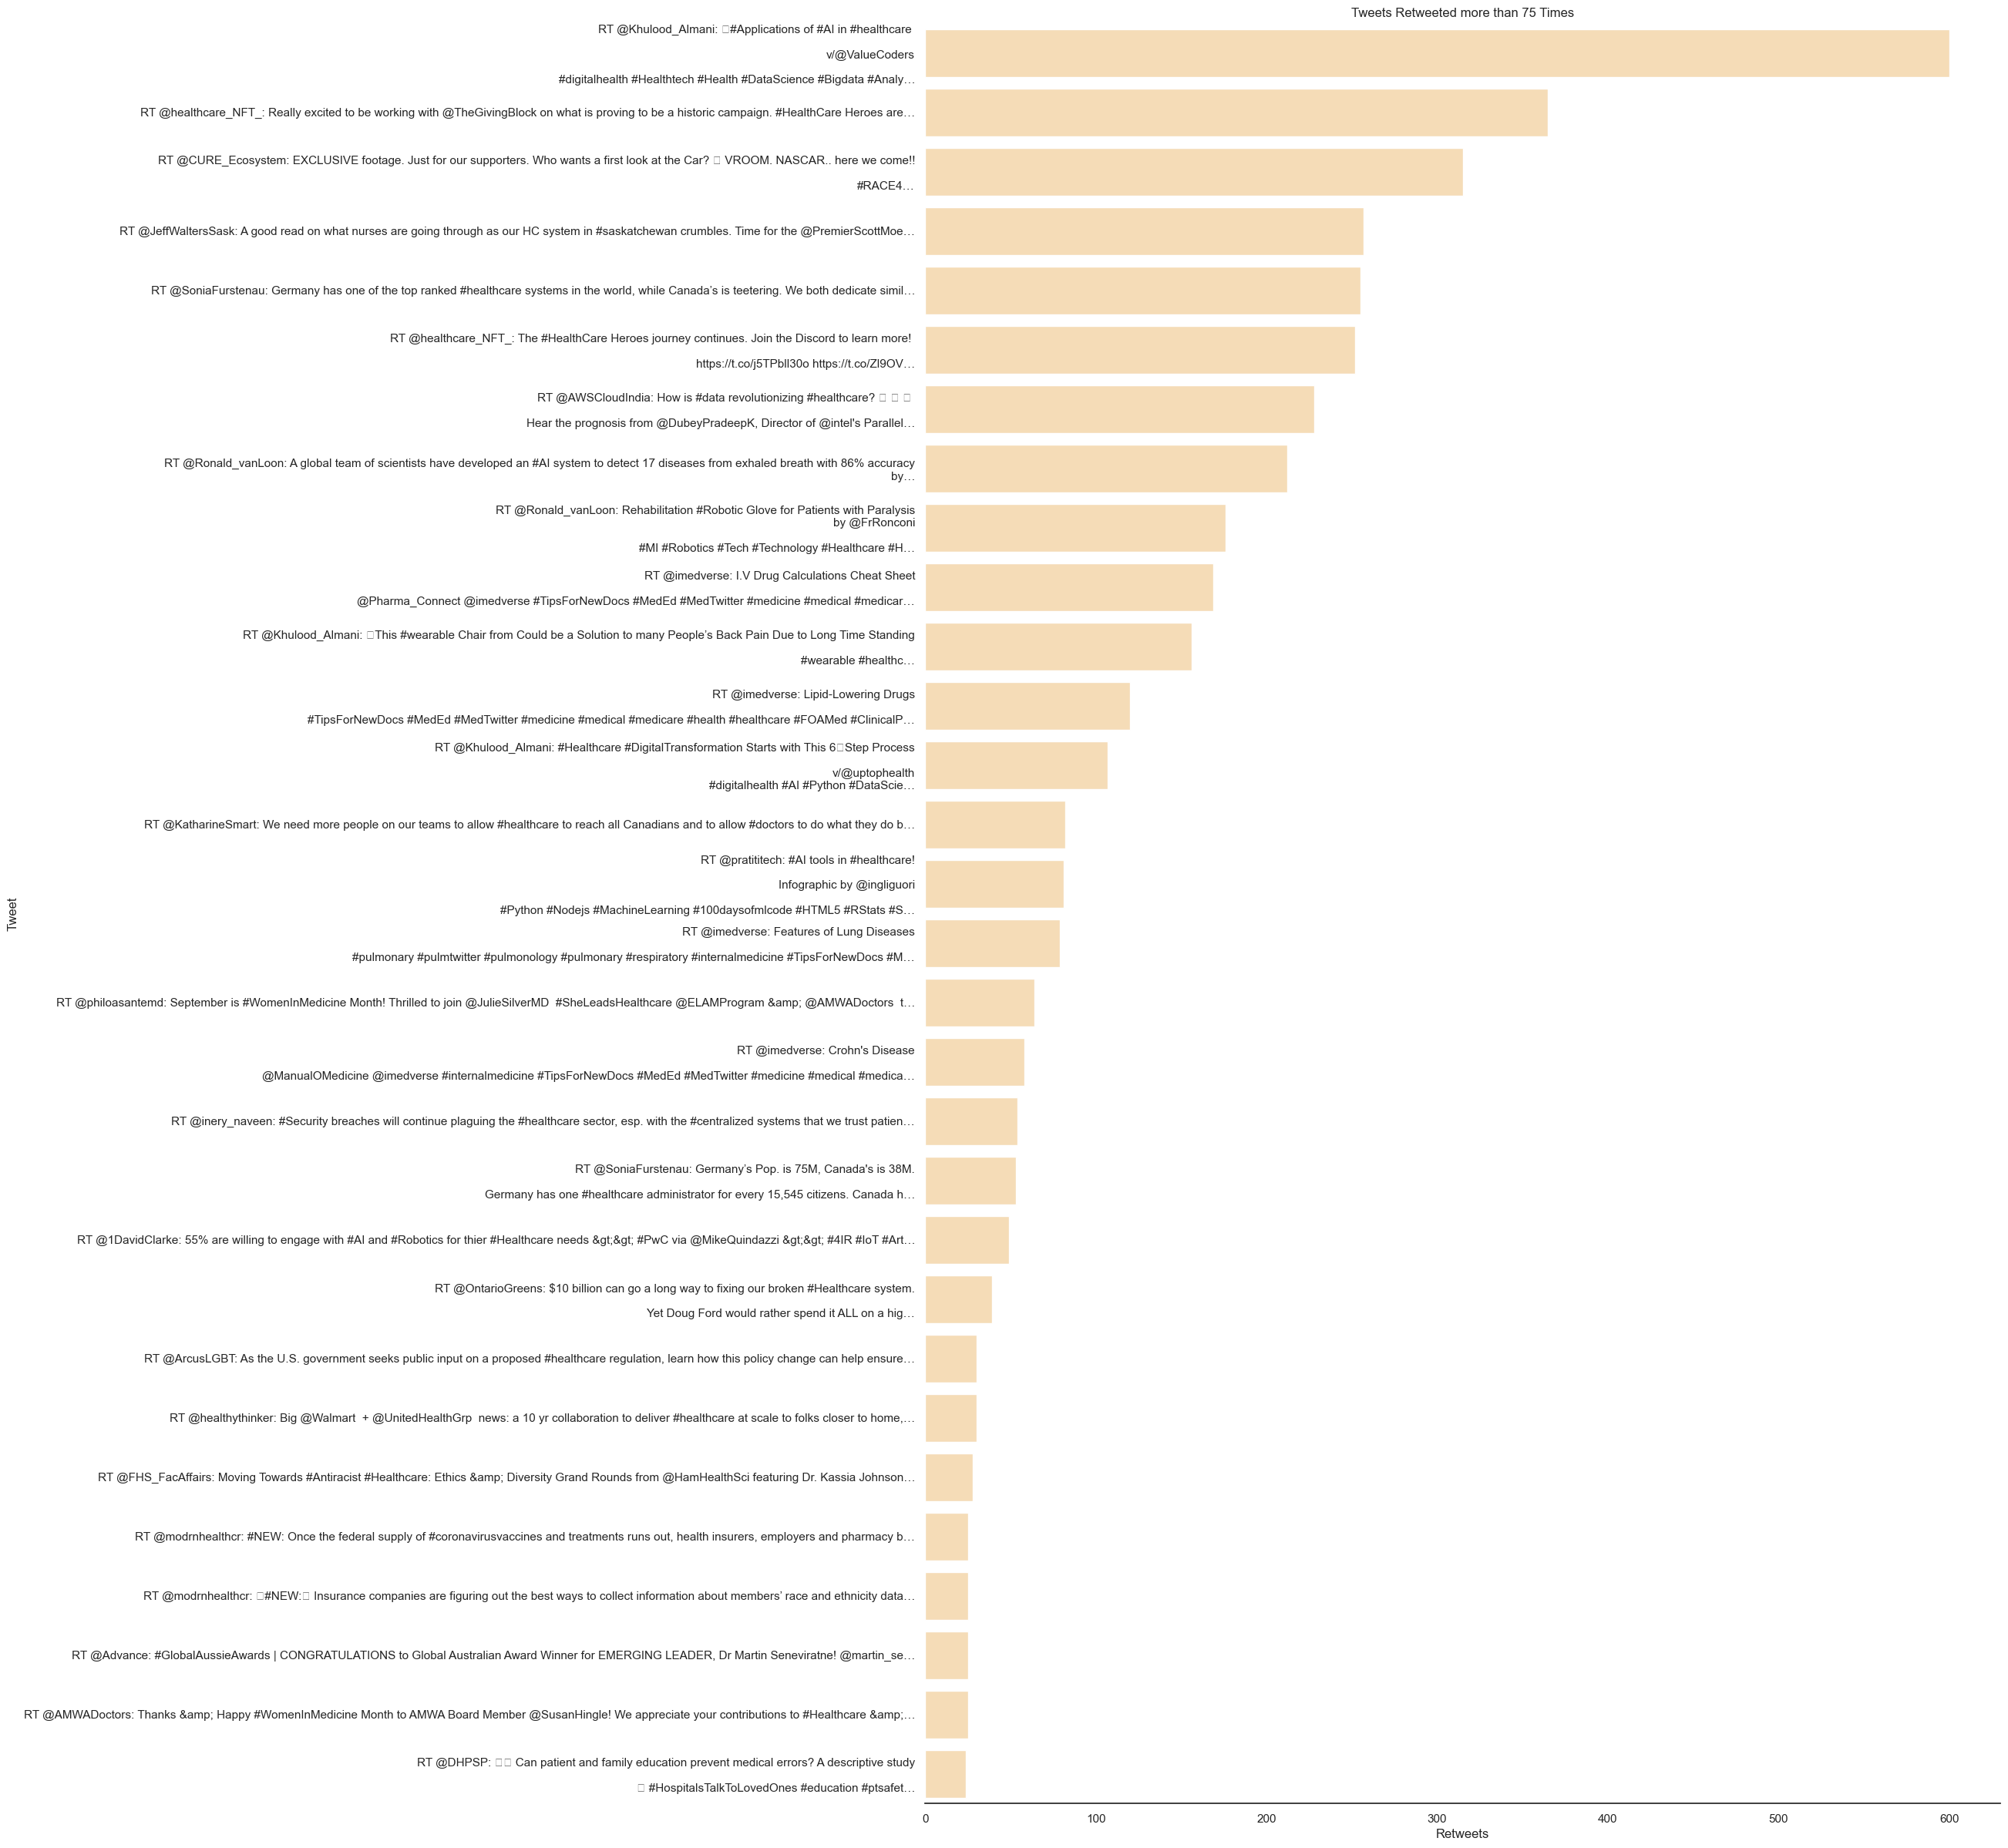

In [1379]:
# Create a Seaborn barplot indicating records with a count >75 records.

# There are a lot of records to display, with text, so make the barplot horizontal, and the figure size tall.
# Set figure size.
# Set figure size.
sns.set(rc={'figure.figsize':(18, 30)})

# Set the plot style as white.
sns.set_style('white')

# Set the plot style.
sns.set_style('white')

# Create the plot. 
# Pale colour used as backdrop to text.
ax = sns.barplot(x='Retweets', y = 'Tweet', data = retweets_counts_over_ten, color = 'navajowhite', orient='h')

plt.title ("Tweets Retweeted more than 75 Times")

# Remove the extra x-ticks
sns.despine(left=True)
'''
# Show the tweets on the bars, in the plot. 
for i, v in enumerate(retweets_counts_over_ten['Retweets']):
    plt.text(v -10,i,retweets_counts_over_ten['Tweet'][i], color = 'black', fontsize = 40, ha='left', va='center',\
            transform=plt.gca().transData)
'''
plt.show()

EDIT: I made the uncomfortable decision to change the cut off to 50. I just thought 10 was unsuitable here. The numbers in question are huge. Ten doesn't mean much, but 50 does. To justify this decision I added descriptive statistics to the exploration process above. Ten is the mean. There are many, many tweets that sit at zero, which pulls the mean down. Added to that, the visualisation is just overwhelming - with all those tweets when we include anything above ten. The purpose of the presentation is to convery clear and useful data to the NHS. How to do that when they can't even read the text in a visualisation about text! Now that we can see the text more clearly, we can see that technology is a big theme, as well as specific mentions of specific health issues, including two references to lung issues. We can still present all the retweeted tweets over 10 to the NHS in a different form. 

Let's round of this area of exploration and visualisation with a quick look at the hashtags themselves (in case I have misunderstood the brief) and the favourite tweets. The text content of these retweeted tweets is less emotive than the favorited texts. I am beginning to feel more inclined to presenting the favourited tweets to the NHS. I think they want to get a sense of what people are feeling, not just what they are saying. And specifically in relation to resourcing. 

In [1367]:
# Make a dataframe highlighting the count of themes across these rows.
# Make a dictionary from as many as possible of the common themes and their counts (not all of there are in the hashtag).
Retweet_topics = {'Neurofibrillary tangles (NFTs)': '617', 'AI and Data': '1302',
                  'Difficulties that Staff Face': '257', 'US and Canada': '647', 'Germany as Exemplary': '308',
                  'New Inventions': '544', 'Lung Disease': '79', 'Staff Shortages': '339', 
                  'Women Leaders in Medicine':'64', 'Cybersecurity': '54', 'Crohns Disease': '58', 'Paralysis': '176',
                  'Centralising Healthcare':'54', 'Backpain':'156', 'Diagnosis':'212',
                  'Supporting New Doctors':'178', 'Drugs':'289'} 

# Save the dictionary as a tuple. 
Topics=tuple(Retweet_topics.items())

# Make a dataframe from the tuple of themes and their count of retweets. 
Retweet_topics = pd.DataFrame(Topics, columns = ['Tweet Topic', 'Retweet Count'])
Retweet_topics

Tweet Topic Retweet Count
0   Neurofibrillary tangles (NFTs)           617
1                      AI and Data          1302
2     Difficulties that Staff Face           257
3                    US and Canada           647
4             Germany as Exemplary           308
5                   New Inventions           544
6                     Lung Disease            79
7                  Staff Shortages           339
8        Women Leaders in Medicine            64
9                    Cybersecurity            54
10                  Crohns Disease            58
11                       Paralysis           176
12         Centralising Healthcare            54
13                        Backpain           156
14                       Diagnosis           212
15          Supporting New Doctors           178
16                           Drugs           289

In [1368]:
# Change the Retweet Count column to float.
Retweet_topics['Retweet Count'] = Retweet_topics['Retweet Count'].astype(float)

In [1374]:
# Sort the Retweet Count column.
Retweet_topics.sort_values('Retweet Count', ascending = False).reset_index(inplace=True)

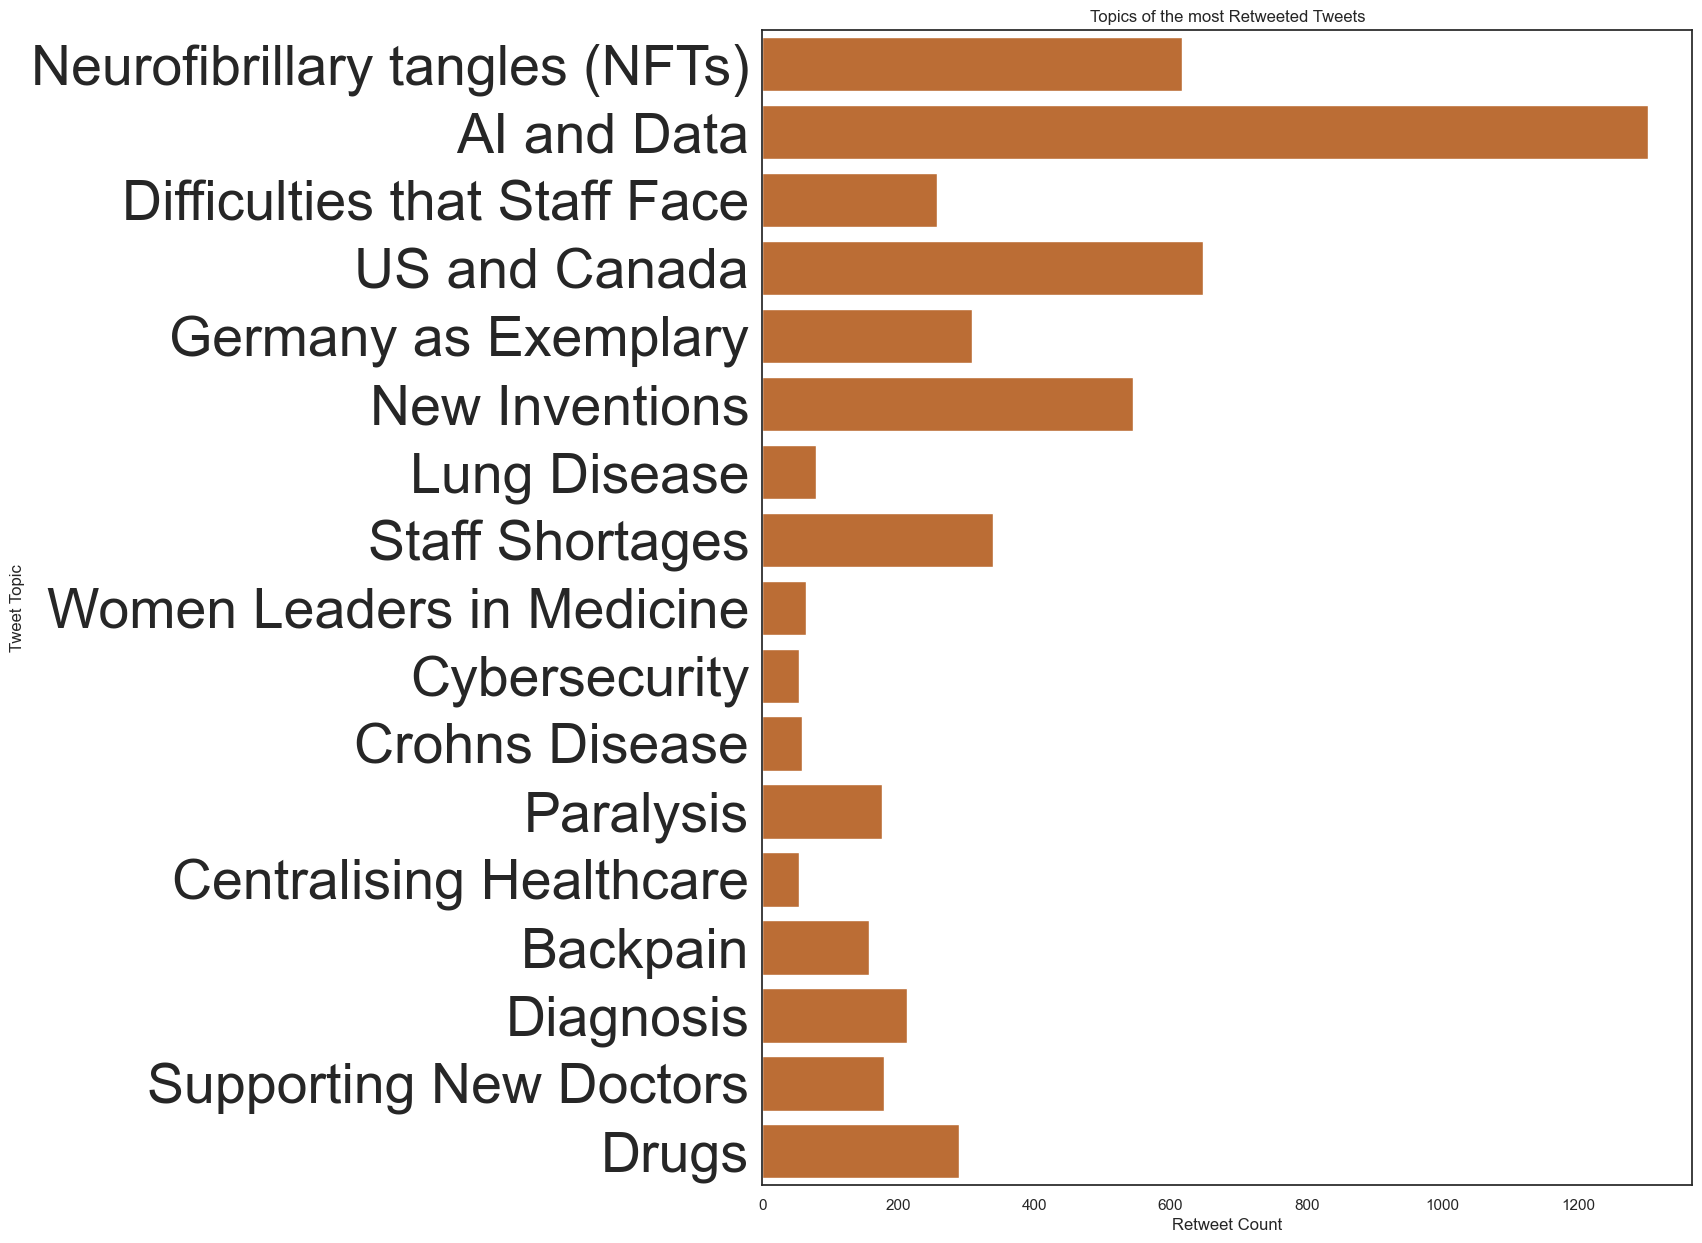

In [1375]:
# Show the data in a barplot.

# Set figure size.
plt.figure(figsize=(12,15))

# Set the plot style.
sns.set_style('white')

# Create the plot. 
# Pale colour used for the bars, to allow the texts to be focused on, and the size of the bars to be their focus. 
# Horizontality for the text. 
ax = sns.barplot(x ='Retweet Count', y = 'Tweet Topic', data = Retweet_topics, color = 'chocolate',
                 orient='h')
plt.title ("Topics of the most Retweeted Tweets")
plt.yticks(fontsize=40)

plt.show()

### Favourites

In [1287]:
# Create a new DataFrame containing only the text.
texts_favourites = twitter.groupby(['tweet_full_text'])['tweet_favorite_count'].sum().reset_index()
texts_favourites = texts_favourites.sort_values('tweet_favorite_count', ascending = False).reset_index()
# View the DataFrame.
texts_favourites

index  \
0      353   
1      944   
2      281   
3      413   
4      265   
..     ...   
956    376   
957    377   
958    378   
959    380   
960    960   

                                                                                                                                                                                             tweet_full_text  \
0    Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...   
1                                                                                                                       You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥   
2                                                                                                                     How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb   
3    Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes savin...   
4    Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStude...   
..                                                                                                                                                                                                       ...   
956  NO ON PROP 29: The proponents says the proposition is intended to improve patient care. It’s an assertion they can’t back up with evidence. It's about $$....not about your care.. https://t.co/0exI...   
957  Nanoscope Therapeutics to Present at Baird's 2022 Global Healthcare Conference - Yahoo Finance https://t.co/U7zH1340Js #strategy #competitiveintelligence #marketing #healthcare #biotech #competiti...   
958  Nervous to apply for a job like "CNA" at Cerenity Senior Care-Humboldt? Apply even if you're not a 100% match. You might be underestimating your value. Click the link in our bio for more info. #He...   
959  New Job Alert: Veterinarian (#Matthews, North Carolina) Banfield Pet Hospital #job #DoctorofVeterinaryMedicine #DoctorofVeterinaryMedicine #PreventiveCare #FormularyManagement #MedicalRecords #Hos...   
960                                        🤬 If it isn’t already obvious, there really isn’t a separation of church and state. And it’s getting worse. #HIVcare #healthcare #LGBTQI  https://t.co/zhiVN11REH   

     tweet_favorite_count  
0                      42  
1                      28  
2                      20  
3                      18  
4                      17  
..                    ...  
956                     0  
957                     0  
958                     0  
959                     0  
960                     0  

[961 rows x 3 columns]

In [1289]:
# Loop through the messages, and create a dictionary of values containing the # symbol, as keys, and their retweet 
#    count as the value. 
hashtag_favourites = {value: texts_favourites.loc[texts_favourites['tweet_full_text'] == value,\
                                             'tweet_favorite_count'].iloc[0] for value in texts_favourites\
                                            ['tweet_full_text'] if '#' in str(value)}

In [1291]:
# Convert the dictionary to a list of tuples to display the first 30 records.
favourite_30 = list(hashtag_favourites.items())[:30]
favourite_30 

[('Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: @medics_AbuSaif https://t.co/biwq6A1yVD',
  42),
 ('You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥',
  28),
 ('How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb',
  20),
 ('Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes saving money or saving lives\n- takes care of it’s workers or takes care of itself\n\n#cdnpoli',
  18),
 ('Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: @medics_AbuSaif h

In [1300]:
# Convert the series to a DataFrame in preparation for visualisation.
favourites_df = pd.DataFrame(favourite_30, columns = ['faves', 'number'])

# Rename the columns.
favourites_df = favourites_df.rename(columns = {'faves':'favourited_tweets','number':'count'})

In [1303]:
# View the count datatype.
favourites_df.dtypes
# Instructions are to fix but an integer is appropriate. 

favourited_tweets    object
count                 int64
dtype: object

In [1384]:
# Display records where the count is larger than 10.
favourites_ten_plus = favourites_df[favourites_df['count']>6]
favourites_ten_plus 

favourited_tweets  \
0   Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...   
1                                                                                                                      You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥   
2                                                                                                                    How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb   
3   Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes savin...   
4   Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStude...   
5   More data that our 13+ 🇨🇦 #healthcare systems fall short of providing adequate access to care, even for those w/ a family physician.\n\nInstead of siloed solutions and further system fragmentation...   
6   Looking forward to speaking at #ConV2X on Sep 15! Ping me for a speaker discount if interested! Register at https://t.co/v20ebbXmdO \n\n.@BHTYjournal @hedera @acoerco\n#blockchain #DLT #healthcare...   
7   @CapricornFMNews We have waiting to hear this kind of news now Sa is getting things correct there is absolutely nothing mahala #HealthCare services in SA must be paid by foreign nationals and loca...   
8   September is #WomenInMedicine Month! Thrilled to join @JulieSilverMD  #SheLeadsHealthcare @ELAMProgram &amp; @AMWADoctors  to #InvestInHer!\n\nI #InvestInHer to diversify the #healthcare #leadersh...   
9   Thanks &amp; Happy #WomenInMedicine Month to AMWA Board Member @SusanHingle! We appreciate your contributions to #Healthcare &amp; your leadership in AMWA! Learn about AMWA's community &amp; initi...   
10  We're proud to partner with Drs. Michael P. Koumjian, Michael Vargas and Mark Miller and team on treating their first #heartfailure patients with #Barostim @LLUHealth!\n\n#OutsmartTheHeart #cardio...   
11  .@MedtechWomen’s annual conference brings leading voices in #medtech together to discuss real-world solutions for the biggest challenges in #healthcare. As a Bronze Sponsor for the #MedtechVision2...   
12  ...if you don't want to #ProtectWomen, have a fair tax policy, appreciate #healthcare coverage, want to welcome #immigrants, or are concerned about the climate's effect on #Maine's natural resourc...   

    count  
0      42  
1      28  
2      20  
3      18  
4      17  
5      14  
6      13  
7      12  
8      11  
9      10  
10      9  
11      8  
12      7

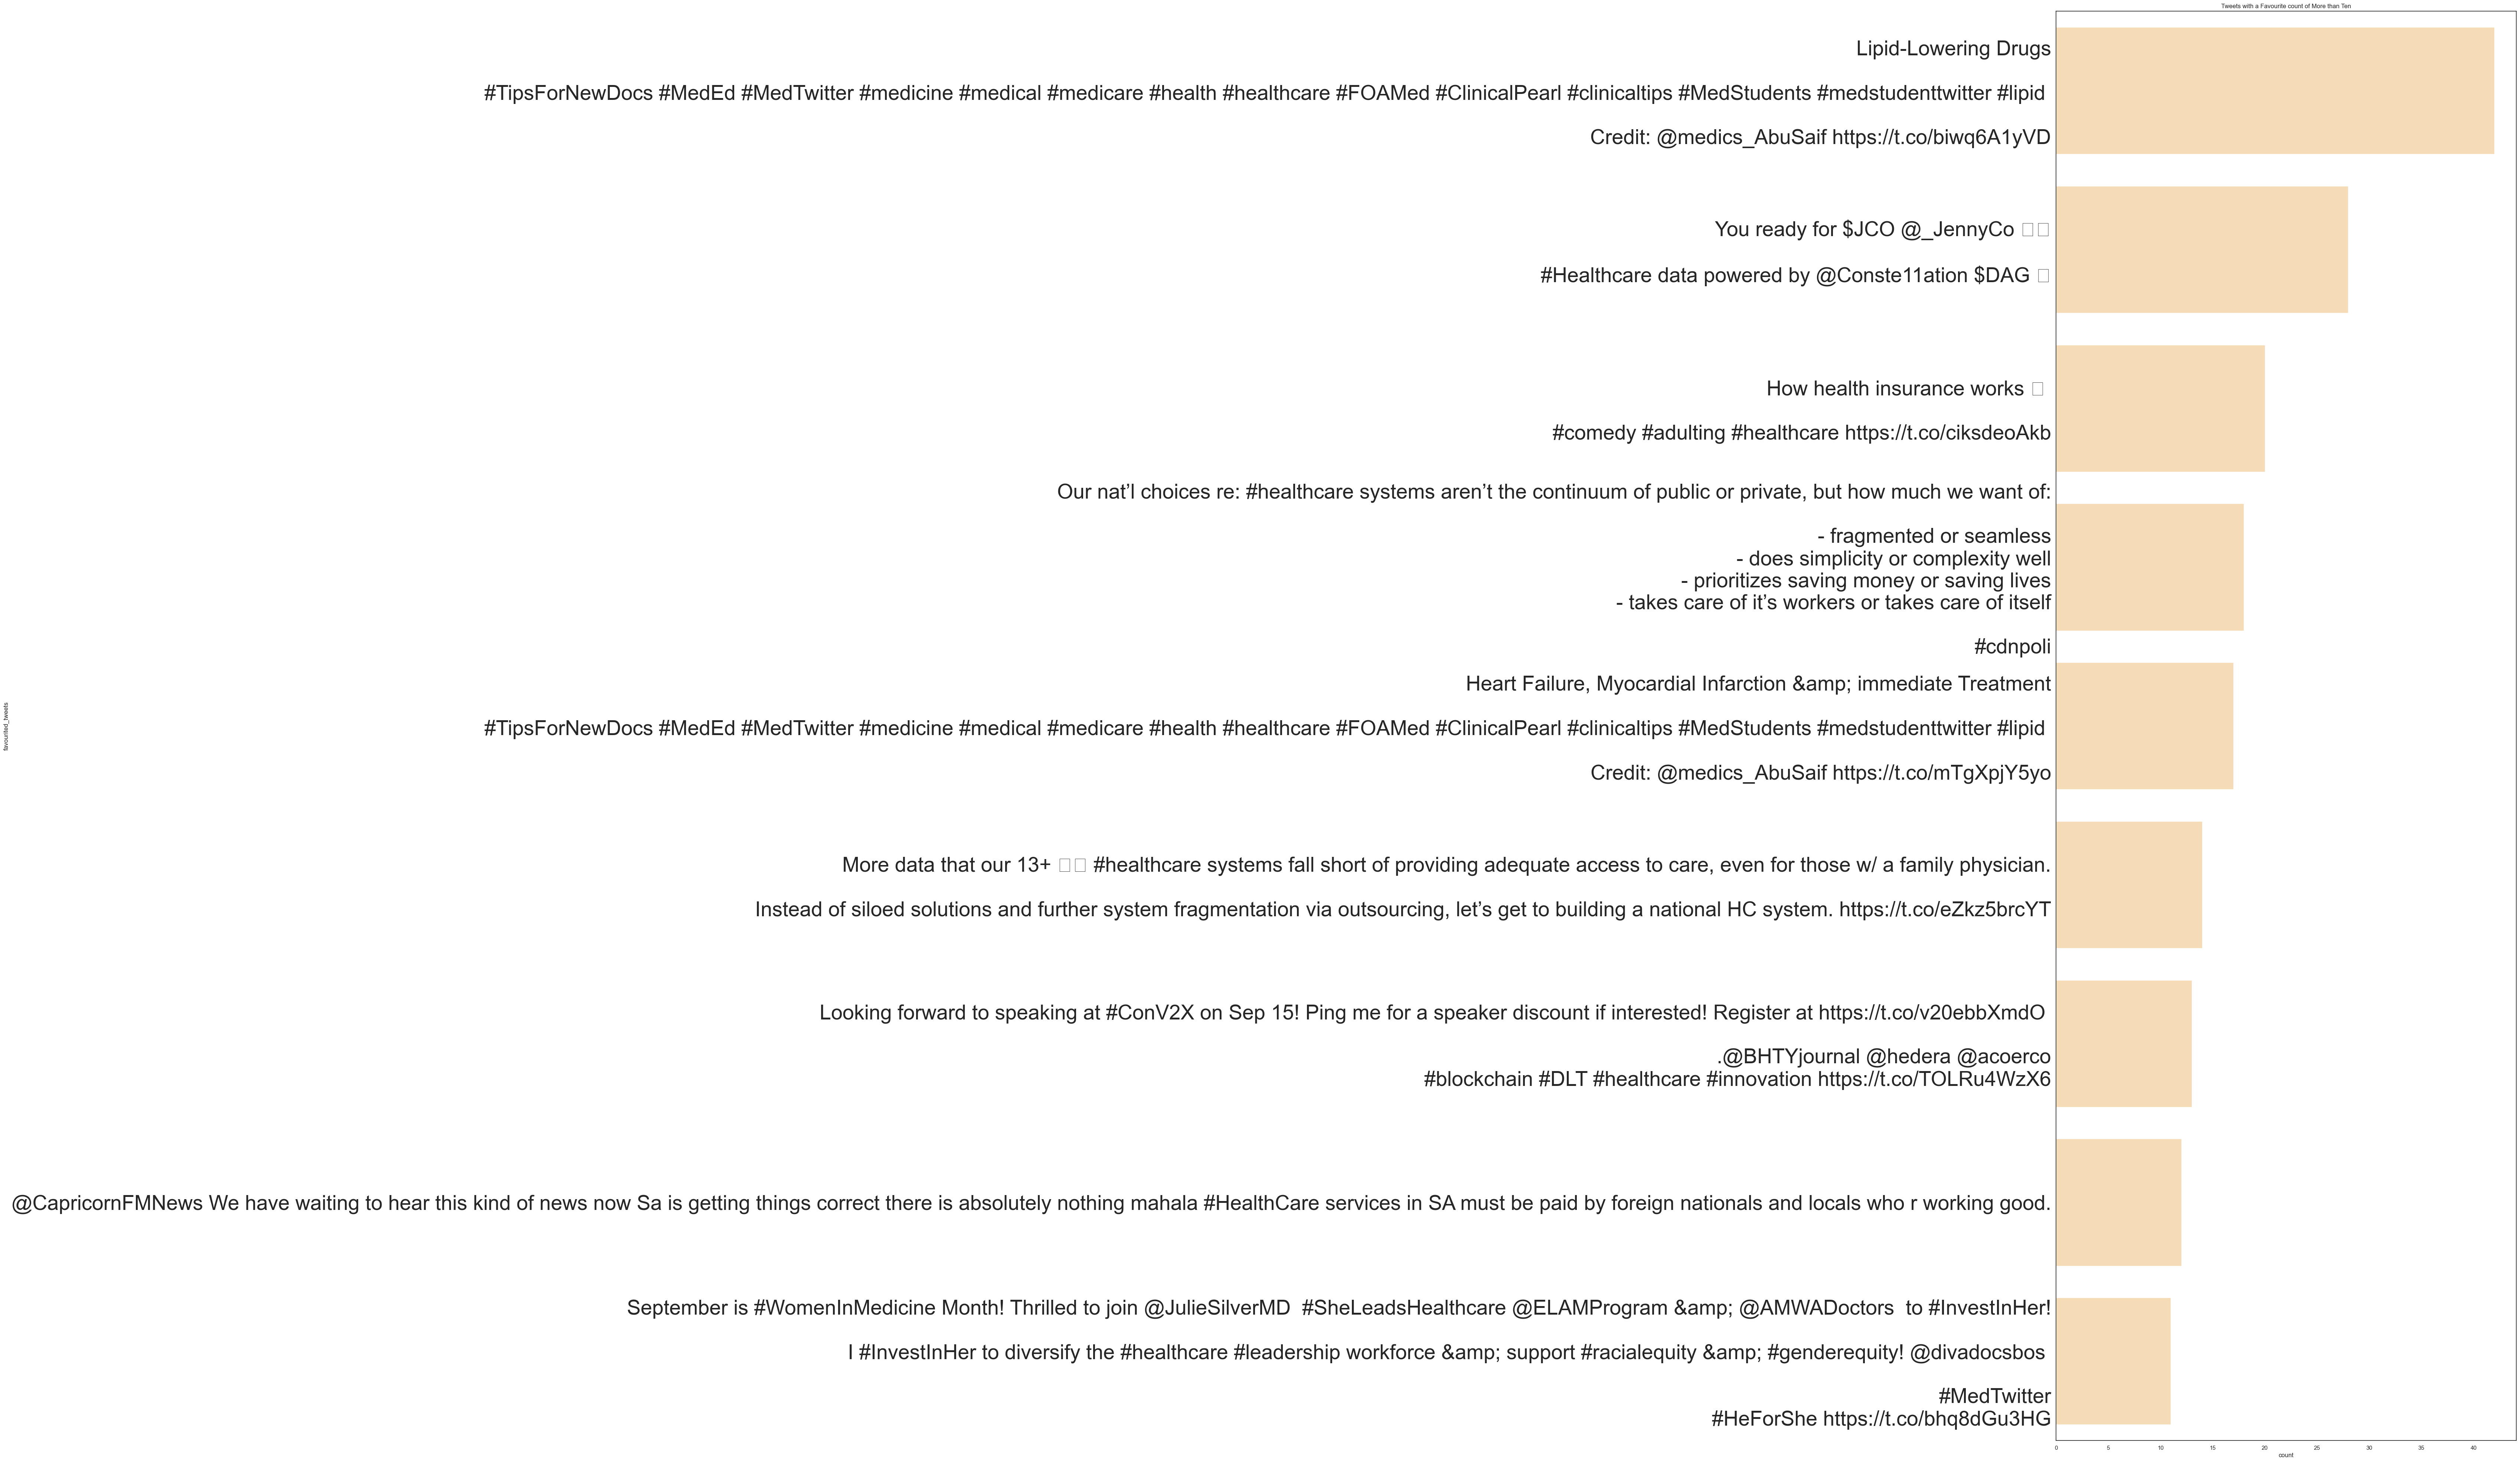

In [1342]:

# Create a Seaborn barplot indicating records with a count >10 records.

# Set figure size.
plt.figure(figsize=(16,50))

# Set the plot style.
sns.set_style('white')

# Create the plot. 
# Pale colour used for the bars, to allow the texts to be focused on, and the size of the bars to be their focus. 
# Horizontality for the text. 
ax = sns.barplot(x='count', y = 'favourited_tweets', data = favourites_ten_plus, color = 'navajowhite',
                 orient='h')
plt.title ("Tweets with a Favourite count of More than Ten")
plt.yticks(fontsize=40)

plt.show()

In [1393]:
# Create a dictionary of the favourite tweets' themes
favourite_tweets = {'Lipid-lowering': 42, 'Inclusivity':7, 'Women in Healthcare': 29, 'Conference': 21, 'Women': 35,
                   'Medical Technology': 8, 'Heart Treatment': 26, 'South Africa': 12, 'Health System Failure': 14,
                   'Health Systems Thinking': 32, 'Insurance': 20, 'Data': 28, 'Medical Students': 42}

# Save the dictionary as a tuple. 
Favourite_Topics=tuple(favourite_tweets.items())

# Make a dataframe from the tuple of themes and their count of retweets. 
favourite_tweets_topics = pd.DataFrame(Favourite_Topics, columns = ['Tweet Topic', 'Retweet Count'])
favourite_tweets_topics

Tweet Topic  Retweet Count
0            Lipid-lowering             42
1               Inclusivity              7
2       Women in Healthcare             29
3                Conference             21
4                     Women             35
5        Medical Technology              8
6           Heart Treatment             26
7              South Africa             12
8     Health System Failure             14
9   Health Systems Thinking             32
10                Insurance             20
11                     Data             28
12         Medical Students             42

In [1394]:
# Change the Retweet Count column to float.
favourite_tweets_topics['Retweet Count'] = Retweet_topics['Retweet Count'].astype(float)

In [1395]:
# Sort the Retweet Count column.
favourite_tweets_topics.sort_values('Retweet Count', ascending = False).reset_index(inplace=True)

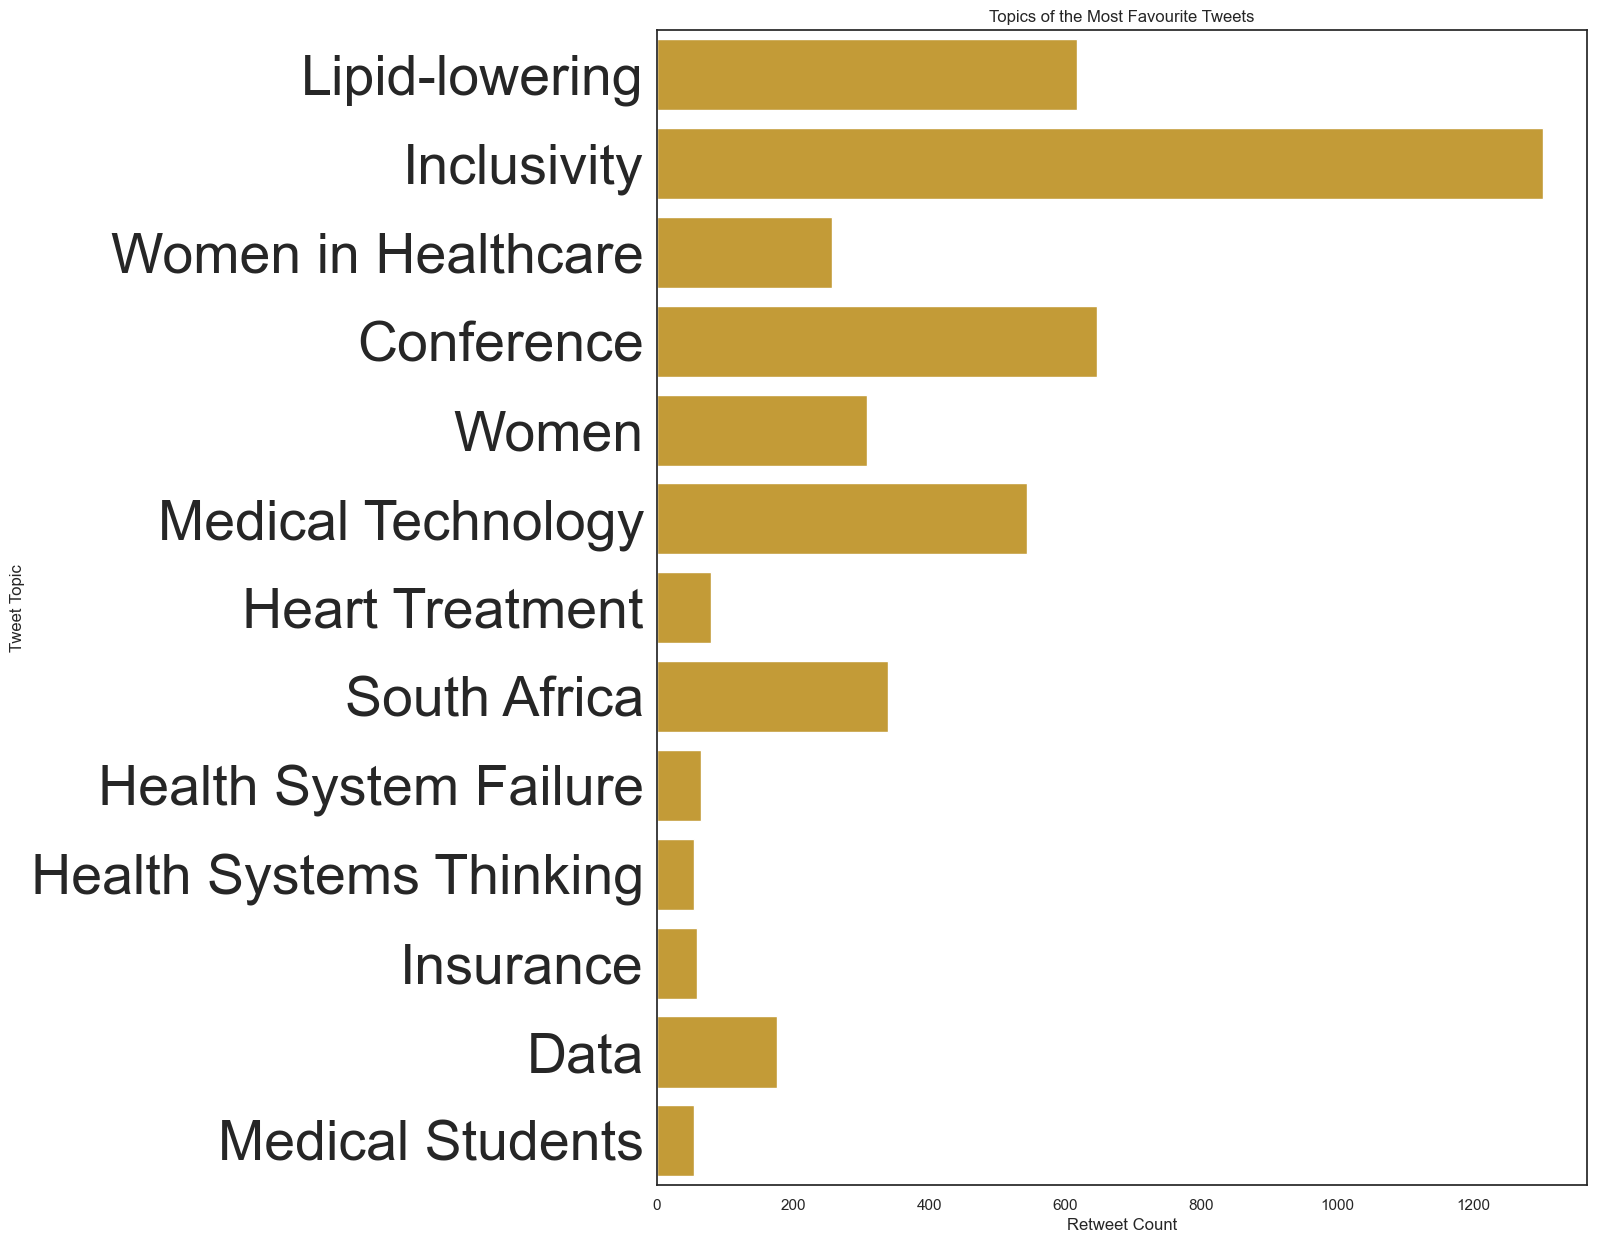

In [1396]:
# Show the data in a barplot.

# Set figure size.
plt.figure(figsize=(12,15))

# Set the plot style.
sns.set_style('white')

# Create the plot. 
# Pale colour used for the bars, to allow the texts to be focused on, and the size of the bars to be their focus. 
# Horizontality for the text. 
ax = sns.barplot(x ='Retweet Count', y = 'Tweet Topic', data = favourite_tweets_topics, color = 'goldenrod',
                 orient='h')
plt.title ("Topics of the Most Favourite Tweets")
plt.yticks(fontsize=40)

plt.show()

That's a really good visualisation: it's very simple, but there's a lot to be taken from it. For example the Medical Council and the NHS both state that inclusivity is an important component of a thriving healthcare system. But the Medical Council make really clear that it is a top priority. The NHS have so many priorities, do they understand quite how impornant inclusivity is and why? This might help convey that message. 

Twitter is all about communicating, and specicially the messaging about health in the online space.

It's clear from the metadata, though that will need careful handling in discussing with the NHS, that they are somewhat ambivalent about data and where they want to be on the data maturity curve. For example, there are many systems operating separately. 

There is a lot of data collection - the NHS website, and their subsidiary ICB sites, are full records on everything from GP wellbeing to patient satisfaction. But it is mostly in raw form.

Compare this with the infographics on the Office of National Statistics website, or organisations like the Kings Fund, which does a lot of communicating about the NHS and its transition phase for example into ICP/ICB/ICS model. Why does an external body do a better job of communicating the NHS's own story, than NHS does itself. 

Individual ICBs have their own website, with enormous inconsistencies between them. Some have easy to find pages all about the communities they serve - specific challenges in socioeconomics and wellbeing. This aligns so well with the purpose of the enormous reshaping of health provion into ICPs, which are designed to connect health and social services together for better outcomes for patients and community health. But when you click on 'about' on many of the ICBs' websites, you find yourself looking at photos of the board. The web presence of the NHS is actually really disappointing. Hopefully the 

Why can't we be looking at data about where certain kinds of diseases are prevalent, when we look online? It's all available to the NHS. Why isn't it available to the community? Is the lack of transparency due to lack of capacity, understanding? appreciation of data's role in empowering the community?

The visualisation above makes it very clear that Data is massive in healthcare. But does the NHS understand what engaging with data coudl do to transform their relationship with the puvlic? 

## Tweeters

The NHS might want to consider how to infuence or monitor specific twitter users whose messages are often retweeted. Sometimes it isn't the content exclusively, but also the popularity of the tweeter, that will influence how ideas are disseminated. Below are the twitter users whose tweets have been retweeted more than 200 times. Further analysis could indicate those who are regularly retweeted (ie for mror than jut one tweet); further analysis could also id who, if any, is in both gruops. 


In [1169]:
# Identify the id of those who have tweeted a tweet that has been retweeted many times. 
retweeted_tweeters= twitter.groupby(['tweet_id'])['tweet_retweet_count'].sum().reset_index()
retweeted_tweeters = retweeted_tweeters.sort_values('tweet_retweet_count', ascending = False)
retweeted_tweeters.head(16)

tweet_id  tweet_retweet_count
1084  1567649792897032192                  303
367   1567594695890542592                  208
207   1567585317498003456                  208
364   1567594594547945472                  208
256   1567588265414520832                  208
178   1567583062354968576                  208
751   1567621342987718656                  208
249   1567587723850166272                  208
214   1567585759036669958                  208
186   1567583655689854978                  208
361   1567594301978288130                  208
1017  1567644141726703617                  208
359   1567594286056603661                  208
87    1567578852159004675                  207
146   1567581274088566785                  207
47    1567577096314322944                  207

In [1172]:
# Identify the id of those who have tweeted a tweet that has been favourited many times.

favourite_tweeters= twitter.groupby(['tweet_id'])['tweet_favorite_count'].sum().reset_index()
favourite_tweeters = favourite_tweeters.sort_values('tweet_favorite_count', ascending = False)
favourite_tweeters.head(10)


tweet_id  tweet_favorite_count
190   1567583855422611461                    42
164   1567582427719282689                    28
905   1567634936341069826                    20
89    1567579049043832832                    18
224   1567586306607423488                    17
54    1567577266162475011                    14
588   1567611240024875008                    13
248   1567587492949286912                    12
1005  1567643206480699392                    11
253   1567588119892971520                    10

# Assignment activity 6

### Investigate the main concerns posed by the NHS. 

In [1426]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
# View the DataFrame.
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [1427]:
# Print the min and max dates.

# Create a new column in the ar dataframe with the month data in datetime format.
ar['month_datetime'] = pd.to_datetime(ar['appointment_month'])

# Print the min and max dates.
ar_date_min = ar['month_datetime'].min()
ar_date_max = ar['month_datetime'].max()
print("The min date is:", ar_date_min, "and the max date is:", ar_date_max)

The min date is: 2020-01-01 00:00:00 and the max date is: 2022-06-01 00:00:00


In [1428]:
# Filter the data set to only look at data from 2021-08 onwards.
ar2 =ar[ar['month_datetime']>='2021-08-01']  
ar2

icb_ons_code appointment_month appointment_status hcp_type  \
3652      E54000034           2021-08           Attended       GP   
3653      E54000034           2021-08           Attended       GP   
3654      E54000034           2021-08           Attended       GP   
3655      E54000034           2021-08           Attended       GP   
3656      E54000034           2021-08           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
3652       Face-to-Face                             1 Day   
3653       Face-to-Face                    15  to 21 Days   
3654       Face-to-Face                       2 to 7 Days   
3655       Face-to-Face                    22  to 28 Days   
3656       Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments month_datetime  
3652                     6553     2021-08-01  
3653                     2390     2021-08-01  
3654                    10547     2021-08-01  
3655                      937     2021-08-01  
3656                     4961     2021-08-01  
...                       ...            ...  
596816                     21     2022-06-01  
596817                      8     2022-06-01  
596818                     28     2022-06-01  
596819                     17     2022-06-01  
596820                     10     2022-06-01  

[223418 rows x 8 columns]

In [1436]:
# Print the min and max dates again to confirm range change of dates.
ar2_date_min = ar2['month_datetime'].min()
ar2_date_max = ar2['month_datetime'].max()
print("The min date is:", ar2_date_min, "and the max date is:", ar2_date_max)

The min date is: 2021-08-01 00:00:00 and the max date is: 2022-06-01 00:00:00


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [1410]:
# Create an aggregated data set to review the different features.

In [1430]:
# Determine the total number of appointments per month.
# Use the ar2 df.
# Name the new df indicating its provenance and to differentiate from previous iterations.  
# Group it by monthly appointments
ar2_months = ar2.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()
# View the DataFrame.
ar2_months

appointment_month  count_of_appointments
0            2021-08               23852171
1            2021-09               28522501
2            2021-10               30303834
3            2021-11               30405070
4            2021-12               25140776
5            2022-01               25635474
6            2022-02               25355260
7            2022-03               29595038
8            2022-04               23913060
9            2022-05               27495508
10           2022-06               25828078

Looks like considerable fluctuation - check with descriptive statistics

In [1432]:
# Describe() the dataset.
ar2_months.describe()

count_of_appointments
count           1.100000e+01
mean            2.691334e+07
std             2.460899e+06
min             2.385217e+07
25%             2.524802e+07
50%             2.582808e+07
75%             2.905877e+07
max             3.040507e+07

Indeed, with a min of approximately 24 million and a max of more than 30 milion, this is a massive fluctuation for the NHS to staff appriately. Consider how staffing outside of appointments, and in education and community health may utitilse capcity in quieter months, and have flow on beneficial outcomes for health across the network.

In [1433]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
print(ar2_months.dtypes)
# Keeping both month columns in the dataframe means I can choose the object or datetime version, as appropriate.
# ie no need to convert for this task. 

appointment_month        object
count_of_appointments     int64
dtype: object


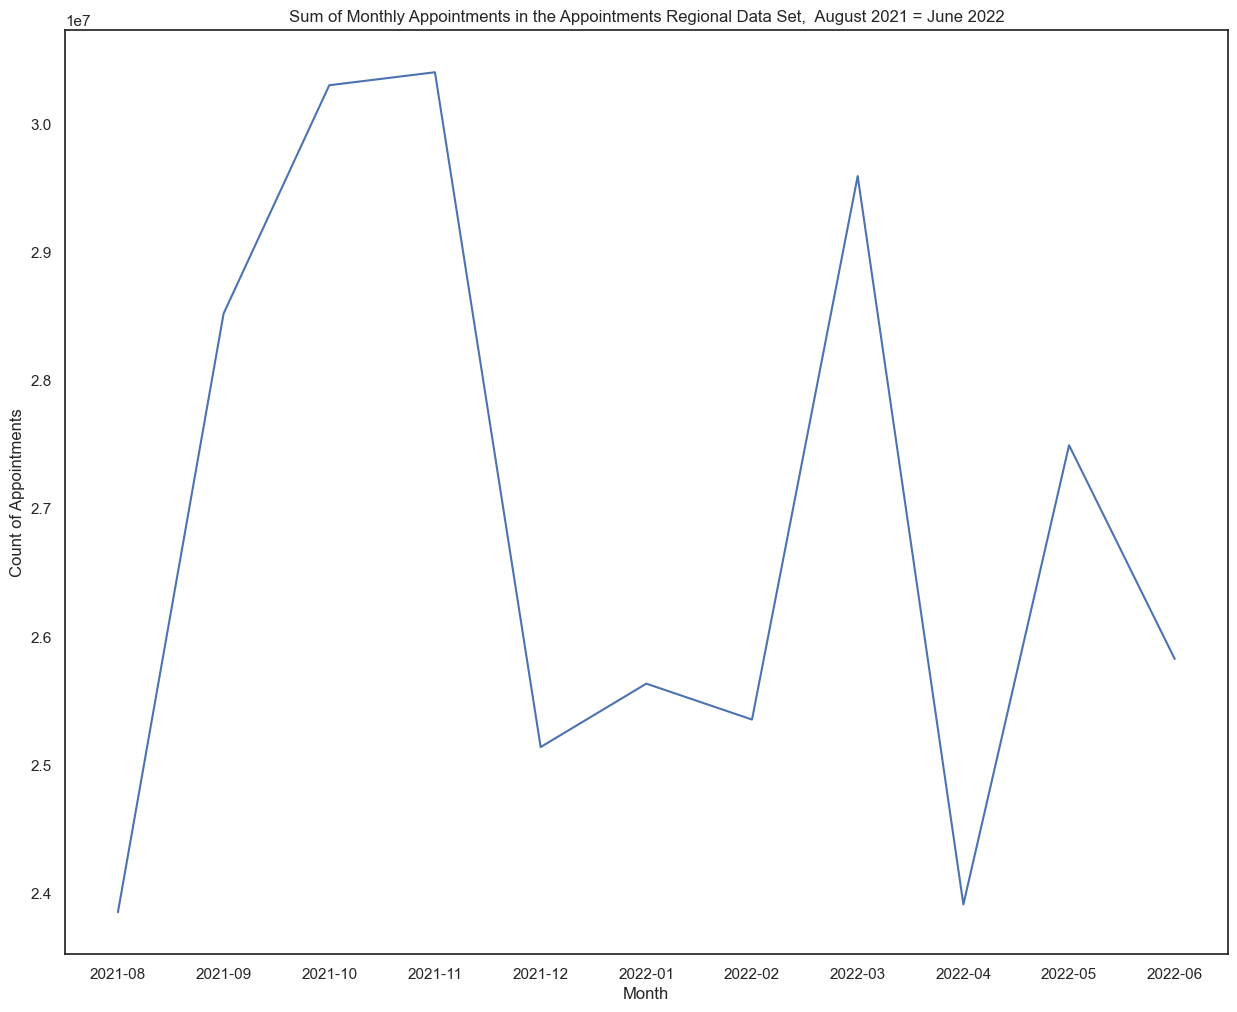

In [1439]:
# Create a lineplot with Seaborn.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar2_months)
plt.title('Sum of Monthly Appointments in the Appointments Regional Data Set,  August 2021 = June 2022')
plt.xlabel('Month')
plt.ylabel('Count of Appointments')
plt.show()

This very simple graph nevertheless tells a very powerful story. A story about massively fluctuating appointment counts. Is it feasible to attract and more importantly to KEEP overseas doctors (as per Medical Council report, that this is absolutely necessary), by allowing them periods of lower work stress? Could these downtimes be opportunities for them to develop their specialisms alongside expert practitioners? The PCNs and ICPs make relationships between service settings  desirable, and practicable. Instead of only looking at these troughs as opportunities to work staff harder, these are the times to offer wellbeing and career-enhancing options.

The peaks we are looking at could be manged better by opening on weekends. 9-5 workers, M-F workers can find it very difficult to see a doctor during the week, and we see elsewhere in this anaylysis that Monday peaks in the busiest times reflect a genuine issue with the way doctors appointments being stuck in a M-F timeframe brings about considerable and avoidable Monday peaks which further compound the issues we are seeing here in terms of seasonal and monthly peaks. 

These monthly peaks, which spike in Autumn and Spring, represent changes in lifestyle and the re-emergence of seasonally predictable illnesses. Education around these times could really help to bring the spread of illness down at these times. In fact these peaks represent excellent responsiveness on the part of the NHS. When people can see doctors on the same day, which is what the NHS is really good at, that's on of the dynamics that bring about these peaks, as opposed to delays in access to care, which spread and grow the need. We do see a bit of this in Autumn, above. Illness and need is not being contained, and so contageous diseases are spreading. If there is any time when capacity should be increased, it's then. Open up on weekends as a norm, in Autumn. Perhaps not in all General Practice settings, but provide that option for people. PCNs should be leveraging their capactiy to pool resources, to offer consistent open-doors care for patients. 

In [ ]:
# Plot monthly capacity utilisation.

We know the NHS is interested in whether there is enough staff in the netork. The most granular lens we have to look at capacity utilisat

In [ ]:
# Create a lineplot.

**Question 2:** How do the healthcare professional types differ over time?

In [ ]:
# Create a line plot to answer the question.


**Question 3:** Are there significant changes in whether or not visits are attended?

In [1479]:
# Create a line plot to answer the question.
ar_attendance_timeline = ar2.groupby(['appointment_status', 'appointment_month'])\
                                    ['count_of_appointments'].sum().reset_index()
ar_attendance_timeline.head()

appointment_status appointment_month  count_of_appointments
0           Attended           2021-08               22081765
1           Attended           2021-09               25757066
2           Attended           2021-10               27170506
3           Attended           2021-11               27667665
4           Attended           2021-12               22853483

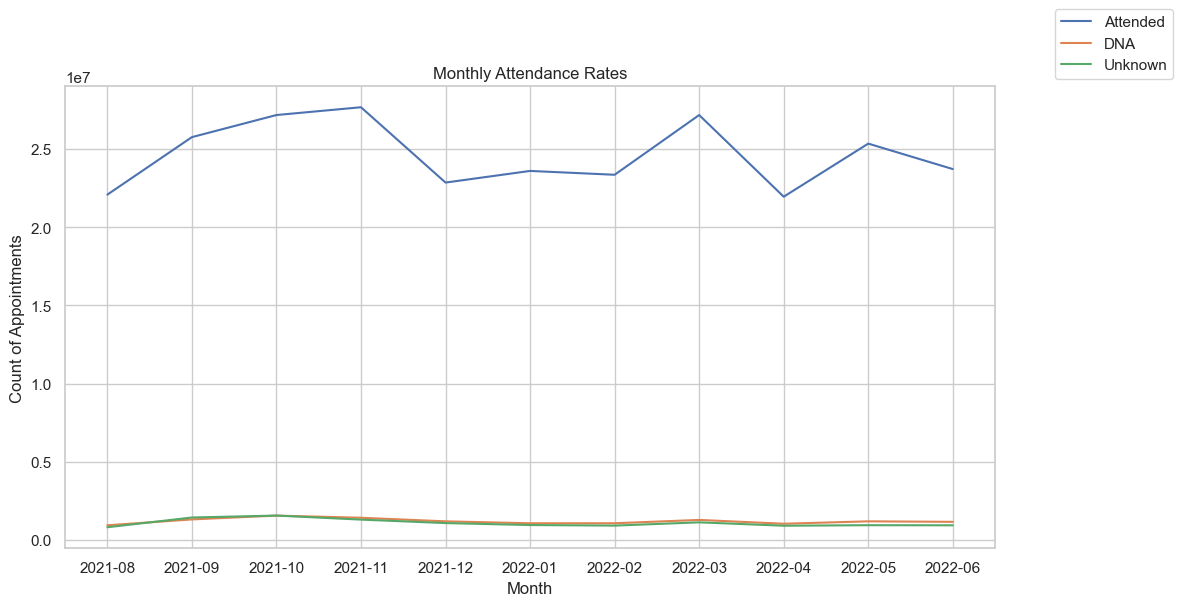

In [1481]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data = ar_attendance_timeline)
plt.title('Monthly Attendance Rates')
plt.xlabel('Month')
plt.ylabel('Count of Appointments')
plt.legend(loc='lower right', bbox_to_anchor=(1.2,1))
plt.show()

This doesn't mean much though until we scale the data to look at the proportions.

**Question 4:** Are there changes in terms of appointment type and the busiest months?

There are so many ways to answer this question. But we know that the NHS is interested in capacity, and the most granular tool we have to look at this is the national categories. These define many different types of appointments

In [1511]:
# Aggregate the nc data to months.
nc.head()
nc_monthly = nc.groupby(['national_category', 'appointment_month'])['count_of_appointments'].sum().reset_index()
nc_monthly.head()

national_category  \
0  Care Home Needs Assessment & Personalised Care and Support Planning   
1  Care Home Needs Assessment & Personalised Care and Support Planning   
2  Care Home Needs Assessment & Personalised Care and Support Planning   
3  Care Home Needs Assessment & Personalised Care and Support Planning   
4  Care Home Needs Assessment & Personalised Care and Support Planning   

  appointment_month  count_of_appointments  
0           2021-08                  29676  
1           2021-09                  33503  
2           2021-10                  32441  
3           2021-11                  38827  
4           2021-12                  34653

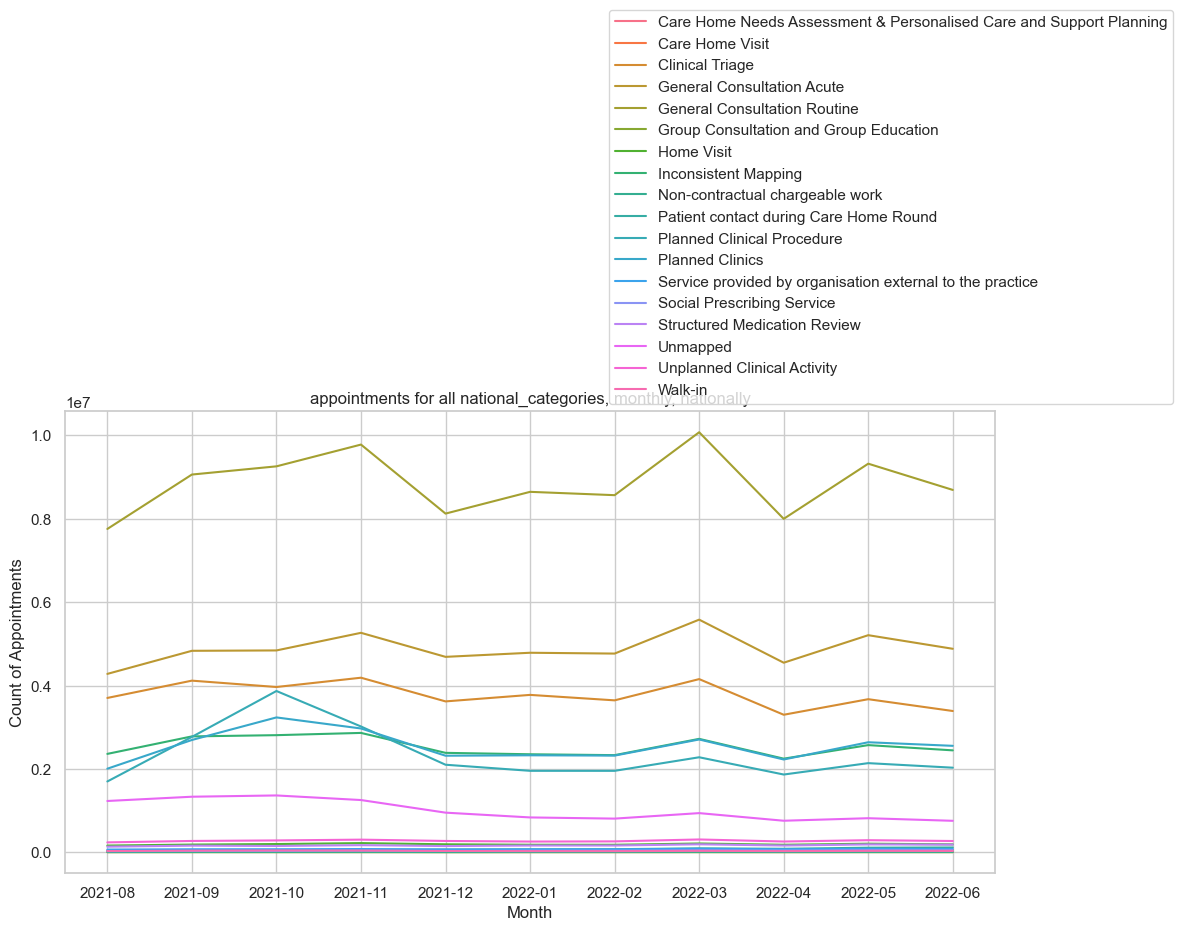

In [1510]:
# Visualise the national category appointments (timeline) at monthly counts
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_monthly)
plt.title('appointments for all national_categories, monthly, nationally')
plt.xlabel('Month')
plt.ylabel('Count of Appointments')
plt.legend(loc='lower right', bbox_to_anchor=(1.2,1))

plt.show()

We can see here that during busy times - which we have established are Autumn and Spring, the spread of appointments across the national category types, rises proprtionally in Spring, across the board. But in Autumn, the trend isn't so uniform. Although some national category types fdo rise as expected, the types with the highest count, although they do indeed rise, either drop slightly in the middle of the season, or, in the case of the General Consultation Routine type, the counts rise but at a much reduced rate. 

It will be much easier to see if we filter for the highest count types.

In [1506]:
# Remove the types whose counts are below 8 000 000.
nc_monthly2 = nc_monthly
nc_monthly2 = nc_monthly2[nc_monthly2['count_of_appointments']>=800000]

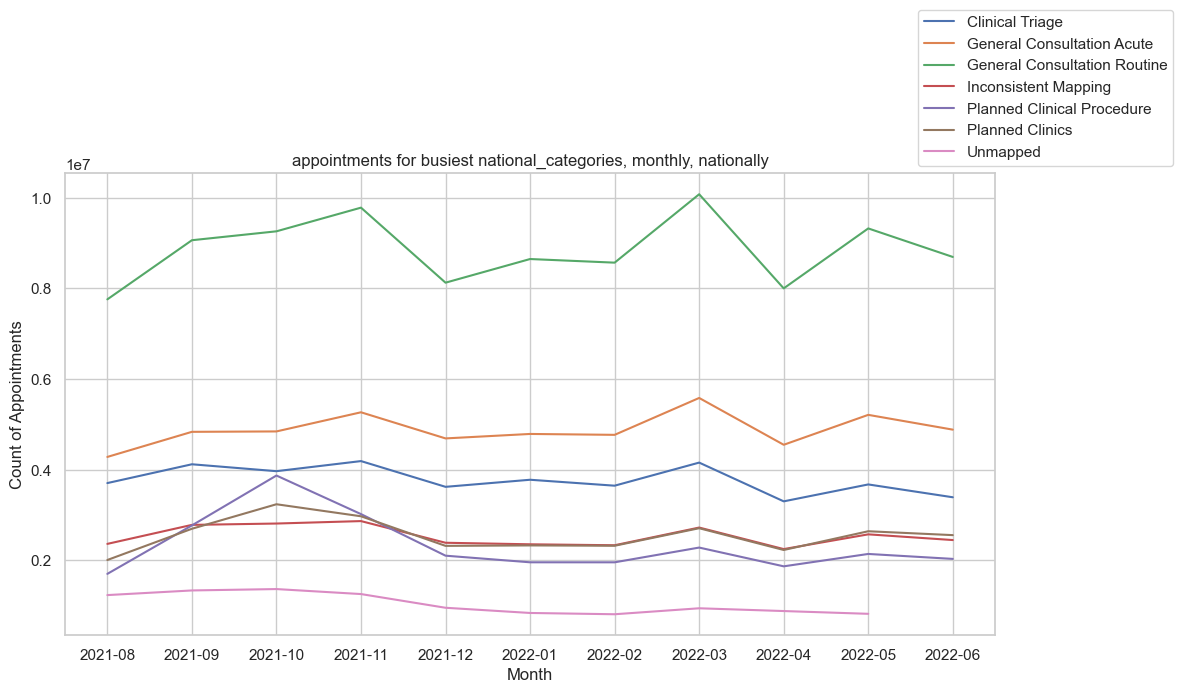

In [1508]:
# Visualise the national category appointments again, with just the largest counts types
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_monthly2)
plt.title('appointments for busiest national_categories, monthly, nationally')
plt.xlabel('Month')
plt.ylabel('Count of Appointments')
plt.legend(loc='lower right', bbox_to_anchor=(1.2,1))

plt.show()

Now we can really clearly see that the planned clinics and the planned clinical procedures are the types conforming most to the expected trend of rising in the Autumn, while the Gen Consults both accute and routine, may be unable to keep up with the needs they are seeing at this time, which wil bring about an extended period of business, which we see as a somewaht rounded peak. This is when sickness compounds as unwell people are in the community longer, and unable to see a doctor. So those are the services to target with better staffing at the end of Winter, and right the way through Autumn. 

**Question 5:** Are there any trends in time between booking an appointment?

I believe that a barplot displays the trend between booking and appointment, better. 

In [1440]:
# Group the ar2 data to show the relationship between waiting and attendance.
wait_status = ar2.groupby(['time_between_book_and_appointment', 'appointment_status'])\
                            ['count_of_appointments'].sum().reset_index()
wait_status.head()

time_between_book_and_appointment appointment_status  count_of_appointments
0                             1 Day           Attended               24012214
1                             1 Day                DNA                1045140
2                             1 Day            Unknown                 815620
3                    15  to 21 Days           Attended               16512807
4                    15  to 21 Days                DNA                1568871

In [1446]:
# Pivot the dataframe to articualte values for each relationship re: wait-time and attendance. 
status_waiting= pd.pivot_table(wait_status, values='count_of_appointments',
                                         index = 'time_between_book_and_appointment', 
                                         columns = 'appointment_status')
status_waiting.head()

appointment_status                  Attended      DNA  Unknown
time_between_book_and_appointment                             
1 Day                               62556833  2634536  2524728
15  to 21 Days                      35842753  3282752  3585069
2 to 7 Days                        138103022  8697476  6994033
22  to 28 Days                      20798309  1999990  2738242
8  to 14 Days                       75092108  6193368  5561043

In [1447]:
# Create a totals column.
status_waiting['total_for_wait_time'] = status_waiting.sum(axis=1)
status_waiting.head()

appointment_status                  Attended      DNA  Unknown  \
time_between_book_and_appointment                                
1 Day                               62556833  2634536  2524728   
15  to 21 Days                      35842753  3282752  3585069   
2 to 7 Days                        138103022  8697476  6994033   
22  to 28 Days                      20798309  1999990  2738242   
8  to 14 Days                       75092108  6193368  5561043   

appointment_status                 total_for_wait_time  
time_between_book_and_appointment                       
1 Day                                         67716097  
15  to 21 Days                                42710574  
2 to 7 Days                                  153794531  
22  to 28 Days                                25536541  
8  to 14 Days                                 86846519

The time betwen book and appointment data is not always a period of time in which patients are waiting, as, as we know from the metadata, this is also due to regular appointments that are booked in advance. However, in this case we just need a term that conveys the sense of a delay. 

In [1450]:
# Add the extra columns (scaled values).
# We are using a method that shows the proprtions, rather than the counts. 
statuses = ['Attended', 'DNA', 'Unknown']

for col in statuses: 
    status_waiting[col+'_scaled'] = status_waiting.apply(lambda row: row[col] / row['total_for_wait_time'], axis = 1)
status_waiting

appointment_status                  Attended      DNA  Unknown  \
time_between_book_and_appointment                                
1 Day                               62556833  2634536  2524728   
15  to 21 Days                      35842753  3282752  3585069   
2 to 7 Days                        138103022  8697476  6994033   
22  to 28 Days                      20798309  1999990  2738242   
8  to 14 Days                       75092108  6193368  5561043   
More than 28 Days                   16699531  2036154  4315302   
Same Day                           328380317  6052604  8314250   
Unknown / Data Quality                283003    14353   104749   

appointment_status                 total_for_wait_time  Attended_scaled  \
time_between_book_and_appointment                                         
1 Day                                         67716097         0.923810   
15  to 21 Days                                42710574         0.839201   
2 to 7 Days                                  153794531         0.897971   
22  to 28 Days                                25536541         0.814453   
8  to 14 Days                                 86846519         0.864653   
More than 28 Days                             23050987         0.724461   
Same Day                                     342747171         0.958083   
Unknown / Data Quality                          402105         0.703804   

appointment_status                 DNA_scaled  Unknown_scaled  
time_between_book_and_appointment                              
1 Day                                0.038906        0.037284  
15  to 21 Days                       0.076860        0.083939  
2 to 7 Days                          0.056553        0.045476  
22  to 28 Days                       0.078319        0.107228  
8  to 14 Days                        0.071314        0.064033  
More than 28 Days                    0.088333        0.187207  
Same Day                             0.017659        0.024258  
Unknown / Data Quality               0.035695        0.260502

In [1453]:
# Make a list of the new columns, which will be used in the barplot. 
statuses_scaled = ['Attended_scaled', 'DNA_scaled', 'Unknown_scaled']

In [1461]:
# Remove the 'Unknown / Data Quality' row.
status_waiting = status_waiting.drop('Unknown / Data Quality', axis = 0)

In [1463]:
# Reorder the rows of the dataset.
# Reorder the rows.
row_order_waits = [6, 0, 2, 4, 1, 3, 5]
status_waiting_ordered = status_waiting.iloc[row_order_waits]

<Figure size 1800x1000 with 0 Axes>

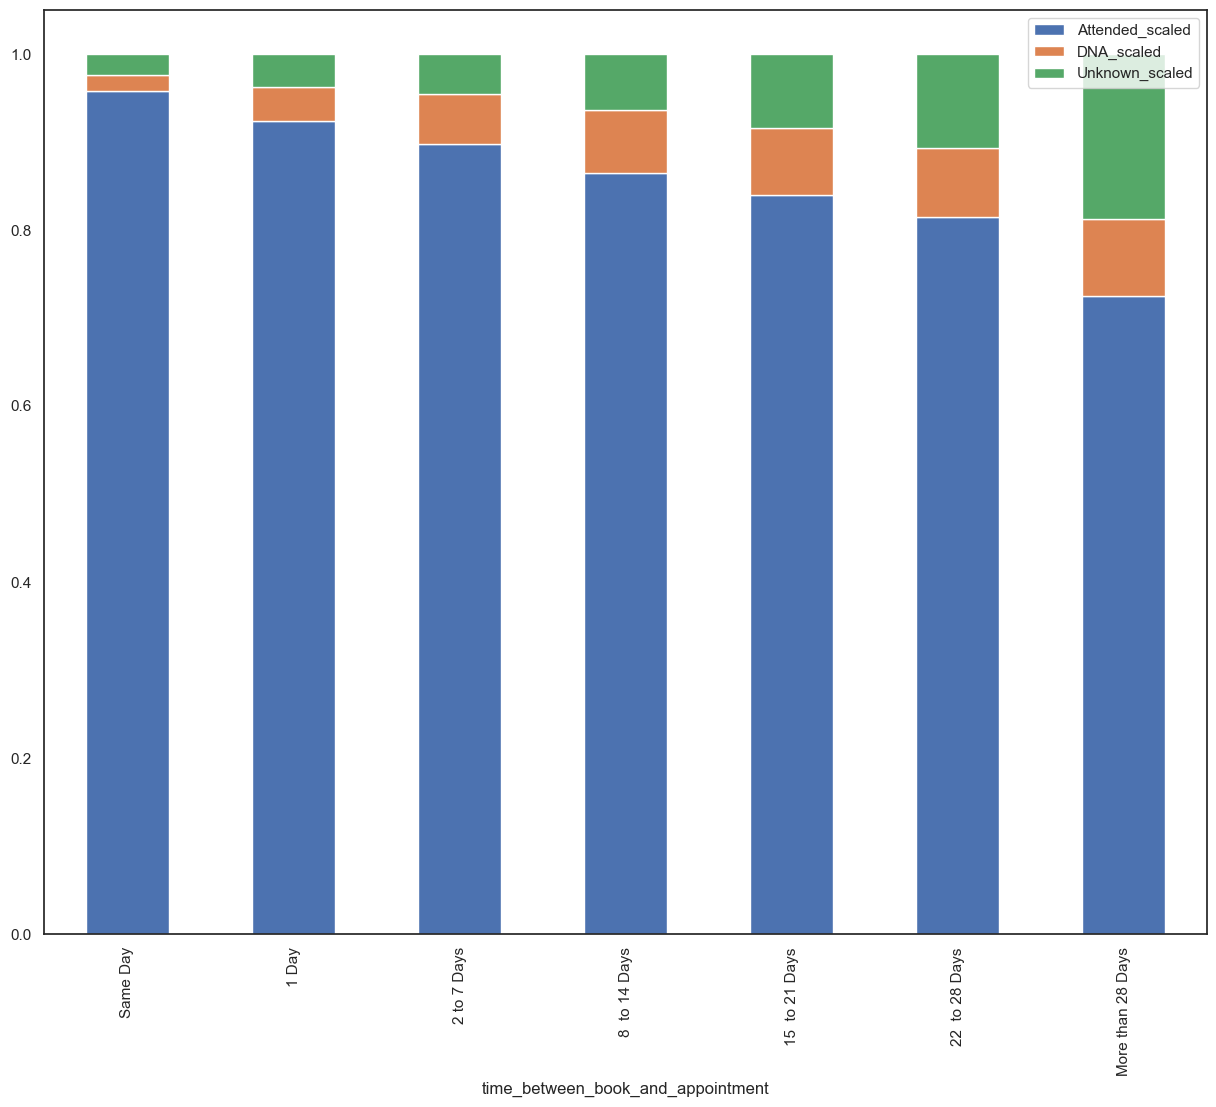

In [1464]:
# Graph the data: stacked bars.
plt.figure(figsize=(18,10))
status_waiting_ordered[statuses_scaled].plot(kind = 'bar', stacked = 'True')
plt.legend(loc='upper right')
plt.show()

We can see here that there is a strong relationship betwen attendance and the time between booking and the appointment. Perhaps people are forgetting, or they are getting better or changing their minds between booking and the date they're booked for. Obviously this is expensive for the NHS. Avoidable? Partly. 

Ring people and remind them to come, or check that they still need to. Send them a text if a phonecall isn't manageable.

The other trend we see here which is interesting is how the unknown values follow the trend the DNA values, suggeting that the reason the appointment status isn't logged, is tied to unattendance. 

Can doctors use the time they have in the quieter periods to ring patients and check in around upcoming bookings? 

It's likely that when patients don't show, it enables doctors to see more patients on the same day, and will be one driver of the NHS's excellent performance around same day booking availability. 

The message here is to use what's already available in terms of staffing, better. Maybe work with the other stakeholders in the ICPs and PCNs to share the task of reminding and checking with patients about their delayed appointments. Certainly it doesn't take a doctor's salary to man a phone, so this enhanced checking system (and I'm assuming there isn't already one in place network wide) doesn't have to be expensive. 

**Question 6:** How do the spread of service settings compare?

In [1466]:
# Show the spread across the settings in a barplot. 
# Create a list of all the service setting values
settings = nc['service_setting'].unique()
print(settings)

['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision']


In [1467]:
# Create an empty dictionary 
settings_dictionary = {}
# Complete the dictionary with values calculated in a for loop
for setting_value in settings:
    settings_sum_appointments = nc.loc[nc['service_setting']==setting_value,
                                      'count_of_appointments'].sum()
    settings_dictionary[setting_value]=settings_sum_appointments
# Output the dictionary
print(settings_dictionary)

{'Primary Care Network': 6557386, 'Other': 5420076, 'General Practice': 270811691, 'Unmapped': 11080810, 'Extended Access Provision': 2176807}


In [1468]:

# Create a new dataframe from the dictionary.
df_settings_appointments = pd.DataFrame(list(settings_dictionary.items()),
                                columns=['service_setting', 'total_appointments_in_each_setting'])

# View the dataframe
df_settings_appointments

service_setting  total_appointments_in_each_setting
0       Primary Care Network                             6557386
1                      Other                             5420076
2           General Practice                           270811691
3                   Unmapped                            11080810
4  Extended Access Provision                             2176807

<Axes: xlabel='service_setting', ylabel='total_appointments_in_each_setting'>

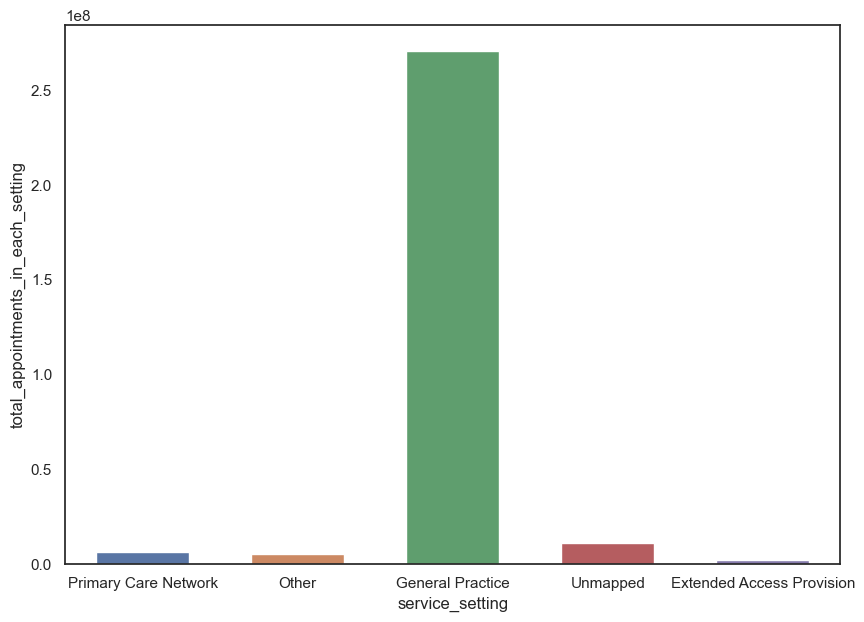

In [1469]:
# Create a barplot from the dataframe. 
plt.figure(figsize=(10,7))
sns.barplot(y='total_appointments_in_each_setting', x='service_setting', data = df_settings_appointments, width = 0.6)

This barplot is the simplest way to show the spread of service settings and that the General Practice settings for appointment far outweigh any other. At the time this data was collected the PCNs were in their earliest days. The data would look very different today. 

Considering how important the GP service settings are in delivering care, let's look again at wait times, but this time let's just look at the wait times for these important settings, and their key staff - the GPs. 

# 

### Provide a summary of your findings and recommendations based on the analysis.